In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [1]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [2]:
from PIL import Image
import numpy as np
import sys
import os
import csv

# Function to create a list of files, labels, and names
def createFileList(myDir, format='.jpg'):
    fileList = []
    labels = []
    names = []
    for root, dirs, files in os.walk(myDir, topdown=True):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
                # Infer the class based on the file name
                if name.lower().startswith('healthy'):
                    labels.append('0')
                elif name.lower().startswith('unhealthy'):
                    labels.append('1')
                else:
                    labels.append('-1')  # A placeholder value for files with unknown class
                names.append(name)
    return fileList, labels, names

# Function to reduce the dimensions of the image
def reduce_dimensions(image_path, new_width=100, new_height=100):
    img = Image.open(image_path)
    img = img.resize((new_width, new_height))
    return img

# Directory where the images are located
image_dir = '/content/drive/MyDrive/Rice Seed Dataset'

# Create a list of files, labels, and names
myFileList, labels, names = createFileList(image_dir, '.jpg')

# Loop through each file in the list
i = 0
for file in myFileList:
    print(file)

    # Reduce the dimensions of the image while keeping 3 color channels
    reduced_img = reduce_dimensions(file, new_width=100, new_height=100)

    # Continue with the rest of your code...
    width, height = reduced_img.size
    format = reduced_img.format
    mode = reduced_img.mode

    # Convert to numpy array while keeping 3 channels
    value = np.array(reduced_img).reshape((width, height, 3))

    # Flatten the array and append the label
    value = value.flatten()
    value = np.append(value, labels[i])
    i += 1

    print(value)
    with open("finalproj.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)


In [3]:
import pandas as pd
df=pd.read_csv('Finalproj.csv')

In [4]:
!pip install seaborn
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tensorflow import keras
import glob as gb
import pandas as pd
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
BATCH_SIZE = 32
IMG_SIZE = (100,100,3)
class_names= ["healthy" ,"Unhealthy"]

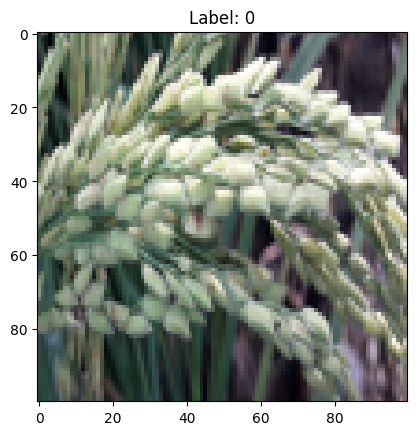

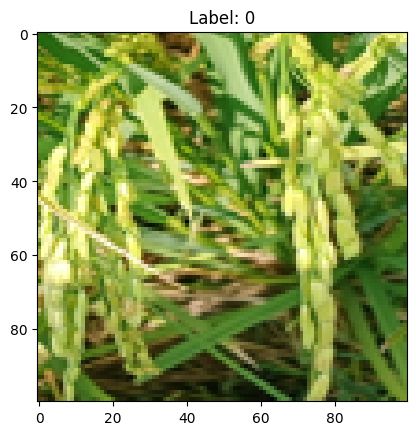

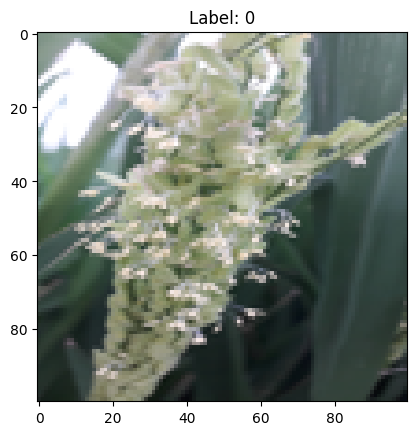

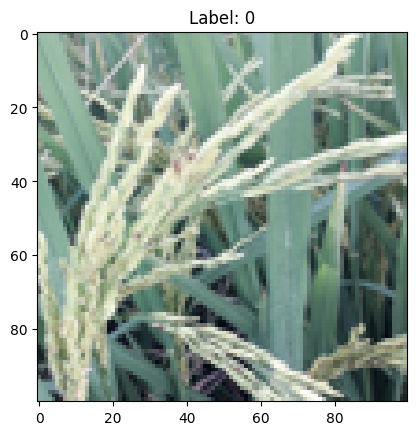

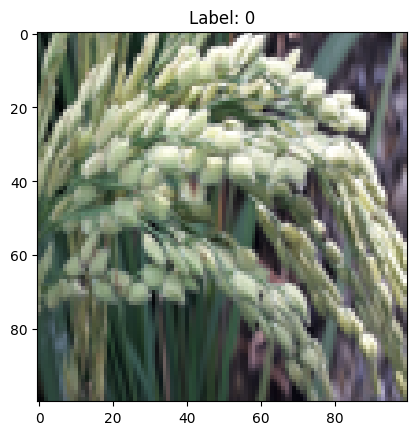

In [5]:
import numpy as np
import csv
from PIL import Image
import matplotlib.pyplot as plt

# Load data from the CSV file
csv_file = 'Finalproj.csv'
data = np.loadtxt(csv_file, delimiter=',')

# Extract image data and labels
images = data[:, :-1]
labels = data[:, -1]

# Choose how many images you want to display
num_images_to_display = 5

# Loop through and display some images
for i in range(num_images_to_display):
    # Reshape the flattened image data to its original shape
    image_shape = (100, 100 , 3)  # Change this based on your image dimensions
    img_data = images[i, :].reshape(image_shape)

    # Convert to PIL image for display
    img = Image.fromarray(img_data.astype(np.uint8))

    # Display the image with its label
    plt.imshow(img, cmap='gray')  # Assuming images are grayscale
    plt.title(f"Label: {int(labels[i])}")
    plt.show()


In [6]:

import numpy as np
import csv
from sklearn.model_selection import train_test_split

# Load data from the CSV file
csv_file = 'Finalproj.csv'
data = np.loadtxt(csv_file, delimiter=',')

# Extract features (X) and labels (y)
X = data[:, :-1]
y = data[:, -1]

image_shape = (100, 100, 3)
X = X.reshape(-1, *image_shape).astype(np.uint8)

# Reshape y to a column vector if it's a 1D array
y = y.reshape(-1, 1)

# Split the data into training and testing sets
test_size = 0.3  # You can adjust the test size as needed
random_state = 42  # Set a seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Print the shape of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
IMG_SHAPE = IMG_SIZE +(3,)


X_train shape: (679, 100, 100, 3)
y_train shape: (679, 1)
X_test shape: (291, 100, 100, 3)
y_test shape: (291, 1)


In [7]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

In [8]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
pre_trained_model = InceptionV3(input_shape = (100, 100, 3),
include_top = False,
weights = None)
for layer in pre_trained_model.layers:
  layer.trainable = False

In [9]:
import tensorflow as tf

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
# Assuming X_train and X_test are your original input images
# Resize images to the required shape (224, 224)
X_train_resized = tf.image.resize(X_train, (100, 100))
X_test_resized = tf.image.resize(X_test, (100, 100))



# Clear the TensorFlow default graph
tf.keras.backend.clear_session()

# Load InceptionV3 model
pre_trained_model = InceptionV3(input_shape=(100, 100, 3),
                                include_top=False,
                                weights=None)

# Freeze all layers in the pre-trained model
for layer in pre_trained_model.layers:
    layer.trainable = False

# Get the output of the last convolutional layer
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = GlobalAveragePooling2D()(last_output)
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = Dense(1024, activation='relu')(x)
# Add dropout layer to avoid overfitting
x = Dropout(0.2)(x)
# Output layer with sigmoid activation for binary classification
x = Dense(1, activation='sigmoid')(x)

# Combine the pre-trained model with the new layers
model = Model(pre_trained_model.input, x)

# Compile the model
model.compile(optimizer=RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Now, you can train your model using the resized images
history = model.fit(X_train_resized, y_train, verbose=2, epochs=10, validation_data=(X_test_resized, y_test))



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 49, 49, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 49, 49, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 49, 49, 32)           0         ['batch_normalization[0][0

22/22 - 18s - loss: 0.8228 - accuracy: 0.5125 - val_loss: 0.6920 - val_accuracy: 0.5636 - 18s/epoch - 797ms/step
Epoch 2/10
22/22 - 7s - loss: 0.7181 - accuracy: 0.5096 - val_loss: 0.7013 - val_accuracy: 0.5636 - 7s/epoch - 310ms/step
Epoch 3/10
22/22 - 7s - loss: 0.7168 - accuracy: 0.5052 - val_loss: 0.7467 - val_accuracy: 0.5636 - 7s/epoch - 330ms/step
Epoch 4/10
22/22 - 7s - loss: 0.7014 - accuracy: 0.5155 - val_loss: 0.6812 - val_accuracy: 0.5636 - 7s/epoch - 316ms/step
Epoch 5/10
22/22 - 7s - loss: 0.7069 - accuracy: 0.4860 - val_loss: 0.7201 - val_accuracy: 0.4364 - 7s/epoch - 322ms/step
Epoch 6/10
22/22 - 8s - loss: 0.6955 - accuracy: 0.5346 - val_loss: 0.6801 - val_accuracy: 0.5636 - 8s/epoch - 352ms/step
Epoch 7/10
22/22 - 7s - loss: 0.6905 - accuracy: 0.5361 - val_loss: 0.6801 - val_accuracy: 0.5808 - 7s/epoch - 327ms/step
Epoch 8/10
22/22 - 7s - loss: 0.6923 - accuracy: 0.5302 - val_loss: 0.7071 - val_accuracy: 0.4364 - 7s/epoch - 326ms/step
Epoch 9/10
22/22 - 7s - loss: 0.6

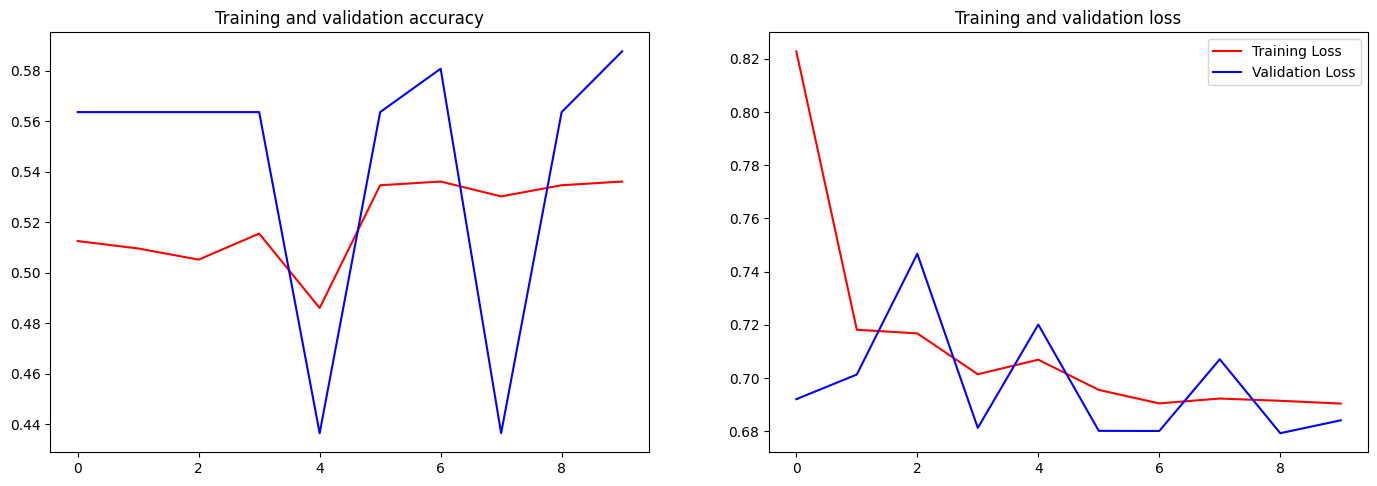

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.subplot(2,2,2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [11]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Resize the test images to match the model's input shape
X_test_resized = tf.image.resize(X_test, (100, 100))

# Perform prediction
predictions = model.predict(X_test_resized)

# Round predictions to obtain binary labels
predicted_labels = np.round(predictions)

# Calculate evaluation metrics
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, predicted_labels))


10/10 [==============================] - 6s 211ms/step
Precision: 0.6447368421052632
Recall: 0.5975609756097561
F1-score: 0.620253164556962

Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.57      0.55       127
         1.0       0.64      0.60      0.62       164

    accuracy                           0.59       291
   macro avg       0.58      0.59      0.58       291
weighted avg       0.59      0.59      0.59       291



In [12]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Input
from keras.callbacks import EarlyStopping
from keras.callbacks import EarlyStopping
from time import time
from sklearn import datasets
%matplotlib inline

In [13]:


inception=pre_trained_model
def Inception(optimizer,neurons,batch_size,epochs,activation,patience):
    model = Sequential()
    model.add(inception)
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dense(1024, activation="relu"))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid' , name="classification"))
    model.compile(optimizer=optimizer, loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor="loss", patience = patience)
    history = model.fit(X_train, y_train, epochs=epochs, callbacks = [early_stopping],batch_size=batch_size,verbose=1)
    return model

In [ ]:
model = Inception(
    optimizer='adam',neurons=64,batch_size=64,epochs=5,activation='leaky_relu',patience=10
)

Epoch 1/10
11/11 [==============================] - 4s 143ms/step - loss: 0.7142 - accuracy: 0.5081
Epoch 2/10
11/11 [==============================] - 2s 164ms/step - loss: 0.6997 - accuracy: 0.4904
Epoch 3/10
11/11 [==============================] - 2s 142ms/step - loss: 0.6942 - accuracy: 0.4993
Epoch 4/10
11/11 [==============================] - 2s 148ms/step - loss: 0.6935 - accuracy: 0.5052
Epoch 5/10
11/11 [==============================] - 2s 161ms/step - loss: 0.6933 - accuracy: 0.5052
Epoch 6/10
11/11 [==============================] - 2s 143ms/step - loss: 0.6935 - accuracy: 0.4978
Epoch 7/10
11/11 [==============================] - 2s 142ms/step - loss: 0.6917 - accuracy: 0.5169
Epoch 8/10
11/11 [==============================] - 2s 160ms/step - loss: 0.6920 - accuracy: 0.5052
Epoch 9/10
11/11 [==============================] - 2s 153ms/step - loss: 0.6911 - accuracy: 0.5199
Epoch 10/10
11/11 [==============================] - 2s 146ms/step - loss: 0.6904 - accuracy: 0.5052

In [6]:
mobinet_example_model.evaluate(X_test,y_test)

NameError: name 'mobinet_example_model' is not defined

In [15]:
!pip install xlsxwriter

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [17]:
from skopt import BayesSearchCV
from time import time
from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
import xlsxwriter
from xlsxwriter import Workbook

# Assuming you have a function CNN defined for your Keras model

# Define the parameter search space
rf_params = {
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'activation': ['relu', 'tanh','leaky_relu','sigmoid','softmax'],
    'batch_size': (16,32, 64),  # Adjust based on your preference
    'neurons': (16, 32,64,128,256,512),
    'epochs': (5,),
    'patience': (3, 20)
}

# Create a KerasClassifier instance
clf = KerasClassifier(build_fn=Inception, verbose=0)

# Create a BayesSearchCV instance
ga1 = BayesSearchCV(
    estimator=clf,
    search_spaces=rf_params,
    scoring="accuracy",
    cv=3,
    verbose=1,
    n_iter=5,  # Number of evaluations
    n_jobs=1
)

results = []

for i in range(10):  # Iterate over different runs
    start = time()
    ga1.fit(X_train, y_train)
    end = time()

    # Calculate precision, recall, and F1 score
    y_pred = ga1.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    result = {
        'Hyperparameters': ga1.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Time taken (s)': end - start,
        'Accuracy':ga1.best_score_
    }
    results.append(result)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Write results to Excel
with pd.ExcelWriter('inception_parameter_search_results2.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Results1', index=False)


/tmp/ipykernel_3486/597380791.py:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=Inception, verbose=0)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Epoch 1/5
22/22 [==============================] - 4s 70ms/step - loss: 0.6932 - accuracy: 0.5052
Epoch 2/5
22/22 [==============================] - 2s 83ms/step - loss: 0.6932 - accuracy: 0.5052
Epoch 3/5
22/22 [==============================] - 2s 83ms/step - loss: 0.6932 - accuracy: 0.5052
Epoch 4/5
22/22 [==============================] - 2s 81ms/step - loss: 0.6932 - accuracy: 0.5052
Epoch 5/5
8/8 [==============================] - 1s 70ms/step
Epoch 1/5
22/22 [==============================] - 4s 79ms/step - loss: 0.6932 - accuracy: 0.5052
Epoch 2/5
22/22 [==============================] - 2s 77ms/step - loss: 0.6931 - accuracy: 0.5052
Epoch 3/5
22/22 [==============================] - 2s 84ms/step - loss: 0.6932 - accuracy: 0.5052
Epoch 4/5
22/22 [==============================] - 2s 81ms/step - loss: 0.6931 - accuracy: 0.5052
Epoch 5/5
8/8 [==============================] - 1s 77ms/step
Epoch 1/5
22/22 [================

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/5
22/22 [==============================] - 4s 79ms/step - loss: 0.6934 - accuracy: 0.4831
Epoch 2/5
22/22 [==============================] - 2s 81ms/step - loss: 0.6932 - accuracy: 0.5052
Epoch 3/5
22/22 [==============================] - 2s 81ms/step - loss: 0.6932 - accuracy: 0.5052
Epoch 4/5
22/22 [==============================] - 2s 77ms/step - loss: 0.6932 - accuracy: 0.5052
Epoch 5/5
8/8 [==============================] - 1s 60ms/step
Epoch 1/5
22/22 [==============================] - 4s 69ms/step - loss: 0.6936 - accuracy: 0.4948
Epoch 2/5
22/22 [==============================] - 2s 77ms/step - loss: 0.6932 - accuracy: 0.4978
Epoch 3/5
22/22 [==============================] - 2s 76ms/step - loss: 0.6931 - accuracy: 0.5081
Epoch 4/5
22/22 [==============================] - 2s 76ms/step - loss: 0.6931 - accuracy: 0.4948
Epoch 5/5
8/8 [==============================] - 1s 61ms/step
Epoch 1/5
22/22 [==============================] - 4s 71ms/step - loss: 0.6936 - accuracy: 0

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/5
43/43 [==============================] - 4s 45ms/step - loss: 0.7076 - accuracy: 0.4610
Epoch 2/5
43/43 [==============================] - 2s 48ms/step - loss: 0.6986 - accuracy: 0.4919
Epoch 3/5
43/43 [==============================] - 2s 47ms/step - loss: 0.6948 - accuracy: 0.5140
Epoch 4/5
43/43 [==============================] - 2s 47ms/step - loss: 0.6955 - accuracy: 0.5155
Epoch 5/5
8/8 [==============================] - 1s 62ms/step
Epoch 1/5
43/43 [==============================] - 4s 45ms/step - loss: 0.6987 - accuracy: 0.5007
Epoch 2/5
43/43 [==============================] - 2s 47ms/step - loss: 0.6957 - accuracy: 0.5184
Epoch 3/5
43/43 [==============================] - 2s 47ms/step - loss: 0.6948 - accuracy: 0.5140
Epoch 4/5
43/43 [==============================] - 2s 47ms/step - loss: 0.6953 - accuracy: 0.5081
Epoch 5/5
8/8 [==============================] - 1s 62ms/step
Epoch 1/5
43/43 [==============================] - 4s 45ms/step - loss: 0.6986 - accuracy: 0

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/5
22/22 [==============================] - 4s 71ms/step - loss: 0.7070 - accuracy: 0.5052
Epoch 2/5
22/22 [==============================] - 2s 77ms/step - loss: 0.6967 - accuracy: 0.5037
Epoch 3/5
22/22 [==============================] - 2s 77ms/step - loss: 0.6959 - accuracy: 0.4948
Epoch 4/5
22/22 [==============================] - 2s 77ms/step - loss: 0.6947 - accuracy: 0.4963
Epoch 5/5
8/8 [==============================] - 1s 62ms/step
Epoch 1/5
22/22 [==============================] - 4s 70ms/step - loss: 0.7343 - accuracy: 0.5052
Epoch 2/5
22/22 [==============================] - 2s 77ms/step - loss: 0.6974 - accuracy: 0.4462
Epoch 3/5
22/22 [==============================] - 2s 77ms/step - loss: 0.6942 - accuracy: 0.4934
Epoch 4/5
22/22 [==============================] - 2s 77ms/step - loss: 0.6942 - accuracy: 0.4919
Epoch 5/5
8/8 [==============================] - 1s 61ms/step
Epoch 1/5
22/22 [==============================] - 4s 72ms/step - loss: 0.7225 - accuracy: 0

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/5
22/22 [==============================] - 4s 80ms/step - loss: 0.7136 - accuracy: 0.5022
Epoch 2/5
22/22 [==============================] - 2s 81ms/step - loss: 0.6957 - accuracy: 0.4978
Epoch 3/5
22/22 [==============================] - 2s 83ms/step - loss: 0.6983 - accuracy: 0.4698
Epoch 4/5
22/22 [==============================] - 2s 80ms/step - loss: 0.6954 - accuracy: 0.4757
Epoch 5/5
8/8 [==============================] - 1s 69ms/step
Epoch 1/5
22/22 [==============================] - 4s 76ms/step - loss: 0.7141 - accuracy: 0.4639
Epoch 2/5
22/22 [==============================] - 2s 80ms/step - loss: 0.6954 - accuracy: 0.4978
Epoch 3/5
22/22 [==============================] - 2s 81ms/step - loss: 0.6943 - accuracy: 0.4948
Epoch 4/5
22/22 [==============================] - 2s 80ms/step - loss: 0.6934 - accuracy: 0.5052
Epoch 5/5
8/8 [==============================] - 1s 66ms/step
Epoch 1/5
22/22 [==============================] - 4s 78ms/step - loss: 0.6972 - accuracy: 0

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/5
11/11 [==============================] - 3s 127ms/step - loss: 0.7063 - accuracy: 0.4993
Epoch 2/5
11/11 [==============================] - 2s 139ms/step - loss: 0.6952 - accuracy: 0.4610
Epoch 3/5
11/11 [==============================] - 2s 138ms/step - loss: 0.6939 - accuracy: 0.5169
Epoch 4/5
11/11 [==============================] - 2s 139ms/step - loss: 0.6940 - accuracy: 0.5052
Epoch 5/5
8/8 [==============================] - 1s 61ms/step
Epoch 1/5
11/11 [==============================] - 4s 127ms/step - loss: 0.7102 - accuracy: 0.4978
Epoch 2/5
11/11 [==============================] - 2s 138ms/step - loss: 0.6959 - accuracy: 0.4772
Epoch 3/5
11/11 [==============================] - 2s 140ms/step - loss: 0.6924 - accuracy: 0.5214
Epoch 4/5
11/11 [==============================] - 2s 139ms/step - loss: 0.7054 - accuracy: 0.4801
Epoch 5/5
8/8 [==============================] - 1s 61ms/step
Epoch 1/5
11/11 [==============================] - 3s 126ms/step - loss: 0.7112 - ac

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
import math
print(ga1.best_params_)
print("Accuracy:"+ str(ga1.best_score_))
total = end-start
seconds = int(total % 60)
minutes = int((total//60)%60)
hours = int((total//60)//60)
print('{0}h:{1}m:{2}s'.format(hours, minutes, seconds))

OrderedDict([('activation', 'softmax'), ('batch_size', 16), ('epochs', 5), ('neurons', 128), ('optimizer', 'rmsprop'), ('patience', 21)])
Accuracy:0.5258209556482528
0h:6m:5s


In [38]:
test_model = Inception(
    optimizer='rmsprop',
    activation='relu',
    batch_size=32,
    neurons=128,
    epochs=5,
    patience=8
)

Epoch 1/5
22/22 [==============================] - 4s 68ms/step - loss: 0.7068 - accuracy: 0.5110
Epoch 2/5
22/22 [==============================] - 2s 73ms/step - loss: 0.6970 - accuracy: 0.4669
Epoch 3/5
22/22 [==============================] - 2s 80ms/step - loss: 0.6952 - accuracy: 0.5052
Epoch 4/5
22/22 [==============================] - 2s 80ms/step - loss: 0.6974 - accuracy: 0.4934
Epoch 5/5
22/22 [==============================] - 2s 79ms/step - loss: 0.6932 - accuracy: 0.5052


In [37]:
test_model.evaluate(X_test, y_test)

10/10 [==============================] - 1s 59ms/step - loss: 0.7046 - accuracy: 0.4364


[0.7046393156051636, 0.4364261031150818]

In [ ]:
test_model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 global_average_pooling2d_37  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_36 (Flatten)        (None, 2048)              0         
                                                                 
 dense_74 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_75 (Dense)            (None, 64)                65600     
                                                                 
 classification (Dense)      (None, 1)                 65        
                                                     

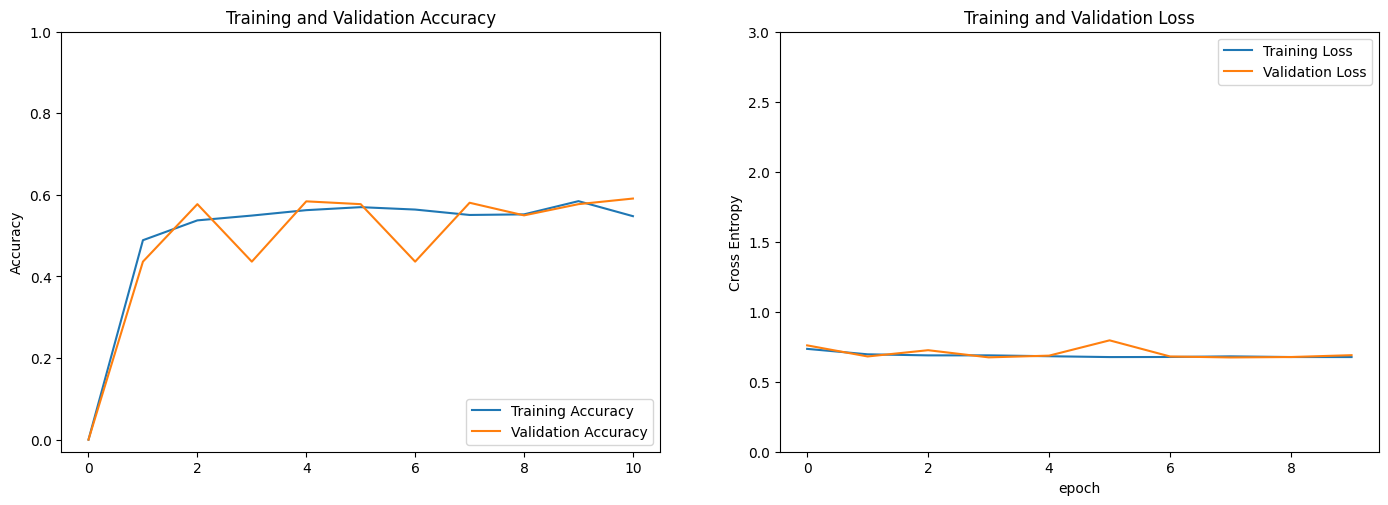

In [ ]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

true_labels = y_test
predictions = test_model.predict(X_test)
predicted_labels = np.round(predictions)

precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

10/10 [==============================] - 1s 59ms/step
Precision: 0.696551724137931
Recall: 0.6158536585365854
F1-score: 0.6537216828478964

Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.65      0.61       127
         1.0       0.70      0.62      0.65       164

    accuracy                           0.63       291
   macro avg       0.63      0.63      0.63       291
weighted avg       0.64      0.63      0.63       291



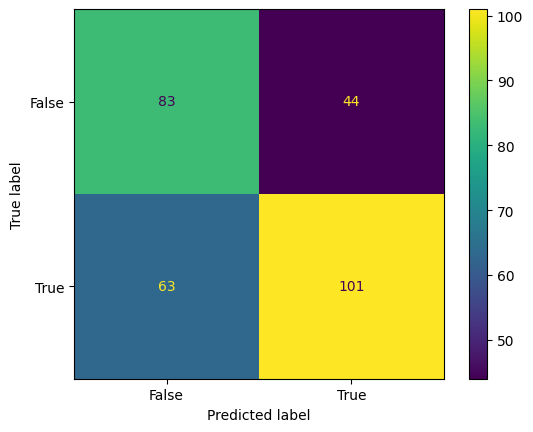

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(true_labels, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [14]:
!pip install lime

Healthy


1/1 [==============================] - 2s 2s/step
Accuracy of this prediction is 0.46275496


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 129ms/step


  1%|          | 10/1000 [00:00<00:23, 42.25it/s]

1/1 [==============================] - 0s 112ms/step


  2%|▏         | 20/1000 [00:00<00:19, 49.05it/s]

1/1 [==============================] - 0s 133ms/step


  3%|▎         | 30/1000 [00:00<00:19, 49.60it/s]

1/1 [==============================] - 0s 116ms/step


  4%|▍         | 40/1000 [00:00<00:20, 47.41it/s]

1/1 [==============================] - 0s 116ms/step


  5%|▌         | 50/1000 [00:01<00:19, 48.19it/s]

1/1 [==============================] - 0s 104ms/step


  6%|▌         | 60/1000 [00:01<00:21, 43.73it/s]

1/1 [==============================] - 0s 94ms/step


  7%|▋         | 70/1000 [00:01<00:19, 48.33it/s]

1/1 [==============================] - 0s 105ms/step


  8%|▊         | 80/1000 [00:01<00:17, 53.06it/s]

1/1 [==============================] - 0s 107ms/step


  9%|▉         | 90/1000 [00:01<00:16, 55.05it/s]

1/1 [==============================] - 0s 102ms/step


 10%|█         | 100/1000 [00:01<00:16, 55.43it/s]

1/1 [==============================] - 0s 134ms/step


 11%|█         | 110/1000 [00:02<00:17, 49.59it/s]

1/1 [==============================] - 0s 150ms/step


 12%|█▏        | 120/1000 [00:02<00:18, 48.43it/s]

1/1 [==============================] - 0s 167ms/step


 13%|█▎        | 130/1000 [00:02<00:19, 44.46it/s]

1/1 [==============================] - 0s 141ms/step


 14%|█▍        | 140/1000 [00:02<00:20, 41.12it/s]

1/1 [==============================] - 0s 128ms/step


 15%|█▌        | 150/1000 [00:03<00:20, 41.70it/s]

1/1 [==============================] - 0s 99ms/step


 16%|█▌        | 160/1000 [00:03<00:19, 44.08it/s]

1/1 [==============================] - 0s 106ms/step


 17%|█▋        | 170/1000 [00:03<00:17, 46.35it/s]

1/1 [==============================] - 0s 105ms/step


 18%|█▊        | 180/1000 [00:03<00:17, 47.54it/s]

1/1 [==============================] - 0s 103ms/step


 19%|█▉        | 190/1000 [00:03<00:16, 49.45it/s]

1/1 [==============================] - 0s 144ms/step


 20%|██        | 200/1000 [00:04<00:16, 47.83it/s]

1/1 [==============================] - 0s 90ms/step


 21%|██        | 210/1000 [00:04<00:16, 46.83it/s]

1/1 [==============================] - 0s 98ms/step


 22%|██▏       | 220/1000 [00:04<00:15, 50.64it/s]

1/1 [==============================] - 0s 87ms/step


 23%|██▎       | 230/1000 [00:04<00:14, 52.43it/s]

1/1 [==============================] - 0s 88ms/step


 24%|██▍       | 240/1000 [00:04<00:14, 51.84it/s]

1/1 [==============================] - 0s 117ms/step


 25%|██▌       | 250/1000 [00:05<00:14, 51.21it/s]

1/1 [==============================] - 0s 117ms/step


 26%|██▌       | 260/1000 [00:05<00:15, 48.58it/s]

1/1 [==============================] - 0s 128ms/step


 27%|██▋       | 270/1000 [00:05<00:15, 47.18it/s]

1/1 [==============================] - 0s 106ms/step


 28%|██▊       | 280/1000 [00:05<00:14, 49.41it/s]

1/1 [==============================] - 0s 107ms/step


 29%|██▉       | 290/1000 [00:06<00:14, 49.66it/s]

1/1 [==============================] - 0s 86ms/step


 30%|███       | 300/1000 [00:06<00:13, 52.45it/s]

1/1 [==============================] - 0s 104ms/step


 31%|███       | 310/1000 [00:06<00:13, 50.19it/s]

1/1 [==============================] - 0s 99ms/step


 32%|███▏      | 320/1000 [00:06<00:12, 53.34it/s]

1/1 [==============================] - 0s 100ms/step


 33%|███▎      | 330/1000 [00:06<00:12, 54.98it/s]

1/1 [==============================] - 0s 99ms/step


 34%|███▍      | 340/1000 [00:06<00:11, 55.96it/s]

1/1 [==============================] - 0s 90ms/step


 35%|███▌      | 350/1000 [00:07<00:11, 58.55it/s]

1/1 [==============================] - 0s 91ms/step


 36%|███▌      | 360/1000 [00:07<00:10, 61.95it/s]

1/1 [==============================] - 0s 137ms/step


 37%|███▋      | 370/1000 [00:07<00:11, 55.94it/s]

1/1 [==============================] - 0s 105ms/step


 38%|███▊      | 380/1000 [00:07<00:11, 52.49it/s]

1/1 [==============================] - 0s 129ms/step


 39%|███▉      | 390/1000 [00:07<00:11, 51.59it/s]

1/1 [==============================] - 0s 157ms/step


 40%|████      | 400/1000 [00:08<00:12, 47.44it/s]

1/1 [==============================] - 0s 107ms/step


 41%|████      | 410/1000 [00:08<00:12, 48.49it/s]

1/1 [==============================] - 0s 105ms/step


 42%|████▏     | 420/1000 [00:08<00:12, 46.47it/s]

1/1 [==============================] - 0s 135ms/step


 43%|████▎     | 430/1000 [00:08<00:12, 47.47it/s]

1/1 [==============================] - 0s 108ms/step


 44%|████▍     | 440/1000 [00:08<00:11, 46.93it/s]

1/1 [==============================] - 0s 136ms/step


 45%|████▌     | 450/1000 [00:09<00:11, 46.95it/s]

1/1 [==============================] - 0s 147ms/step


 46%|████▌     | 460/1000 [00:09<00:12, 43.49it/s]

1/1 [==============================] - 0s 116ms/step


 47%|████▋     | 470/1000 [00:09<00:11, 44.60it/s]

1/1 [==============================] - 0s 88ms/step


 48%|████▊     | 480/1000 [00:09<00:10, 47.79it/s]

1/1 [==============================] - 0s 100ms/step


 49%|████▉     | 490/1000 [00:09<00:10, 49.65it/s]

1/1 [==============================] - 0s 116ms/step


 50%|█████     | 500/1000 [00:10<00:10, 49.75it/s]

1/1 [==============================] - 0s 106ms/step


 51%|█████     | 510/1000 [00:10<00:10, 48.64it/s]

1/1 [==============================] - 0s 109ms/step


 52%|█████▏    | 520/1000 [00:10<00:09, 48.96it/s]

1/1 [==============================] - 0s 103ms/step


 53%|█████▎    | 530/1000 [00:10<00:09, 50.31it/s]

1/1 [==============================] - 0s 99ms/step


 54%|█████▍    | 540/1000 [00:10<00:08, 51.65it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████▌    | 550/1000 [00:11<00:08, 51.11it/s]

1/1 [==============================] - 0s 108ms/step


 56%|█████▌    | 560/1000 [00:11<00:08, 50.72it/s]

1/1 [==============================] - 0s 100ms/step


 57%|█████▋    | 570/1000 [00:11<00:08, 50.51it/s]

1/1 [==============================] - 0s 100ms/step


 58%|█████▊    | 580/1000 [00:11<00:08, 50.30it/s]

1/1 [==============================] - 0s 109ms/step


 59%|█████▉    | 590/1000 [00:11<00:08, 48.37it/s]

1/1 [==============================] - 0s 117ms/step


 60%|██████    | 600/1000 [00:12<00:08, 46.24it/s]

1/1 [==============================] - 0s 100ms/step


 61%|██████    | 610/1000 [00:12<00:08, 46.73it/s]

1/1 [==============================] - 0s 85ms/step


 62%|██████▏   | 620/1000 [00:12<00:07, 50.05it/s]

1/1 [==============================] - 0s 133ms/step


 63%|██████▎   | 630/1000 [00:12<00:07, 48.85it/s]

1/1 [==============================] - 0s 100ms/step


 64%|██████▍   | 640/1000 [00:12<00:07, 50.41it/s]

1/1 [==============================] - 0s 116ms/step


 65%|██████▌   | 650/1000 [00:13<00:06, 50.27it/s]

1/1 [==============================] - 0s 142ms/step


 66%|██████▌   | 660/1000 [00:13<00:07, 45.62it/s]

1/1 [==============================] - 0s 115ms/step


 67%|██████▋   | 670/1000 [00:13<00:07, 43.80it/s]

1/1 [==============================] - 0s 100ms/step


 68%|██████▊   | 680/1000 [00:13<00:06, 46.53it/s]

1/1 [==============================] - 0s 116ms/step


 69%|██████▉   | 690/1000 [00:14<00:06, 45.94it/s]

1/1 [==============================] - 0s 101ms/step


 70%|███████   | 700/1000 [00:14<00:06, 49.23it/s]

1/1 [==============================] - 0s 133ms/step


 71%|███████   | 710/1000 [00:14<00:06, 47.84it/s]

1/1 [==============================] - 0s 108ms/step


 72%|███████▏  | 720/1000 [00:14<00:05, 47.28it/s]

1/1 [==============================] - 0s 109ms/step


 73%|███████▎  | 730/1000 [00:14<00:05, 48.06it/s]

1/1 [==============================] - 0s 100ms/step


 74%|███████▍  | 740/1000 [00:15<00:05, 47.52it/s]

1/1 [==============================] - 0s 142ms/step


 75%|███████▌  | 750/1000 [00:15<00:05, 48.51it/s]

1/1 [==============================] - 0s 84ms/step


 76%|███████▌  | 760/1000 [00:15<00:04, 53.85it/s]

1/1 [==============================] - 0s 84ms/step


 77%|███████▋  | 770/1000 [00:15<00:04, 52.65it/s]

1/1 [==============================] - 0s 99ms/step


 78%|███████▊  | 780/1000 [00:15<00:04, 51.84it/s]

1/1 [==============================] - 0s 218ms/step


 79%|███████▉  | 790/1000 [00:16<00:05, 41.38it/s]

1/1 [==============================] - 0s 101ms/step


 80%|████████  | 800/1000 [00:16<00:04, 46.00it/s]

1/1 [==============================] - 0s 84ms/step


 81%|████████  | 810/1000 [00:16<00:03, 50.72it/s]

1/1 [==============================] - 0s 100ms/step


 82%|████████▏ | 820/1000 [00:16<00:03, 50.40it/s]

1/1 [==============================] - 0s 123ms/step


 83%|████████▎ | 830/1000 [00:16<00:03, 47.49it/s]

1/1 [==============================] - 0s 110ms/step


 84%|████████▍ | 840/1000 [00:17<00:03, 49.93it/s]

1/1 [==============================] - 0s 127ms/step


 85%|████████▌ | 850/1000 [00:17<00:03, 49.91it/s]

1/1 [==============================] - 0s 96ms/step


 86%|████████▌ | 860/1000 [00:17<00:02, 52.63it/s]

1/1 [==============================] - 0s 122ms/step


 87%|████████▋ | 870/1000 [00:17<00:02, 51.12it/s]

1/1 [==============================] - 0s 101ms/step


 88%|████████▊ | 880/1000 [00:17<00:02, 51.38it/s]

1/1 [==============================] - 0s 131ms/step


 89%|████████▉ | 890/1000 [00:18<00:02, 47.75it/s]

1/1 [==============================] - 0s 132ms/step


 90%|█████████ | 900/1000 [00:18<00:02, 49.23it/s]

1/1 [==============================] - 0s 108ms/step


 91%|█████████ | 910/1000 [00:18<00:01, 50.99it/s]

1/1 [==============================] - 0s 129ms/step


 92%|█████████▏| 920/1000 [00:18<00:01, 49.94it/s]

1/1 [==============================] - 0s 132ms/step


 93%|█████████▎| 930/1000 [00:18<00:01, 47.62it/s]

1/1 [==============================] - 0s 118ms/step


 94%|█████████▍| 940/1000 [00:19<00:01, 47.03it/s]

1/1 [==============================] - 0s 154ms/step


 95%|█████████▌| 950/1000 [00:19<00:01, 45.29it/s]

1/1 [==============================] - 0s 157ms/step


 96%|█████████▌| 960/1000 [00:19<00:00, 42.37it/s]

1/1 [==============================] - 0s 117ms/step


 97%|█████████▋| 970/1000 [00:19<00:00, 44.56it/s]

1/1 [==============================] - 0s 169ms/step


 98%|█████████▊| 980/1000 [00:20<00:00, 42.96it/s]

1/1 [==============================] - 0s 160ms/step


 99%|█████████▉| 990/1000 [00:20<00:00, 39.81it/s]

1/1 [==============================] - 0s 167ms/step


100%|██████████| 1000/1000 [00:20<00:00, 48.17it/s]


(-0.5, 99.5, 99.5, -0.5)

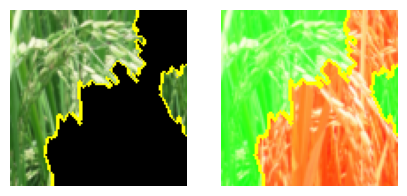

In [31]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (201).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 68ms/step
Accuracy of this prediction is 0.46276858


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 125ms/step


  1%|          | 10/1000 [00:00<00:18, 54.66it/s]

1/1 [==============================] - 0s 142ms/step


  2%|▏         | 20/1000 [00:00<00:20, 47.15it/s]

1/1 [==============================] - 0s 173ms/step


  3%|▎         | 30/1000 [00:00<00:22, 42.60it/s]

1/1 [==============================] - 0s 115ms/step


  4%|▍         | 40/1000 [00:00<00:20, 45.87it/s]

1/1 [==============================] - 0s 155ms/step


  5%|▌         | 50/1000 [00:01<00:23, 40.99it/s]

1/1 [==============================] - 0s 164ms/step


  6%|▌         | 60/1000 [00:01<00:23, 39.47it/s]

1/1 [==============================] - 0s 115ms/step


  7%|▋         | 70/1000 [00:01<00:22, 40.70it/s]

1/1 [==============================] - 0s 201ms/step


  8%|▊         | 80/1000 [00:01<00:24, 37.49it/s]

1/1 [==============================] - 0s 122ms/step


  9%|▉         | 90/1000 [00:02<00:23, 38.99it/s]

1/1 [==============================] - 0s 255ms/step


 10%|█         | 100/1000 [00:02<00:26, 34.55it/s]

1/1 [==============================] - 0s 175ms/step


 11%|█         | 110/1000 [00:02<00:25, 34.88it/s]

1/1 [==============================] - 0s 157ms/step


 12%|█▏        | 120/1000 [00:03<00:23, 37.44it/s]

1/1 [==============================] - 0s 136ms/step


 13%|█▎        | 130/1000 [00:03<00:21, 39.96it/s]

1/1 [==============================] - 0s 124ms/step


 14%|█▍        | 140/1000 [00:03<00:20, 41.47it/s]

1/1 [==============================] - 0s 139ms/step


 15%|█▌        | 150/1000 [00:03<00:20, 40.49it/s]

1/1 [==============================] - 0s 100ms/step


 16%|█▌        | 160/1000 [00:03<00:20, 41.98it/s]

1/1 [==============================] - 0s 162ms/step


 17%|█▋        | 170/1000 [00:04<00:20, 39.77it/s]

1/1 [==============================] - 0s 143ms/step


 18%|█▊        | 180/1000 [00:04<00:21, 38.79it/s]

1/1 [==============================] - 0s 156ms/step


 19%|█▉        | 190/1000 [00:04<00:21, 37.04it/s]

1/1 [==============================] - 0s 160ms/step


 20%|██        | 200/1000 [00:05<00:21, 36.61it/s]

1/1 [==============================] - 0s 100ms/step


 21%|██        | 210/1000 [00:05<00:18, 41.72it/s]

1/1 [==============================] - 0s 138ms/step


 22%|██▏       | 220/1000 [00:05<00:18, 42.51it/s]

1/1 [==============================] - 0s 175ms/step


 23%|██▎       | 230/1000 [00:05<00:19, 40.04it/s]

1/1 [==============================] - 0s 185ms/step


 24%|██▍       | 240/1000 [00:06<00:20, 37.26it/s]

1/1 [==============================] - 0s 162ms/step


 25%|██▌       | 250/1000 [00:06<00:19, 38.44it/s]

1/1 [==============================] - 0s 152ms/step


 26%|██▌       | 260/1000 [00:06<00:19, 37.85it/s]

1/1 [==============================] - 0s 151ms/step


 27%|██▋       | 270/1000 [00:06<00:19, 37.11it/s]

1/1 [==============================] - 0s 170ms/step


 28%|██▊       | 280/1000 [00:07<00:19, 36.41it/s]

1/1 [==============================] - 0s 98ms/step


 29%|██▉       | 290/1000 [00:07<00:17, 41.32it/s]

1/1 [==============================] - 0s 146ms/step


 30%|███       | 300/1000 [00:07<00:17, 41.10it/s]

1/1 [==============================] - 0s 223ms/step


 31%|███       | 310/1000 [00:07<00:19, 35.75it/s]

1/1 [==============================] - 0s 223ms/step


 32%|███▏      | 320/1000 [00:08<00:21, 32.00it/s]

1/1 [==============================] - 0s 216ms/step


 33%|███▎      | 330/1000 [00:08<00:22, 29.94it/s]

1/1 [==============================] - 0s 218ms/step


 34%|███▍      | 340/1000 [00:09<00:23, 28.25it/s]

1/1 [==============================] - 0s 217ms/step


 35%|███▌      | 350/1000 [00:09<00:23, 27.21it/s]

1/1 [==============================] - 0s 213ms/step


 36%|███▌      | 360/1000 [00:09<00:24, 26.48it/s]

1/1 [==============================] - 0s 217ms/step


 37%|███▋      | 370/1000 [00:10<00:24, 26.04it/s]

1/1 [==============================] - 0s 217ms/step


 38%|███▊      | 380/1000 [00:10<00:23, 26.06it/s]

1/1 [==============================] - 0s 216ms/step


 39%|███▉      | 390/1000 [00:11<00:23, 25.72it/s]

1/1 [==============================] - 0s 204ms/step


 40%|████      | 400/1000 [00:11<00:23, 25.83it/s]

1/1 [==============================] - 0s 247ms/step


 41%|████      | 410/1000 [00:11<00:24, 24.32it/s]

1/1 [==============================] - 0s 215ms/step


 42%|████▏     | 420/1000 [00:12<00:24, 23.95it/s]

1/1 [==============================] - 0s 212ms/step


 43%|████▎     | 430/1000 [00:12<00:23, 24.53it/s]

1/1 [==============================] - 0s 220ms/step


 44%|████▍     | 440/1000 [00:13<00:22, 24.66it/s]

1/1 [==============================] - 0s 213ms/step


 45%|████▌     | 450/1000 [00:13<00:22, 24.49it/s]

1/1 [==============================] - 0s 225ms/step


 46%|████▌     | 460/1000 [00:13<00:21, 24.96it/s]

1/1 [==============================] - 0s 211ms/step


 47%|████▋     | 470/1000 [00:14<00:21, 24.68it/s]

1/1 [==============================] - 0s 229ms/step


 48%|████▊     | 480/1000 [00:14<00:20, 24.79it/s]

1/1 [==============================] - 0s 227ms/step


 49%|████▉     | 490/1000 [00:15<00:20, 24.81it/s]

1/1 [==============================] - 0s 228ms/step


 50%|█████     | 500/1000 [00:15<00:19, 25.36it/s]

1/1 [==============================] - 0s 214ms/step


 51%|█████     | 510/1000 [00:15<00:19, 25.08it/s]

1/1 [==============================] - 0s 216ms/step


 52%|█████▏    | 520/1000 [00:16<00:18, 25.37it/s]

1/1 [==============================] - 0s 222ms/step


 53%|█████▎    | 530/1000 [00:16<00:18, 25.27it/s]

1/1 [==============================] - 0s 216ms/step


 54%|█████▍    | 540/1000 [00:17<00:18, 25.19it/s]

1/1 [==============================] - 0s 216ms/step


 55%|█████▌    | 550/1000 [00:17<00:17, 25.47it/s]

1/1 [==============================] - 0s 237ms/step


 56%|█████▌    | 560/1000 [00:17<00:17, 25.33it/s]

1/1 [==============================] - 0s 210ms/step


 57%|█████▋    | 570/1000 [00:18<00:17, 24.89it/s]

1/1 [==============================] - 0s 224ms/step


 58%|█████▊    | 580/1000 [00:18<00:16, 24.93it/s]

1/1 [==============================] - 0s 217ms/step


 59%|█████▉    | 590/1000 [00:19<00:16, 25.13it/s]

1/1 [==============================] - 0s 217ms/step


 60%|██████    | 600/1000 [00:19<00:15, 25.47it/s]

1/1 [==============================] - 0s 200ms/step


 61%|██████    | 610/1000 [00:19<00:15, 25.72it/s]

1/1 [==============================] - 0s 219ms/step


 62%|██████▏   | 620/1000 [00:20<00:14, 25.51it/s]

1/1 [==============================] - 0s 208ms/step


 63%|██████▎   | 630/1000 [00:20<00:14, 24.92it/s]

1/1 [==============================] - 0s 232ms/step


 64%|██████▍   | 640/1000 [00:21<00:14, 24.75it/s]

1/1 [==============================] - 0s 224ms/step


 65%|██████▌   | 650/1000 [00:21<00:14, 24.70it/s]

1/1 [==============================] - 0s 215ms/step


 66%|██████▌   | 660/1000 [00:21<00:13, 24.94it/s]

1/1 [==============================] - 0s 217ms/step


 67%|██████▋   | 670/1000 [00:22<00:13, 25.26it/s]

1/1 [==============================] - 0s 234ms/step


 68%|██████▊   | 680/1000 [00:22<00:12, 25.18it/s]

1/1 [==============================] - 0s 236ms/step


 69%|██████▉   | 690/1000 [00:23<00:12, 24.06it/s]

1/1 [==============================] - 0s 244ms/step


 70%|███████   | 700/1000 [00:23<00:13, 23.00it/s]

1/1 [==============================] - 0s 219ms/step


 71%|███████   | 710/1000 [00:24<00:12, 23.38it/s]

1/1 [==============================] - 0s 218ms/step


 72%|███████▏  | 720/1000 [00:24<00:11, 23.84it/s]

1/1 [==============================] - 0s 237ms/step


 73%|███████▎  | 730/1000 [00:24<00:11, 24.18it/s]

1/1 [==============================] - 0s 218ms/step


 74%|███████▍  | 740/1000 [00:25<00:10, 24.42it/s]

1/1 [==============================] - 0s 230ms/step


 75%|███████▌  | 750/1000 [00:25<00:10, 24.50it/s]

1/1 [==============================] - 0s 216ms/step


 76%|███████▌  | 760/1000 [00:26<00:09, 24.40it/s]

1/1 [==============================] - 0s 219ms/step


 77%|███████▋  | 770/1000 [00:26<00:09, 24.32it/s]

1/1 [==============================] - 0s 232ms/step


 78%|███████▊  | 780/1000 [00:26<00:08, 24.76it/s]

1/1 [==============================] - 0s 217ms/step


 79%|███████▉  | 790/1000 [00:27<00:08, 24.83it/s]

1/1 [==============================] - 0s 215ms/step


 80%|████████  | 800/1000 [00:27<00:08, 24.94it/s]

1/1 [==============================] - 0s 218ms/step


 81%|████████  | 810/1000 [00:28<00:07, 24.98it/s]

1/1 [==============================] - 0s 217ms/step


 82%|████████▏ | 820/1000 [00:28<00:07, 24.88it/s]

1/1 [==============================] - 0s 217ms/step


 83%|████████▎ | 830/1000 [00:28<00:06, 25.33it/s]

1/1 [==============================] - 0s 233ms/step


 84%|████████▍ | 840/1000 [00:29<00:06, 25.23it/s]

1/1 [==============================] - 0s 233ms/step


 85%|████████▌ | 850/1000 [00:29<00:05, 25.16it/s]

1/1 [==============================] - 0s 233ms/step


 86%|████████▌ | 860/1000 [00:30<00:05, 25.13it/s]

1/1 [==============================] - 0s 217ms/step


 87%|████████▋ | 870/1000 [00:30<00:05, 25.07it/s]

1/1 [==============================] - 0s 219ms/step


 88%|████████▊ | 880/1000 [00:30<00:04, 25.34it/s]

1/1 [==============================] - 0s 216ms/step


 89%|████████▉ | 890/1000 [00:31<00:04, 25.27it/s]

1/1 [==============================] - 0s 434ms/step


 90%|█████████ | 900/1000 [00:32<00:05, 19.73it/s]

1/1 [==============================] - 0s 231ms/step


 91%|█████████ | 910/1000 [00:32<00:04, 20.62it/s]

1/1 [==============================] - 0s 233ms/step


 92%|█████████▏| 920/1000 [00:32<00:03, 21.54it/s]

1/1 [==============================] - 0s 219ms/step


 93%|█████████▎| 930/1000 [00:33<00:03, 22.51it/s]

1/1 [==============================] - 0s 216ms/step


 94%|█████████▍| 940/1000 [00:33<00:02, 22.85it/s]

1/1 [==============================] - 0s 232ms/step


 95%|█████████▌| 950/1000 [00:34<00:02, 23.77it/s]

1/1 [==============================] - 0s 217ms/step


 96%|█████████▌| 960/1000 [00:34<00:01, 24.13it/s]

1/1 [==============================] - 0s 222ms/step


 97%|█████████▋| 970/1000 [00:34<00:01, 24.39it/s]

1/1 [==============================] - 0s 218ms/step


 98%|█████████▊| 980/1000 [00:35<00:00, 24.57it/s]

1/1 [==============================] - 0s 219ms/step


 99%|█████████▉| 990/1000 [00:35<00:00, 24.69it/s]

1/1 [==============================] - 0s 219ms/step


100%|██████████| 1000/1000 [00:36<00:00, 27.72it/s]


(-0.5, 99.5, 99.5, -0.5)

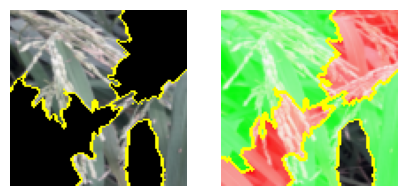

In [32]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (225).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 154ms/step
Accuracy of this prediction is 0.4627546


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 238ms/step


  1%|          | 10/1000 [00:00<00:37, 26.57it/s]

1/1 [==============================] - 0s 213ms/step


  2%|▏         | 20/1000 [00:00<00:37, 25.86it/s]

1/1 [==============================] - 0s 220ms/step


  3%|▎         | 30/1000 [00:01<00:37, 25.98it/s]

1/1 [==============================] - 0s 219ms/step


  4%|▍         | 40/1000 [00:01<00:37, 25.56it/s]

1/1 [==============================] - 0s 214ms/step


  5%|▌         | 50/1000 [00:01<00:37, 25.43it/s]

1/1 [==============================] - 0s 218ms/step


  6%|▌         | 60/1000 [00:02<00:37, 25.26it/s]

1/1 [==============================] - 0s 228ms/step


  7%|▋         | 70/1000 [00:02<00:37, 24.70it/s]

1/1 [==============================] - 0s 213ms/step


  8%|▊         | 80/1000 [00:03<00:37, 24.65it/s]

1/1 [==============================] - 0s 222ms/step


  9%|▉         | 90/1000 [00:03<00:37, 24.20it/s]

1/1 [==============================] - 0s 238ms/step


 10%|█         | 100/1000 [00:04<00:36, 24.57it/s]

1/1 [==============================] - 0s 224ms/step


 11%|█         | 110/1000 [00:04<00:36, 24.48it/s]

1/1 [==============================] - 0s 208ms/step


 12%|█▏        | 120/1000 [00:04<00:35, 24.88it/s]

1/1 [==============================] - 0s 229ms/step


 13%|█▎        | 130/1000 [00:05<00:34, 25.13it/s]

1/1 [==============================] - 0s 227ms/step


 14%|█▍        | 140/1000 [00:05<00:33, 25.39it/s]

1/1 [==============================] - 0s 214ms/step


 15%|█▌        | 150/1000 [00:05<00:33, 25.41it/s]

1/1 [==============================] - 0s 226ms/step


 16%|█▌        | 160/1000 [00:06<00:32, 25.62it/s]

1/1 [==============================] - 0s 216ms/step


 17%|█▋        | 170/1000 [00:06<00:32, 25.84it/s]

1/1 [==============================] - 0s 217ms/step


 18%|█▊        | 180/1000 [00:07<00:32, 25.24it/s]

1/1 [==============================] - 0s 206ms/step


 19%|█▉        | 190/1000 [00:07<00:31, 25.52it/s]

1/1 [==============================] - 0s 225ms/step


 20%|██        | 200/1000 [00:07<00:31, 25.34it/s]

1/1 [==============================] - 0s 167ms/step


 21%|██        | 210/1000 [00:08<00:30, 26.19it/s]

1/1 [==============================] - 0s 173ms/step


 22%|██▏       | 220/1000 [00:08<00:27, 28.65it/s]

1/1 [==============================] - 0s 157ms/step


 23%|██▎       | 230/1000 [00:08<00:24, 31.02it/s]

1/1 [==============================] - 0s 151ms/step


 24%|██▍       | 240/1000 [00:09<00:22, 34.42it/s]

1/1 [==============================] - 0s 157ms/step


 25%|██▌       | 250/1000 [00:09<00:21, 35.66it/s]

1/1 [==============================] - 0s 130ms/step


 26%|██▌       | 260/1000 [00:09<00:19, 38.57it/s]

1/1 [==============================] - 0s 157ms/step


 27%|██▋       | 270/1000 [00:09<00:19, 37.49it/s]

1/1 [==============================] - 0s 158ms/step


 28%|██▊       | 280/1000 [00:10<00:18, 38.96it/s]

1/1 [==============================] - 0s 144ms/step


 29%|██▉       | 290/1000 [00:10<00:17, 40.88it/s]

1/1 [==============================] - 0s 159ms/step


 30%|███       | 300/1000 [00:10<00:17, 39.62it/s]

1/1 [==============================] - 0s 172ms/step


 31%|███       | 310/1000 [00:10<00:17, 38.52it/s]

1/1 [==============================] - 0s 118ms/step


 32%|███▏      | 320/1000 [00:10<00:16, 41.36it/s]

1/1 [==============================] - 0s 170ms/step


 33%|███▎      | 330/1000 [00:11<00:16, 39.80it/s]

1/1 [==============================] - 0s 150ms/step


 34%|███▍      | 340/1000 [00:11<00:16, 39.15it/s]

1/1 [==============================] - 0s 135ms/step


 35%|███▌      | 350/1000 [00:11<00:16, 39.40it/s]

1/1 [==============================] - 0s 146ms/step


 36%|███▌      | 360/1000 [00:11<00:15, 41.27it/s]

1/1 [==============================] - 0s 151ms/step


 37%|███▋      | 370/1000 [00:12<00:14, 42.17it/s]

1/1 [==============================] - 0s 141ms/step


 38%|███▊      | 380/1000 [00:12<00:14, 41.51it/s]

1/1 [==============================] - 0s 106ms/step


 39%|███▉      | 390/1000 [00:12<00:13, 44.45it/s]

1/1 [==============================] - 0s 150ms/step


 40%|████      | 400/1000 [00:12<00:14, 42.60it/s]

1/1 [==============================] - 0s 137ms/step


 41%|████      | 410/1000 [00:13<00:13, 42.20it/s]

1/1 [==============================] - 0s 152ms/step


 42%|████▏     | 420/1000 [00:13<00:14, 39.77it/s]

1/1 [==============================] - 0s 138ms/step


 43%|████▎     | 430/1000 [00:13<00:14, 39.70it/s]

1/1 [==============================] - 0s 129ms/step


 44%|████▍     | 440/1000 [00:13<00:13, 40.92it/s]

1/1 [==============================] - 0s 165ms/step


 45%|████▌     | 450/1000 [00:14<00:13, 39.43it/s]

1/1 [==============================] - 0s 160ms/step


 46%|████▌     | 460/1000 [00:14<00:14, 38.14it/s]

1/1 [==============================] - 0s 125ms/step


 47%|████▋     | 470/1000 [00:14<00:13, 39.36it/s]

1/1 [==============================] - 0s 136ms/step


 48%|████▊     | 480/1000 [00:14<00:12, 41.46it/s]

1/1 [==============================] - 0s 126ms/step


 49%|████▉     | 490/1000 [00:15<00:11, 43.49it/s]

1/1 [==============================] - 0s 151ms/step


 50%|█████     | 500/1000 [00:15<00:11, 43.89it/s]

1/1 [==============================] - 0s 129ms/step


 51%|█████     | 510/1000 [00:15<00:11, 43.93it/s]

1/1 [==============================] - 0s 170ms/step


 52%|█████▏    | 520/1000 [00:15<00:11, 40.29it/s]

1/1 [==============================] - 0s 124ms/step


 53%|█████▎    | 530/1000 [00:16<00:10, 42.83it/s]

1/1 [==============================] - 0s 261ms/step


 54%|█████▍    | 540/1000 [00:16<00:11, 38.64it/s]

1/1 [==============================] - 0s 106ms/step


 55%|█████▌    | 550/1000 [00:16<00:11, 39.40it/s]

1/1 [==============================] - 0s 135ms/step


 56%|█████▌    | 560/1000 [00:16<00:10, 40.90it/s]

1/1 [==============================] - 0s 112ms/step


 57%|█████▋    | 570/1000 [00:17<00:09, 44.77it/s]

1/1 [==============================] - 0s 167ms/step


 58%|█████▊    | 580/1000 [00:17<00:10, 41.61it/s]

1/1 [==============================] - 0s 138ms/step


 59%|█████▉    | 590/1000 [00:17<00:09, 42.25it/s]

1/1 [==============================] - 0s 154ms/step


 60%|██████    | 600/1000 [00:17<00:09, 42.05it/s]

1/1 [==============================] - 0s 124ms/step


 61%|██████    | 610/1000 [00:17<00:08, 43.82it/s]

1/1 [==============================] - 0s 151ms/step


 62%|██████▏   | 620/1000 [00:18<00:09, 42.03it/s]

1/1 [==============================] - 0s 166ms/step


 63%|██████▎   | 630/1000 [00:18<00:09, 39.56it/s]

1/1 [==============================] - 0s 167ms/step


 64%|██████▍   | 640/1000 [00:18<00:09, 38.18it/s]

1/1 [==============================] - 0s 109ms/step


 65%|██████▌   | 650/1000 [00:18<00:08, 42.06it/s]

1/1 [==============================] - 0s 180ms/step


 66%|██████▌   | 660/1000 [00:19<00:08, 38.91it/s]

1/1 [==============================] - 0s 122ms/step


 67%|██████▋   | 670/1000 [00:19<00:08, 40.54it/s]

1/1 [==============================] - 0s 135ms/step


 68%|██████▊   | 680/1000 [00:19<00:07, 41.20it/s]

1/1 [==============================] - 0s 133ms/step


 69%|██████▉   | 690/1000 [00:20<00:07, 40.01it/s]

1/1 [==============================] - 0s 100ms/step


 70%|███████   | 700/1000 [00:20<00:07, 40.82it/s]

1/1 [==============================] - 0s 167ms/step


 71%|███████   | 710/1000 [00:20<00:07, 39.76it/s]

1/1 [==============================] - 0s 117ms/step


 72%|███████▏  | 720/1000 [00:20<00:07, 39.78it/s]

1/1 [==============================] - 0s 150ms/step


 73%|███████▎  | 730/1000 [00:21<00:06, 39.10it/s]

1/1 [==============================] - 0s 116ms/step


 74%|███████▍  | 740/1000 [00:21<00:06, 40.20it/s]

1/1 [==============================] - 0s 100ms/step


 75%|███████▌  | 750/1000 [00:21<00:05, 41.78it/s]

1/1 [==============================] - 0s 151ms/step


 76%|███████▌  | 760/1000 [00:21<00:05, 41.24it/s]

1/1 [==============================] - 0s 166ms/step


 77%|███████▋  | 770/1000 [00:22<00:05, 39.27it/s]

1/1 [==============================] - 0s 116ms/step


 78%|███████▊  | 780/1000 [00:22<00:05, 39.47it/s]

1/1 [==============================] - 0s 116ms/step


 79%|███████▉  | 790/1000 [00:22<00:05, 40.46it/s]

1/1 [==============================] - 0s 116ms/step


 80%|████████  | 800/1000 [00:22<00:04, 42.92it/s]

1/1 [==============================] - 0s 150ms/step


 81%|████████  | 810/1000 [00:22<00:04, 41.98it/s]

1/1 [==============================] - 0s 134ms/step


 82%|████████▏ | 820/1000 [00:23<00:04, 43.17it/s]

1/1 [==============================] - 0s 133ms/step


 83%|████████▎ | 830/1000 [00:23<00:04, 42.15it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████▍ | 840/1000 [00:23<00:03, 43.27it/s]

1/1 [==============================] - 0s 143ms/step


 85%|████████▌ | 850/1000 [00:23<00:03, 42.18it/s]

1/1 [==============================] - 0s 101ms/step


 86%|████████▌ | 860/1000 [00:24<00:03, 46.38it/s]

1/1 [==============================] - 0s 141ms/step


 87%|████████▋ | 870/1000 [00:24<00:03, 43.30it/s]

1/1 [==============================] - 0s 150ms/step


 88%|████████▊ | 880/1000 [00:24<00:02, 41.41it/s]

1/1 [==============================] - 0s 138ms/step


 89%|████████▉ | 890/1000 [00:24<00:02, 40.89it/s]

1/1 [==============================] - 0s 132ms/step


 90%|█████████ | 900/1000 [00:25<00:02, 43.36it/s]

1/1 [==============================] - 0s 134ms/step


 91%|█████████ | 910/1000 [00:25<00:02, 42.25it/s]

1/1 [==============================] - 0s 131ms/step


 92%|█████████▏| 920/1000 [00:25<00:01, 41.59it/s]

1/1 [==============================] - 0s 112ms/step


 93%|█████████▎| 930/1000 [00:25<00:01, 42.59it/s]

1/1 [==============================] - 0s 115ms/step


 94%|█████████▍| 940/1000 [00:25<00:01, 43.89it/s]

1/1 [==============================] - 0s 83ms/step


 95%|█████████▌| 950/1000 [00:26<00:01, 47.63it/s]

1/1 [==============================] - 0s 117ms/step


 96%|█████████▌| 960/1000 [00:26<00:00, 47.26it/s]

1/1 [==============================] - 0s 134ms/step


 97%|█████████▋| 970/1000 [00:26<00:00, 44.89it/s]

1/1 [==============================] - 0s 117ms/step


 98%|█████████▊| 980/1000 [00:26<00:00, 44.22it/s]

1/1 [==============================] - 0s 88ms/step


 99%|█████████▉| 990/1000 [00:27<00:00, 46.90it/s]

1/1 [==============================] - 0s 100ms/step


100%|██████████| 1000/1000 [00:27<00:00, 36.75it/s]


(-0.5, 99.5, 99.5, -0.5)

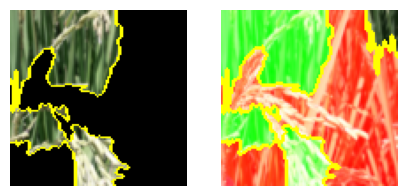

In [33]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (250).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 68ms/step
Accuracy of this prediction is 0.46277657


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 116ms/step


  1%|          | 10/1000 [00:00<00:18, 54.53it/s]

1/1 [==============================] - 0s 150ms/step


  2%|▏         | 20/1000 [00:00<00:22, 42.64it/s]

1/1 [==============================] - 0s 166ms/step


  3%|▎         | 30/1000 [00:00<00:24, 39.00it/s]

1/1 [==============================] - 0s 119ms/step


  4%|▍         | 40/1000 [00:00<00:23, 40.55it/s]

1/1 [==============================] - 0s 117ms/step


  5%|▌         | 50/1000 [00:01<00:22, 42.44it/s]

1/1 [==============================] - 0s 174ms/step


  6%|▌         | 60/1000 [00:01<00:23, 39.71it/s]

1/1 [==============================] - 0s 170ms/step


  7%|▋         | 70/1000 [00:01<00:24, 38.15it/s]

1/1 [==============================] - 0s 123ms/step


  8%|▊         | 80/1000 [00:01<00:23, 39.55it/s]

1/1 [==============================] - 0s 100ms/step


  9%|▉         | 90/1000 [00:02<00:21, 42.33it/s]

1/1 [==============================] - 0s 119ms/step


 10%|█         | 100/1000 [00:02<00:21, 42.49it/s]

1/1 [==============================] - 0s 160ms/step


 11%|█         | 110/1000 [00:02<00:21, 40.80it/s]

1/1 [==============================] - 0s 154ms/step


 12%|█▏        | 120/1000 [00:02<00:21, 40.28it/s]

1/1 [==============================] - 0s 102ms/step


 13%|█▎        | 130/1000 [00:03<00:20, 43.15it/s]

1/1 [==============================] - 0s 138ms/step


 14%|█▍        | 140/1000 [00:03<00:19, 44.48it/s]

1/1 [==============================] - 0s 130ms/step


 15%|█▌        | 150/1000 [00:03<00:19, 44.43it/s]

1/1 [==============================] - 0s 150ms/step


 16%|█▌        | 160/1000 [00:03<00:19, 42.14it/s]

1/1 [==============================] - 0s 138ms/step


 17%|█▋        | 170/1000 [00:04<00:19, 42.33it/s]

1/1 [==============================] - 0s 166ms/step


 18%|█▊        | 180/1000 [00:04<00:20, 40.50it/s]

1/1 [==============================] - 0s 161ms/step


 19%|█▉        | 190/1000 [00:04<00:20, 39.03it/s]

1/1 [==============================] - 0s 133ms/step


 20%|██        | 200/1000 [00:04<00:20, 39.34it/s]

1/1 [==============================] - 0s 150ms/step


 21%|██        | 210/1000 [00:05<00:21, 37.30it/s]

1/1 [==============================] - 0s 127ms/step


 22%|██▏       | 220/1000 [00:05<00:20, 37.84it/s]

1/1 [==============================] - 0s 157ms/step


 23%|██▎       | 230/1000 [00:05<00:20, 38.01it/s]

1/1 [==============================] - 0s 161ms/step


 24%|██▍       | 240/1000 [00:05<00:20, 36.25it/s]

1/1 [==============================] - 0s 150ms/step


 25%|██▌       | 250/1000 [00:06<00:19, 38.23it/s]

1/1 [==============================] - 0s 164ms/step


 26%|██▌       | 260/1000 [00:06<00:19, 37.29it/s]

1/1 [==============================] - 0s 173ms/step


 27%|██▋       | 270/1000 [00:06<00:19, 36.73it/s]

1/1 [==============================] - 0s 149ms/step


 28%|██▊       | 280/1000 [00:07<00:19, 37.60it/s]

1/1 [==============================] - 0s 117ms/step


 29%|██▉       | 290/1000 [00:07<00:17, 39.80it/s]

1/1 [==============================] - 0s 117ms/step


 30%|███       | 300/1000 [00:07<00:17, 40.66it/s]

1/1 [==============================] - 0s 115ms/step


 31%|███       | 310/1000 [00:07<00:16, 41.39it/s]

1/1 [==============================] - 0s 170ms/step


 32%|███▏      | 320/1000 [00:08<00:25, 26.64it/s]

1/1 [==============================] - 0s 117ms/step


 33%|███▎      | 330/1000 [00:08<00:21, 30.87it/s]

1/1 [==============================] - 0s 183ms/step


 34%|███▍      | 340/1000 [00:08<00:20, 32.61it/s]

1/1 [==============================] - 0s 194ms/step


 35%|███▌      | 350/1000 [00:09<00:21, 30.38it/s]

1/1 [==============================] - 0s 176ms/step


 36%|███▌      | 360/1000 [00:09<00:19, 32.80it/s]

1/1 [==============================] - 0s 167ms/step


 37%|███▋      | 370/1000 [00:09<00:20, 30.49it/s]

1/1 [==============================] - 0s 126ms/step


 38%|███▊      | 380/1000 [00:10<00:18, 33.89it/s]

1/1 [==============================] - 0s 126ms/step


 39%|███▉      | 390/1000 [00:10<00:17, 35.35it/s]

1/1 [==============================] - 0s 137ms/step


 40%|████      | 400/1000 [00:10<00:15, 37.54it/s]

1/1 [==============================] - 0s 105ms/step


 41%|████      | 410/1000 [00:10<00:14, 40.38it/s]

1/1 [==============================] - 0s 129ms/step


 42%|████▏     | 420/1000 [00:11<00:13, 41.87it/s]

1/1 [==============================] - 0s 116ms/step


 43%|████▎     | 430/1000 [00:11<00:12, 45.60it/s]

1/1 [==============================] - 0s 126ms/step


 44%|████▍     | 440/1000 [00:11<00:11, 47.37it/s]

1/1 [==============================] - 0s 187ms/step


 45%|████▌     | 450/1000 [00:11<00:12, 44.77it/s]

1/1 [==============================] - 0s 149ms/step


 46%|████▌     | 460/1000 [00:11<00:12, 43.27it/s]

1/1 [==============================] - 0s 108ms/step


 47%|████▋     | 470/1000 [00:12<00:11, 46.12it/s]

1/1 [==============================] - 0s 101ms/step


 48%|████▊     | 480/1000 [00:12<00:10, 50.27it/s]

1/1 [==============================] - 0s 118ms/step


 49%|████▉     | 490/1000 [00:12<00:10, 47.91it/s]

1/1 [==============================] - 0s 150ms/step


 50%|█████     | 500/1000 [00:12<00:11, 45.28it/s]

1/1 [==============================] - 0s 142ms/step


 51%|█████     | 510/1000 [00:12<00:11, 44.20it/s]

1/1 [==============================] - 0s 147ms/step


 52%|█████▏    | 520/1000 [00:13<00:10, 44.84it/s]

1/1 [==============================] - 0s 100ms/step


 53%|█████▎    | 530/1000 [00:13<00:10, 46.33it/s]

1/1 [==============================] - 0s 102ms/step


 54%|█████▍    | 540/1000 [00:13<00:09, 46.38it/s]

1/1 [==============================] - 0s 155ms/step


 55%|█████▌    | 550/1000 [00:13<00:10, 43.07it/s]

1/1 [==============================] - 0s 113ms/step


 56%|█████▌    | 560/1000 [00:14<00:09, 44.82it/s]

1/1 [==============================] - 0s 125ms/step


 57%|█████▋    | 570/1000 [00:14<00:09, 45.01it/s]

1/1 [==============================] - 0s 170ms/step


 58%|█████▊    | 580/1000 [00:14<00:10, 40.97it/s]

1/1 [==============================] - 0s 151ms/step


 59%|█████▉    | 590/1000 [00:14<00:10, 39.30it/s]

1/1 [==============================] - 0s 173ms/step


 60%|██████    | 600/1000 [00:15<00:10, 38.39it/s]

1/1 [==============================] - 0s 139ms/step


 61%|██████    | 610/1000 [00:15<00:09, 39.24it/s]

1/1 [==============================] - 0s 156ms/step


 62%|██████▏   | 620/1000 [00:15<00:09, 39.40it/s]

1/1 [==============================] - 0s 116ms/step


 63%|██████▎   | 630/1000 [00:15<00:08, 42.11it/s]

1/1 [==============================] - 0s 134ms/step


 64%|██████▍   | 640/1000 [00:16<00:08, 43.17it/s]

1/1 [==============================] - 0s 141ms/step


 65%|██████▌   | 650/1000 [00:16<00:07, 44.61it/s]

1/1 [==============================] - 0s 145ms/step


 66%|██████▌   | 660/1000 [00:16<00:07, 43.62it/s]

1/1 [==============================] - 0s 167ms/step


 67%|██████▋   | 670/1000 [00:16<00:08, 40.42it/s]

1/1 [==============================] - 0s 130ms/step


 68%|██████▊   | 680/1000 [00:16<00:07, 40.89it/s]

1/1 [==============================] - 0s 131ms/step


 69%|██████▉   | 690/1000 [00:17<00:07, 42.48it/s]

1/1 [==============================] - 0s 117ms/step


 70%|███████   | 700/1000 [00:17<00:06, 44.61it/s]

1/1 [==============================] - 0s 119ms/step


 71%|███████   | 710/1000 [00:17<00:06, 45.77it/s]

1/1 [==============================] - 0s 151ms/step


 72%|███████▏  | 720/1000 [00:17<00:06, 44.50it/s]

1/1 [==============================] - 0s 135ms/step


 73%|███████▎  | 730/1000 [00:18<00:06, 42.17it/s]

1/1 [==============================] - 0s 163ms/step


 74%|███████▍  | 740/1000 [00:18<00:06, 41.20it/s]

1/1 [==============================] - 0s 158ms/step


 75%|███████▌  | 750/1000 [00:18<00:06, 41.58it/s]

1/1 [==============================] - 0s 159ms/step


 76%|███████▌  | 760/1000 [00:18<00:06, 38.96it/s]

1/1 [==============================] - 0s 103ms/step


 77%|███████▋  | 770/1000 [00:19<00:05, 42.98it/s]

1/1 [==============================] - 0s 113ms/step


 78%|███████▊  | 780/1000 [00:19<00:04, 47.02it/s]

1/1 [==============================] - 0s 170ms/step


 79%|███████▉  | 790/1000 [00:19<00:04, 43.13it/s]

1/1 [==============================] - 0s 155ms/step


 80%|████████  | 800/1000 [00:19<00:05, 39.80it/s]

1/1 [==============================] - 0s 167ms/step


 81%|████████  | 810/1000 [00:20<00:04, 39.09it/s]

1/1 [==============================] - 0s 152ms/step


 82%|████████▏ | 820/1000 [00:20<00:04, 37.88it/s]

1/1 [==============================] - 0s 189ms/step


 83%|████████▎ | 830/1000 [00:20<00:04, 35.42it/s]

1/1 [==============================] - 0s 119ms/step


 84%|████████▍ | 840/1000 [00:20<00:04, 38.82it/s]

1/1 [==============================] - 0s 156ms/step


 85%|████████▌ | 850/1000 [00:21<00:03, 40.12it/s]

1/1 [==============================] - 0s 149ms/step


 86%|████████▌ | 860/1000 [00:21<00:03, 37.70it/s]

1/1 [==============================] - 0s 120ms/step


 87%|████████▋ | 870/1000 [00:21<00:03, 40.93it/s]

1/1 [==============================] - 0s 100ms/step


 88%|████████▊ | 880/1000 [00:21<00:02, 45.33it/s]

1/1 [==============================] - 0s 107ms/step


 89%|████████▉ | 890/1000 [00:21<00:02, 47.15it/s]

1/1 [==============================] - 0s 140ms/step


 90%|█████████ | 900/1000 [00:22<00:02, 49.24it/s]

1/1 [==============================] - 0s 143ms/step


 91%|█████████ | 910/1000 [00:22<00:01, 46.33it/s]

1/1 [==============================] - 0s 166ms/step


 92%|█████████▏| 920/1000 [00:22<00:01, 43.13it/s]

1/1 [==============================] - 0s 103ms/step


 93%|█████████▎| 930/1000 [00:22<00:01, 46.37it/s]

1/1 [==============================] - 0s 115ms/step


 94%|█████████▍| 940/1000 [00:23<00:01, 46.53it/s]

1/1 [==============================] - 0s 165ms/step


 95%|█████████▌| 950/1000 [00:23<00:01, 45.37it/s]

1/1 [==============================] - 0s 108ms/step


 96%|█████████▌| 960/1000 [00:23<00:00, 48.93it/s]

1/1 [==============================] - 0s 133ms/step


 97%|█████████▋| 970/1000 [00:23<00:00, 45.92it/s]

1/1 [==============================] - 0s 123ms/step


 98%|█████████▊| 980/1000 [00:23<00:00, 43.86it/s]

1/1 [==============================] - 0s 134ms/step


 99%|█████████▉| 990/1000 [00:24<00:00, 44.03it/s]

1/1 [==============================] - 0s 156ms/step


100%|██████████| 1000/1000 [00:24<00:00, 40.93it/s]


(-0.5, 99.5, 99.5, -0.5)

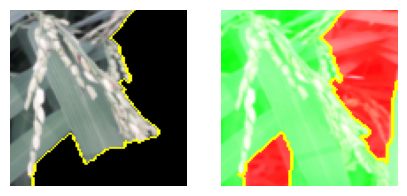

In [34]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (220).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 59ms/step
Accuracy of this prediction is 0.46273795


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 117ms/step


  1%|          | 10/1000 [00:00<00:19, 50.37it/s]

1/1 [==============================] - 0s 115ms/step


  2%|▏         | 20/1000 [00:00<00:21, 45.83it/s]

1/1 [==============================] - 0s 110ms/step


  3%|▎         | 30/1000 [00:00<00:21, 44.55it/s]

1/1 [==============================] - 0s 131ms/step


  4%|▍         | 40/1000 [00:00<00:21, 45.08it/s]

1/1 [==============================] - 0s 104ms/step


  5%|▌         | 50/1000 [00:01<00:20, 47.27it/s]

1/1 [==============================] - 0s 145ms/step


  6%|▌         | 60/1000 [00:01<00:20, 46.06it/s]

1/1 [==============================] - 0s 92ms/step


  7%|▋         | 70/1000 [00:01<00:18, 48.97it/s]

1/1 [==============================] - 0s 100ms/step


  8%|▊         | 80/1000 [00:01<00:18, 50.52it/s]

1/1 [==============================] - 0s 101ms/step


  9%|▉         | 90/1000 [00:01<00:17, 50.64it/s]

1/1 [==============================] - 0s 115ms/step


 10%|█         | 100/1000 [00:02<00:18, 47.86it/s]

1/1 [==============================] - 0s 115ms/step


 11%|█         | 110/1000 [00:02<00:18, 47.12it/s]

1/1 [==============================] - 0s 99ms/step


 12%|█▏        | 120/1000 [00:02<00:18, 48.80it/s]

1/1 [==============================] - 0s 134ms/step


 13%|█▎        | 130/1000 [00:02<00:18, 47.18it/s]

1/1 [==============================] - 0s 112ms/step


 14%|█▍        | 140/1000 [00:02<00:18, 45.82it/s]

1/1 [==============================] - 0s 100ms/step


 15%|█▌        | 150/1000 [00:03<00:18, 45.92it/s]

1/1 [==============================] - 0s 151ms/step


 16%|█▌        | 160/1000 [00:03<00:19, 43.88it/s]

1/1 [==============================] - 0s 112ms/step


 17%|█▋        | 170/1000 [00:03<00:18, 44.82it/s]

1/1 [==============================] - 0s 151ms/step


 18%|█▊        | 180/1000 [00:03<00:19, 43.05it/s]

1/1 [==============================] - 0s 127ms/step


 19%|█▉        | 190/1000 [00:04<00:18, 43.36it/s]

1/1 [==============================] - 0s 151ms/step


 20%|██        | 200/1000 [00:04<00:19, 41.49it/s]

1/1 [==============================] - 0s 115ms/step


 21%|██        | 210/1000 [00:04<00:17, 44.68it/s]

1/1 [==============================] - 0s 132ms/step


 22%|██▏       | 220/1000 [00:04<00:17, 43.77it/s]

1/1 [==============================] - 0s 160ms/step


 23%|██▎       | 230/1000 [00:05<00:18, 40.67it/s]

1/1 [==============================] - 0s 120ms/step


 24%|██▍       | 240/1000 [00:05<00:18, 41.30it/s]

1/1 [==============================] - 0s 137ms/step


 25%|██▌       | 250/1000 [00:05<00:18, 40.97it/s]

1/1 [==============================] - 0s 147ms/step


 26%|██▌       | 260/1000 [00:05<00:18, 40.69it/s]

1/1 [==============================] - 0s 149ms/step


 27%|██▋       | 270/1000 [00:06<00:17, 41.13it/s]

1/1 [==============================] - 0s 104ms/step


 28%|██▊       | 280/1000 [00:06<00:17, 41.81it/s]

1/1 [==============================] - 0s 100ms/step


 29%|██▉       | 290/1000 [00:06<00:15, 44.80it/s]

1/1 [==============================] - 0s 132ms/step


 30%|███       | 300/1000 [00:06<00:15, 44.26it/s]

1/1 [==============================] - 0s 104ms/step


 31%|███       | 310/1000 [00:06<00:16, 42.72it/s]

1/1 [==============================] - 0s 116ms/step


 32%|███▏      | 320/1000 [00:07<00:15, 44.67it/s]

1/1 [==============================] - 0s 166ms/step


 33%|███▎      | 330/1000 [00:07<00:16, 40.51it/s]

1/1 [==============================] - 0s 116ms/step


 34%|███▍      | 340/1000 [00:07<00:15, 42.08it/s]

1/1 [==============================] - 0s 115ms/step


 35%|███▌      | 350/1000 [00:07<00:15, 42.39it/s]

1/1 [==============================] - 0s 115ms/step


 36%|███▌      | 360/1000 [00:08<00:15, 41.49it/s]

1/1 [==============================] - 0s 114ms/step


 37%|███▋      | 370/1000 [00:08<00:14, 44.75it/s]

1/1 [==============================] - 0s 156ms/step


 38%|███▊      | 380/1000 [00:08<00:13, 45.09it/s]

1/1 [==============================] - 0s 100ms/step


 39%|███▉      | 390/1000 [00:08<00:13, 45.41it/s]

1/1 [==============================] - 0s 100ms/step


 40%|████      | 400/1000 [00:08<00:12, 47.78it/s]

1/1 [==============================] - 0s 100ms/step


 41%|████      | 410/1000 [00:09<00:12, 47.29it/s]

1/1 [==============================] - 0s 139ms/step


 42%|████▏     | 420/1000 [00:09<00:13, 44.00it/s]

1/1 [==============================] - 0s 100ms/step


 43%|████▎     | 430/1000 [00:09<00:12, 46.74it/s]

1/1 [==============================] - 0s 120ms/step


 44%|████▍     | 440/1000 [00:09<00:11, 46.69it/s]

1/1 [==============================] - 0s 141ms/step


 45%|████▌     | 450/1000 [00:10<00:12, 44.16it/s]

1/1 [==============================] - 0s 101ms/step


 46%|████▌     | 460/1000 [00:10<00:11, 45.18it/s]

1/1 [==============================] - 0s 141ms/step


 47%|████▋     | 470/1000 [00:10<00:11, 44.63it/s]

1/1 [==============================] - 0s 91ms/step


 48%|████▊     | 480/1000 [00:10<00:11, 47.27it/s]

1/1 [==============================] - 0s 131ms/step


 49%|████▉     | 490/1000 [00:10<00:11, 44.08it/s]

1/1 [==============================] - 0s 114ms/step


 50%|█████     | 500/1000 [00:11<00:11, 45.25it/s]

1/1 [==============================] - 0s 104ms/step


 51%|█████     | 510/1000 [00:11<00:10, 46.05it/s]

1/1 [==============================] - 0s 103ms/step


 52%|█████▏    | 520/1000 [00:11<00:09, 48.35it/s]

1/1 [==============================] - 0s 111ms/step


 53%|█████▎    | 530/1000 [00:11<00:09, 50.08it/s]

1/1 [==============================] - 0s 103ms/step


 54%|█████▍    | 540/1000 [00:11<00:09, 51.05it/s]

1/1 [==============================] - 0s 103ms/step


 55%|█████▌    | 550/1000 [00:12<00:08, 52.10it/s]

1/1 [==============================] - 0s 105ms/step


 56%|█████▌    | 560/1000 [00:12<00:08, 52.15it/s]

1/1 [==============================] - 0s 107ms/step


 57%|█████▋    | 570/1000 [00:12<00:08, 52.72it/s]

1/1 [==============================] - 0s 89ms/step


 58%|█████▊    | 580/1000 [00:12<00:07, 55.04it/s]

1/1 [==============================] - 0s 95ms/step


 59%|█████▉    | 590/1000 [00:12<00:07, 58.11it/s]

1/1 [==============================] - 0s 103ms/step


 60%|██████    | 600/1000 [00:12<00:06, 59.72it/s]

1/1 [==============================] - 0s 107ms/step


 61%|██████    | 610/1000 [00:13<00:06, 60.50it/s]

1/1 [==============================] - 0s 98ms/step


 62%|██████▏   | 620/1000 [00:13<00:06, 61.43it/s]

1/1 [==============================] - 0s 142ms/step


 63%|██████▎   | 630/1000 [00:13<00:06, 55.64it/s]

1/1 [==============================] - 0s 116ms/step


 64%|██████▍   | 640/1000 [00:13<00:06, 51.94it/s]

1/1 [==============================] - 0s 116ms/step


 65%|██████▌   | 650/1000 [00:13<00:06, 51.85it/s]

1/1 [==============================] - 0s 100ms/step


 66%|██████▌   | 660/1000 [00:14<00:06, 51.25it/s]

1/1 [==============================] - 0s 105ms/step


 67%|██████▋   | 670/1000 [00:14<00:06, 49.99it/s]

1/1 [==============================] - 0s 100ms/step


 68%|██████▊   | 680/1000 [00:14<00:06, 52.10it/s]

1/1 [==============================] - 0s 116ms/step


 69%|██████▉   | 690/1000 [00:14<00:06, 49.06it/s]

1/1 [==============================] - 0s 99ms/step


 70%|███████   | 700/1000 [00:14<00:05, 50.53it/s]

1/1 [==============================] - 0s 99ms/step


 71%|███████   | 710/1000 [00:15<00:05, 52.41it/s]

1/1 [==============================] - 0s 104ms/step


 72%|███████▏  | 720/1000 [00:15<00:05, 52.14it/s]

1/1 [==============================] - 0s 125ms/step


 73%|███████▎  | 730/1000 [00:15<00:05, 50.13it/s]

1/1 [==============================] - 0s 141ms/step


 74%|███████▍  | 740/1000 [00:15<00:05, 46.74it/s]

1/1 [==============================] - 0s 150ms/step


 75%|███████▌  | 750/1000 [00:16<00:05, 44.14it/s]

1/1 [==============================] - 0s 94ms/step


 76%|███████▌  | 760/1000 [00:16<00:05, 47.04it/s]

1/1 [==============================] - 0s 111ms/step


 77%|███████▋  | 770/1000 [00:16<00:04, 48.83it/s]

1/1 [==============================] - 0s 147ms/step


 78%|███████▊  | 780/1000 [00:16<00:04, 48.06it/s]

1/1 [==============================] - 0s 103ms/step


 79%|███████▉  | 790/1000 [00:16<00:04, 48.28it/s]

1/1 [==============================] - 0s 98ms/step


 80%|████████  | 800/1000 [00:16<00:03, 50.24it/s]

1/1 [==============================] - 0s 96ms/step


 81%|████████  | 810/1000 [00:17<00:03, 52.93it/s]

1/1 [==============================] - 0s 156ms/step


 82%|████████▏ | 820/1000 [00:17<00:03, 47.81it/s]

1/1 [==============================] - 0s 99ms/step


 83%|████████▎ | 830/1000 [00:17<00:03, 48.71it/s]

1/1 [==============================] - 0s 111ms/step


 84%|████████▍ | 840/1000 [00:17<00:03, 49.41it/s]

1/1 [==============================] - 0s 99ms/step


 85%|████████▌ | 850/1000 [00:17<00:02, 51.75it/s]

1/1 [==============================] - 0s 113ms/step


 86%|████████▌ | 860/1000 [00:18<00:02, 51.47it/s]

1/1 [==============================] - 0s 112ms/step


 87%|████████▋ | 870/1000 [00:18<00:02, 49.51it/s]

1/1 [==============================] - 0s 85ms/step


 88%|████████▊ | 880/1000 [00:18<00:02, 50.86it/s]

1/1 [==============================] - 0s 130ms/step


 89%|████████▉ | 890/1000 [00:18<00:02, 48.31it/s]

1/1 [==============================] - 0s 114ms/step


 90%|█████████ | 900/1000 [00:19<00:02, 48.95it/s]

1/1 [==============================] - 0s 213ms/step


 91%|█████████ | 910/1000 [00:19<00:02, 39.25it/s]

1/1 [==============================] - 0s 85ms/step


 92%|█████████▏| 920/1000 [00:19<00:01, 44.40it/s]

1/1 [==============================] - 0s 93ms/step


 93%|█████████▎| 930/1000 [00:19<00:01, 49.52it/s]

1/1 [==============================] - 0s 89ms/step


 94%|█████████▍| 940/1000 [00:19<00:01, 51.04it/s]

1/1 [==============================] - 0s 85ms/step


 95%|█████████▌| 950/1000 [00:20<00:00, 50.51it/s]

1/1 [==============================] - 0s 100ms/step


 96%|█████████▌| 960/1000 [00:20<00:00, 52.88it/s]

1/1 [==============================] - 0s 134ms/step


 97%|█████████▋| 970/1000 [00:20<00:00, 48.23it/s]

1/1 [==============================] - 0s 100ms/step


 98%|█████████▊| 980/1000 [00:20<00:00, 51.31it/s]

1/1 [==============================] - 0s 101ms/step


 99%|█████████▉| 990/1000 [00:20<00:00, 50.78it/s]

1/1 [==============================] - 0s 100ms/step


100%|██████████| 1000/1000 [00:21<00:00, 47.53it/s]


(-0.5, 99.5, 99.5, -0.5)

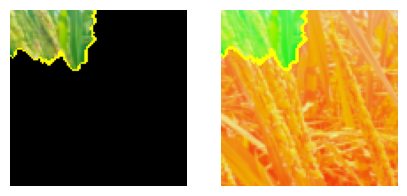

In [35]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (360).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')

1/1 [==============================] - 0s 67ms/step
Accuracy of this prediction is 0.4627354


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 83ms/step


  1%|          | 10/1000 [00:00<00:16, 59.50it/s]

1/1 [==============================] - 0s 115ms/step


  2%|▏         | 20/1000 [00:00<00:16, 59.73it/s]

1/1 [==============================] - 0s 101ms/step


  3%|▎         | 30/1000 [00:00<00:18, 52.56it/s]

1/1 [==============================] - 0s 84ms/step


  4%|▍         | 40/1000 [00:00<00:18, 51.63it/s]

1/1 [==============================] - 0s 149ms/step


  5%|▌         | 50/1000 [00:01<00:20, 46.84it/s]

1/1 [==============================] - 0s 117ms/step


  6%|▌         | 60/1000 [00:01<00:19, 47.86it/s]

1/1 [==============================] - 0s 103ms/step


  7%|▋         | 70/1000 [00:01<00:18, 49.19it/s]

1/1 [==============================] - 0s 117ms/step


  8%|▊         | 80/1000 [00:01<00:19, 47.36it/s]

1/1 [==============================] - 0s 116ms/step


  9%|▉         | 90/1000 [00:01<00:18, 48.13it/s]

1/1 [==============================] - 0s 100ms/step


 10%|█         | 100/1000 [00:02<00:17, 50.09it/s]

1/1 [==============================] - 0s 117ms/step


 11%|█         | 110/1000 [00:02<00:17, 50.08it/s]

1/1 [==============================] - 0s 101ms/step


 12%|█▏        | 120/1000 [00:02<00:16, 52.16it/s]

1/1 [==============================] - 0s 83ms/step


 13%|█▎        | 130/1000 [00:02<00:16, 53.48it/s]

1/1 [==============================] - 0s 100ms/step


 14%|█▍        | 140/1000 [00:02<00:15, 53.76it/s]

1/1 [==============================] - 0s 83ms/step


 15%|█▌        | 150/1000 [00:02<00:15, 55.50it/s]

1/1 [==============================] - 0s 101ms/step


 16%|█▌        | 160/1000 [00:03<00:14, 56.73it/s]

1/1 [==============================] - 0s 116ms/step


 17%|█▋        | 170/1000 [00:03<00:15, 54.59it/s]

1/1 [==============================] - 0s 138ms/step


 18%|█▊        | 180/1000 [00:03<00:16, 51.03it/s]

1/1 [==============================] - 0s 150ms/step


 19%|█▉        | 190/1000 [00:03<00:16, 50.13it/s]

1/1 [==============================] - 0s 100ms/step


 20%|██        | 200/1000 [00:03<00:15, 50.22it/s]

1/1 [==============================] - 0s 101ms/step


 21%|██        | 210/1000 [00:04<00:15, 51.30it/s]

1/1 [==============================] - 0s 100ms/step


 22%|██▏       | 220/1000 [00:04<00:15, 50.94it/s]

1/1 [==============================] - 0s 116ms/step


 23%|██▎       | 230/1000 [00:04<00:14, 53.08it/s]

1/1 [==============================] - 0s 100ms/step


 24%|██▍       | 240/1000 [00:04<00:13, 56.83it/s]

1/1 [==============================] - 0s 100ms/step


 25%|██▌       | 250/1000 [00:04<00:13, 54.64it/s]

1/1 [==============================] - 0s 100ms/step


 26%|██▌       | 260/1000 [00:04<00:13, 54.57it/s]

1/1 [==============================] - 0s 117ms/step


 27%|██▋       | 270/1000 [00:05<00:13, 54.52it/s]

1/1 [==============================] - 0s 94ms/step


 28%|██▊       | 280/1000 [00:05<00:13, 53.13it/s]

1/1 [==============================] - 0s 83ms/step


 29%|██▉       | 290/1000 [00:05<00:13, 53.54it/s]

1/1 [==============================] - 0s 83ms/step


 30%|███       | 300/1000 [00:05<00:12, 56.93it/s]

1/1 [==============================] - 0s 105ms/step


 31%|███       | 310/1000 [00:05<00:12, 57.25it/s]

1/1 [==============================] - 0s 133ms/step


 32%|███▏      | 320/1000 [00:06<00:12, 52.51it/s]

1/1 [==============================] - 0s 117ms/step


 33%|███▎      | 330/1000 [00:06<00:12, 53.06it/s]

1/1 [==============================] - 0s 134ms/step


 34%|███▍      | 340/1000 [00:06<00:13, 50.37it/s]

1/1 [==============================] - 0s 117ms/step


 35%|███▌      | 350/1000 [00:06<00:13, 48.35it/s]

1/1 [==============================] - 0s 83ms/step


 36%|███▌      | 360/1000 [00:06<00:12, 49.93it/s]

1/1 [==============================] - 0s 117ms/step


 37%|███▋      | 370/1000 [00:07<00:12, 49.19it/s]

1/1 [==============================] - 0s 85ms/step


 38%|███▊      | 380/1000 [00:07<00:12, 51.39it/s]

1/1 [==============================] - 0s 166ms/step


 39%|███▉      | 390/1000 [00:07<00:12, 47.44it/s]

1/1 [==============================] - 0s 85ms/step


 40%|████      | 400/1000 [00:07<00:12, 47.04it/s]

1/1 [==============================] - 0s 100ms/step


 41%|████      | 410/1000 [00:07<00:11, 50.32it/s]

1/1 [==============================] - 0s 112ms/step


 42%|████▏     | 420/1000 [00:08<00:11, 50.19it/s]

1/1 [==============================] - 0s 119ms/step


 43%|████▎     | 430/1000 [00:08<00:11, 50.14it/s]

1/1 [==============================] - 0s 98ms/step


 44%|████▍     | 440/1000 [00:08<00:10, 51.34it/s]

1/1 [==============================] - 0s 100ms/step


 45%|████▌     | 450/1000 [00:08<00:10, 51.00it/s]

1/1 [==============================] - 0s 100ms/step


 46%|████▌     | 460/1000 [00:08<00:10, 51.99it/s]

1/1 [==============================] - 0s 83ms/step


 47%|████▋     | 470/1000 [00:09<00:10, 52.77it/s]

1/1 [==============================] - 0s 116ms/step


 48%|████▊     | 480/1000 [00:09<00:10, 51.91it/s]

1/1 [==============================] - 0s 83ms/step


 49%|████▉     | 490/1000 [00:09<00:10, 50.04it/s]

1/1 [==============================] - 0s 85ms/step


 50%|█████     | 500/1000 [00:09<00:09, 50.01it/s]

1/1 [==============================] - 0s 115ms/step


 51%|█████     | 510/1000 [00:09<00:09, 51.28it/s]

1/1 [==============================] - 0s 107ms/step


 52%|█████▏    | 520/1000 [00:10<00:09, 49.73it/s]

1/1 [==============================] - 0s 100ms/step


 53%|█████▎    | 530/1000 [00:10<00:08, 53.84it/s]

1/1 [==============================] - 0s 120ms/step


 54%|█████▍    | 540/1000 [00:10<00:08, 54.75it/s]

1/1 [==============================] - 0s 83ms/step


 55%|█████▌    | 550/1000 [00:10<00:07, 58.76it/s]

1/1 [==============================] - 0s 100ms/step


 56%|█████▌    | 560/1000 [00:10<00:07, 55.78it/s]

1/1 [==============================] - 0s 100ms/step


 57%|█████▋    | 570/1000 [00:10<00:07, 55.50it/s]

1/1 [==============================] - 0s 83ms/step


 58%|█████▊    | 580/1000 [00:11<00:07, 56.78it/s]

1/1 [==============================] - 0s 100ms/step


 59%|█████▉    | 590/1000 [00:11<00:06, 59.32it/s]

1/1 [==============================] - 0s 133ms/step


 60%|██████    | 600/1000 [00:11<00:07, 53.03it/s]

1/1 [==============================] - 0s 92ms/step


 61%|██████    | 610/1000 [00:11<00:07, 53.01it/s]

1/1 [==============================] - 0s 83ms/step


 62%|██████▏   | 620/1000 [00:11<00:07, 54.14it/s]

1/1 [==============================] - 0s 84ms/step


 63%|██████▎   | 630/1000 [00:12<00:06, 57.35it/s]

1/1 [==============================] - 0s 100ms/step


 64%|██████▍   | 640/1000 [00:12<00:06, 56.46it/s]

1/1 [==============================] - 0s 116ms/step


 65%|██████▌   | 650/1000 [00:12<00:06, 55.69it/s]

1/1 [==============================] - 0s 134ms/step


 66%|██████▌   | 660/1000 [00:12<00:06, 51.27it/s]

1/1 [==============================] - 0s 149ms/step


 67%|██████▋   | 670/1000 [00:12<00:07, 45.87it/s]

1/1 [==============================] - 0s 163ms/step


 68%|██████▊   | 680/1000 [00:13<00:07, 42.34it/s]

1/1 [==============================] - 0s 123ms/step


 69%|██████▉   | 690/1000 [00:13<00:07, 41.66it/s]

1/1 [==============================] - 0s 100ms/step


 70%|███████   | 700/1000 [00:13<00:06, 44.82it/s]

1/1 [==============================] - 0s 134ms/step


 71%|███████   | 710/1000 [00:13<00:06, 45.20it/s]

1/1 [==============================] - 0s 165ms/step


 72%|███████▏  | 720/1000 [00:14<00:06, 41.68it/s]

1/1 [==============================] - 0s 99ms/step


 73%|███████▎  | 730/1000 [00:14<00:06, 43.90it/s]

1/1 [==============================] - 0s 168ms/step


 74%|███████▍  | 740/1000 [00:14<00:06, 41.57it/s]

1/1 [==============================] - 0s 118ms/step


 75%|███████▌  | 750/1000 [00:14<00:05, 44.93it/s]

1/1 [==============================] - 0s 107ms/step


 76%|███████▌  | 760/1000 [00:14<00:05, 46.38it/s]

1/1 [==============================] - 0s 134ms/step


 77%|███████▋  | 770/1000 [00:15<00:05, 44.22it/s]

1/1 [==============================] - 0s 137ms/step


 78%|███████▊  | 780/1000 [00:15<00:05, 41.63it/s]

1/1 [==============================] - 0s 195ms/step


 79%|███████▉  | 790/1000 [00:15<00:05, 38.47it/s]

1/1 [==============================] - 0s 121ms/step


 80%|████████  | 800/1000 [00:16<00:05, 37.72it/s]

1/1 [==============================] - 0s 97ms/step


 81%|████████  | 810/1000 [00:16<00:04, 41.29it/s]

1/1 [==============================] - 0s 123ms/step


 82%|████████▏ | 820/1000 [00:16<00:04, 44.48it/s]

1/1 [==============================] - 0s 166ms/step


 83%|████████▎ | 830/1000 [00:16<00:03, 44.35it/s]

1/1 [==============================] - 0s 169ms/step


 84%|████████▍ | 840/1000 [00:16<00:03, 41.93it/s]

1/1 [==============================] - 0s 101ms/step


 85%|████████▌ | 850/1000 [00:17<00:03, 43.60it/s]

1/1 [==============================] - 0s 143ms/step


 86%|████████▌ | 860/1000 [00:17<00:03, 43.27it/s]

1/1 [==============================] - 0s 116ms/step


 87%|████████▋ | 870/1000 [00:17<00:02, 45.86it/s]

1/1 [==============================] - 0s 138ms/step


 88%|████████▊ | 880/1000 [00:17<00:02, 45.05it/s]

1/1 [==============================] - 0s 166ms/step


 89%|████████▉ | 890/1000 [00:18<00:02, 41.86it/s]

1/1 [==============================] - 0s 157ms/step


 90%|█████████ | 900/1000 [00:18<00:02, 39.17it/s]

1/1 [==============================] - 0s 139ms/step


 91%|█████████ | 910/1000 [00:18<00:02, 40.61it/s]

1/1 [==============================] - 0s 117ms/step


 92%|█████████▏| 920/1000 [00:18<00:01, 42.88it/s]

1/1 [==============================] - 0s 116ms/step


 93%|█████████▎| 930/1000 [00:19<00:01, 43.91it/s]

1/1 [==============================] - 0s 116ms/step


 94%|█████████▍| 940/1000 [00:19<00:01, 44.57it/s]

1/1 [==============================] - 0s 112ms/step


 95%|█████████▌| 950/1000 [00:19<00:01, 44.99it/s]

1/1 [==============================] - 0s 156ms/step


 96%|█████████▌| 960/1000 [00:19<00:00, 43.27it/s]

1/1 [==============================] - 0s 107ms/step


 97%|█████████▋| 970/1000 [00:19<00:00, 44.35it/s]

1/1 [==============================] - 0s 182ms/step


 98%|█████████▊| 980/1000 [00:20<00:00, 40.94it/s]

1/1 [==============================] - 0s 139ms/step


 99%|█████████▉| 990/1000 [00:20<00:00, 39.00it/s]

1/1 [==============================] - 0s 149ms/step


100%|██████████| 1000/1000 [00:20<00:00, 48.32it/s]


(-0.5, 99.5, 99.5, -0.5)

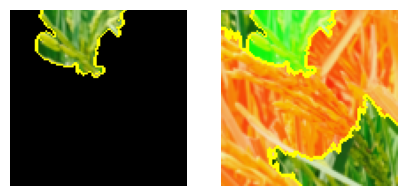

In [36]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (372).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')

1/1 [==============================] - 0s 132ms/step
Accuracy of this prediction is 0.4627755


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 127ms/step


  1%|          | 10/1000 [00:00<00:21, 45.18it/s]

1/1 [==============================] - 0s 109ms/step


  2%|▏         | 20/1000 [00:00<00:19, 49.89it/s]

1/1 [==============================] - 0s 123ms/step


  3%|▎         | 30/1000 [00:00<00:19, 50.71it/s]

1/1 [==============================] - 0s 115ms/step


  4%|▍         | 40/1000 [00:00<00:18, 51.77it/s]

1/1 [==============================] - 0s 129ms/step


  5%|▌         | 50/1000 [00:00<00:18, 52.42it/s]

1/1 [==============================] - 0s 118ms/step


  6%|▌         | 60/1000 [00:01<00:18, 51.13it/s]

1/1 [==============================] - 0s 117ms/step


  7%|▋         | 70/1000 [00:01<00:17, 52.32it/s]

1/1 [==============================] - 0s 127ms/step


  8%|▊         | 80/1000 [00:01<00:18, 50.96it/s]

1/1 [==============================] - 0s 117ms/step


  9%|▉         | 90/1000 [00:01<00:17, 51.28it/s]

1/1 [==============================] - 0s 114ms/step


 10%|█         | 100/1000 [00:01<00:17, 50.92it/s]

1/1 [==============================] - 0s 125ms/step


 11%|█         | 110/1000 [00:02<00:17, 49.57it/s]

1/1 [==============================] - 0s 116ms/step


 12%|█▏        | 120/1000 [00:02<00:17, 49.30it/s]

1/1 [==============================] - 0s 161ms/step


 13%|█▎        | 130/1000 [00:02<00:19, 45.49it/s]

1/1 [==============================] - 0s 149ms/step


 14%|█▍        | 140/1000 [00:02<00:20, 42.69it/s]

1/1 [==============================] - 0s 165ms/step


 15%|█▌        | 150/1000 [00:03<00:20, 40.81it/s]

1/1 [==============================] - 0s 111ms/step


 16%|█▌        | 160/1000 [00:03<00:19, 43.61it/s]

1/1 [==============================] - 0s 151ms/step


 17%|█▋        | 170/1000 [00:03<00:19, 41.51it/s]

1/1 [==============================] - 0s 105ms/step


 18%|█▊        | 180/1000 [00:03<00:18, 43.44it/s]

1/1 [==============================] - 0s 155ms/step


 19%|█▉        | 190/1000 [00:04<00:19, 41.82it/s]

1/1 [==============================] - 0s 100ms/step


 20%|██        | 200/1000 [00:04<00:17, 44.71it/s]

1/1 [==============================] - 0s 100ms/step


 21%|██        | 210/1000 [00:04<00:16, 47.15it/s]

1/1 [==============================] - 0s 107ms/step


 22%|██▏       | 220/1000 [00:04<00:16, 46.92it/s]

1/1 [==============================] - 0s 100ms/step


 23%|██▎       | 230/1000 [00:04<00:15, 48.89it/s]

1/1 [==============================] - 0s 101ms/step


 24%|██▍       | 240/1000 [00:05<00:14, 52.09it/s]

1/1 [==============================] - 0s 134ms/step


 25%|██▌       | 250/1000 [00:05<00:15, 49.82it/s]

1/1 [==============================] - 0s 119ms/step


 26%|██▌       | 260/1000 [00:05<00:15, 47.96it/s]

1/1 [==============================] - 0s 97ms/step


 27%|██▋       | 270/1000 [00:05<00:14, 51.58it/s]

1/1 [==============================] - 0s 93ms/step


 28%|██▊       | 280/1000 [00:05<00:13, 53.63it/s]

1/1 [==============================] - 0s 116ms/step


 29%|██▉       | 290/1000 [00:05<00:12, 55.18it/s]

1/1 [==============================] - 0s 114ms/step


 30%|███       | 300/1000 [00:06<00:12, 54.84it/s]

1/1 [==============================] - 0s 97ms/step


 31%|███       | 310/1000 [00:06<00:12, 56.42it/s]

1/1 [==============================] - 0s 96ms/step


 32%|███▏      | 320/1000 [00:06<00:11, 57.47it/s]

1/1 [==============================] - 0s 100ms/step


 33%|███▎      | 330/1000 [00:06<00:11, 57.94it/s]

1/1 [==============================] - 0s 152ms/step


 34%|███▍      | 340/1000 [00:06<00:12, 52.31it/s]

1/1 [==============================] - 0s 218ms/step


 35%|███▌      | 350/1000 [00:07<00:15, 41.01it/s]

1/1 [==============================] - 0s 218ms/step


 36%|███▌      | 360/1000 [00:07<00:18, 34.40it/s]

1/1 [==============================] - 0s 217ms/step


 37%|███▋      | 370/1000 [00:08<00:20, 31.01it/s]

1/1 [==============================] - 0s 236ms/step


 38%|███▊      | 380/1000 [00:08<00:21, 28.38it/s]

1/1 [==============================] - 0s 237ms/step


 39%|███▉      | 390/1000 [00:08<00:23, 25.54it/s]

1/1 [==============================] - 0s 254ms/step


 40%|████      | 400/1000 [00:09<00:24, 24.53it/s]

1/1 [==============================] - 0s 234ms/step


 41%|████      | 410/1000 [00:09<00:24, 24.04it/s]

1/1 [==============================] - 0s 266ms/step


 42%|████▏     | 420/1000 [00:10<00:24, 23.70it/s]

1/1 [==============================] - 0s 231ms/step


 43%|████▎     | 430/1000 [00:10<00:24, 23.46it/s]

1/1 [==============================] - 0s 207ms/step


 44%|████▍     | 440/1000 [00:11<00:23, 23.72it/s]

1/1 [==============================] - 0s 108ms/step


 45%|████▌     | 450/1000 [00:11<00:19, 28.63it/s]

1/1 [==============================] - 0s 108ms/step


 46%|████▌     | 460/1000 [00:11<00:16, 32.82it/s]

1/1 [==============================] - 0s 100ms/step


 47%|████▋     | 470/1000 [00:11<00:13, 37.98it/s]

1/1 [==============================] - 0s 114ms/step


 48%|████▊     | 480/1000 [00:11<00:12, 40.09it/s]

1/1 [==============================] - 0s 169ms/step


 49%|████▉     | 490/1000 [00:12<00:12, 41.30it/s]

1/1 [==============================] - 0s 139ms/step


 50%|█████     | 500/1000 [00:12<00:11, 42.43it/s]

1/1 [==============================] - 0s 99ms/step


 51%|█████     | 510/1000 [00:12<00:10, 46.95it/s]

1/1 [==============================] - 0s 93ms/step


 52%|█████▏    | 520/1000 [00:12<00:09, 49.50it/s]

1/1 [==============================] - 0s 145ms/step


 53%|█████▎    | 530/1000 [00:12<00:10, 45.56it/s]

1/1 [==============================] - 0s 137ms/step


 54%|█████▍    | 540/1000 [00:13<00:10, 45.13it/s]

1/1 [==============================] - 0s 126ms/step


 55%|█████▌    | 550/1000 [00:13<00:09, 46.09it/s]

1/1 [==============================] - 0s 99ms/step


 56%|█████▌    | 560/1000 [00:13<00:09, 47.20it/s]

1/1 [==============================] - 0s 148ms/step


 57%|█████▋    | 570/1000 [00:13<00:09, 43.62it/s]

1/1 [==============================] - 0s 150ms/step


 58%|█████▊    | 580/1000 [00:14<00:09, 42.45it/s]

1/1 [==============================] - 0s 127ms/step


 59%|█████▉    | 590/1000 [00:14<00:09, 43.92it/s]

1/1 [==============================] - 0s 100ms/step


 60%|██████    | 600/1000 [00:14<00:08, 48.65it/s]

1/1 [==============================] - 0s 118ms/step


 61%|██████    | 610/1000 [00:14<00:08, 47.88it/s]

1/1 [==============================] - 0s 111ms/step


 62%|██████▏   | 620/1000 [00:14<00:08, 47.15it/s]

1/1 [==============================] - 0s 103ms/step


 63%|██████▎   | 630/1000 [00:15<00:07, 47.11it/s]

1/1 [==============================] - 0s 151ms/step


 64%|██████▍   | 640/1000 [00:15<00:07, 46.19it/s]

1/1 [==============================] - 0s 166ms/step


 65%|██████▌   | 650/1000 [00:15<00:08, 42.36it/s]

1/1 [==============================] - 0s 151ms/step


 66%|██████▌   | 660/1000 [00:15<00:08, 41.17it/s]

1/1 [==============================] - 0s 116ms/step


 67%|██████▋   | 670/1000 [00:16<00:07, 42.70it/s]

1/1 [==============================] - 0s 119ms/step


 68%|██████▊   | 680/1000 [00:16<00:07, 45.45it/s]

1/1 [==============================] - 0s 123ms/step


 69%|██████▉   | 690/1000 [00:16<00:07, 44.27it/s]

1/1 [==============================] - 0s 224ms/step


 70%|███████   | 700/1000 [00:16<00:07, 38.00it/s]

1/1 [==============================] - 0s 101ms/step


 71%|███████   | 710/1000 [00:17<00:07, 40.89it/s]

1/1 [==============================] - 0s 128ms/step


 72%|███████▏  | 720/1000 [00:17<00:06, 44.23it/s]

1/1 [==============================] - 0s 142ms/step


 73%|███████▎  | 730/1000 [00:17<00:06, 41.68it/s]

1/1 [==============================] - 0s 157ms/step


 74%|███████▍  | 740/1000 [00:17<00:06, 39.82it/s]

1/1 [==============================] - 0s 118ms/step


 75%|███████▌  | 750/1000 [00:18<00:06, 40.62it/s]

1/1 [==============================] - 0s 151ms/step


 76%|███████▌  | 760/1000 [00:18<00:06, 38.91it/s]

1/1 [==============================] - 0s 136ms/step


 77%|███████▋  | 770/1000 [00:18<00:05, 39.96it/s]

1/1 [==============================] - 0s 128ms/step


 78%|███████▊  | 780/1000 [00:18<00:05, 39.97it/s]

1/1 [==============================] - 0s 156ms/step


 79%|███████▉  | 790/1000 [00:19<00:05, 40.42it/s]

1/1 [==============================] - 0s 107ms/step


 80%|████████  | 800/1000 [00:19<00:04, 43.44it/s]

1/1 [==============================] - 0s 97ms/step


 81%|████████  | 810/1000 [00:19<00:04, 45.58it/s]

1/1 [==============================] - 0s 141ms/step


 82%|████████▏ | 820/1000 [00:19<00:03, 46.39it/s]

1/1 [==============================] - 0s 112ms/step


 83%|████████▎ | 830/1000 [00:19<00:03, 48.59it/s]

1/1 [==============================] - 0s 150ms/step


 84%|████████▍ | 840/1000 [00:20<00:03, 45.24it/s]

1/1 [==============================] - 0s 109ms/step


 85%|████████▌ | 850/1000 [00:20<00:03, 45.91it/s]

1/1 [==============================] - 0s 126ms/step


 86%|████████▌ | 860/1000 [00:20<00:03, 45.97it/s]

1/1 [==============================] - 0s 111ms/step


 87%|████████▋ | 870/1000 [00:20<00:02, 46.97it/s]

1/1 [==============================] - 0s 133ms/step


 88%|████████▊ | 880/1000 [00:20<00:02, 49.17it/s]

1/1 [==============================] - 0s 146ms/step


 89%|████████▉ | 890/1000 [00:21<00:02, 44.97it/s]

1/1 [==============================] - 0s 84ms/step


 90%|█████████ | 900/1000 [00:21<00:02, 48.66it/s]

1/1 [==============================] - 0s 128ms/step


 91%|█████████ | 910/1000 [00:21<00:01, 47.58it/s]

1/1 [==============================] - 0s 98ms/step


 92%|█████████▏| 920/1000 [00:21<00:01, 47.45it/s]

1/1 [==============================] - 0s 134ms/step


 93%|█████████▎| 930/1000 [00:21<00:01, 44.90it/s]

1/1 [==============================] - 0s 119ms/step


 94%|█████████▍| 940/1000 [00:22<00:01, 46.47it/s]

1/1 [==============================] - 0s 164ms/step


 95%|█████████▌| 950/1000 [00:22<00:01, 44.19it/s]

1/1 [==============================] - 0s 164ms/step


 96%|█████████▌| 960/1000 [00:22<00:00, 41.98it/s]

1/1 [==============================] - 0s 148ms/step


 97%|█████████▋| 970/1000 [00:22<00:00, 43.10it/s]

1/1 [==============================] - 0s 105ms/step


 98%|█████████▊| 980/1000 [00:23<00:00, 46.27it/s]

1/1 [==============================] - 0s 145ms/step


 99%|█████████▉| 990/1000 [00:23<00:00, 46.00it/s]

1/1 [==============================] - 0s 133ms/step


100%|██████████| 1000/1000 [00:23<00:00, 42.41it/s]


(-0.5, 99.5, 99.5, -0.5)

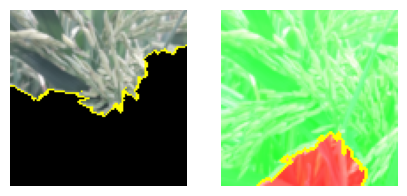

In [37]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (415).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')

UNHEALTHY

1/1 [==============================] - 0s 65ms/step
Accuracy of this prediction is 0.4627652


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 132ms/step


  1%|          | 10/1000 [00:00<00:21, 46.72it/s]

1/1 [==============================] - 0s 134ms/step


  2%|▏         | 20/1000 [00:00<00:22, 44.24it/s]

1/1 [==============================] - 0s 174ms/step


  3%|▎         | 30/1000 [00:00<00:24, 39.67it/s]

1/1 [==============================] - 0s 115ms/step


  4%|▍         | 40/1000 [00:00<00:22, 43.14it/s]

1/1 [==============================] - 0s 147ms/step


  5%|▌         | 50/1000 [00:01<00:23, 41.05it/s]

1/1 [==============================] - 0s 98ms/step


  6%|▌         | 60/1000 [00:01<00:21, 44.38it/s]

1/1 [==============================] - 0s 164ms/step


  7%|▋         | 70/1000 [00:01<00:21, 42.86it/s]

1/1 [==============================] - 0s 135ms/step


  8%|▊         | 80/1000 [00:01<00:21, 42.21it/s]

1/1 [==============================] - 0s 124ms/step


  9%|▉         | 90/1000 [00:02<00:21, 42.46it/s]

1/1 [==============================] - 0s 138ms/step


 10%|█         | 100/1000 [00:02<00:20, 44.14it/s]

1/1 [==============================] - 0s 118ms/step


 11%|█         | 110/1000 [00:02<00:19, 46.35it/s]

1/1 [==============================] - 0s 129ms/step


 12%|█▏        | 120/1000 [00:02<00:18, 46.59it/s]

1/1 [==============================] - 0s 126ms/step


 13%|█▎        | 130/1000 [00:02<00:18, 46.44it/s]

1/1 [==============================] - 0s 103ms/step


 14%|█▍        | 140/1000 [00:03<00:17, 47.91it/s]

1/1 [==============================] - 0s 152ms/step


 15%|█▌        | 150/1000 [00:03<00:18, 45.23it/s]

1/1 [==============================] - 0s 167ms/step


 16%|█▌        | 160/1000 [00:03<00:19, 43.96it/s]

1/1 [==============================] - 0s 133ms/step


 17%|█▋        | 170/1000 [00:03<00:18, 44.33it/s]

1/1 [==============================] - 0s 159ms/step


 18%|█▊        | 180/1000 [00:04<00:19, 41.53it/s]

1/1 [==============================] - 0s 173ms/step


 19%|█▉        | 190/1000 [00:04<00:19, 40.70it/s]

1/1 [==============================] - 0s 117ms/step


 20%|██        | 200/1000 [00:04<00:19, 41.81it/s]

1/1 [==============================] - 0s 118ms/step


 21%|██        | 210/1000 [00:04<00:17, 43.97it/s]

1/1 [==============================] - 0s 136ms/step


 22%|██▏       | 220/1000 [00:05<00:17, 43.68it/s]

1/1 [==============================] - 0s 93ms/step


 23%|██▎       | 230/1000 [00:05<00:16, 46.86it/s]

1/1 [==============================] - 0s 121ms/step


 24%|██▍       | 240/1000 [00:05<00:16, 45.34it/s]

1/1 [==============================] - 0s 119ms/step


 25%|██▌       | 250/1000 [00:05<00:17, 44.10it/s]

1/1 [==============================] - 0s 105ms/step


 26%|██▌       | 260/1000 [00:05<00:16, 44.91it/s]

1/1 [==============================] - 0s 120ms/step


 27%|██▋       | 270/1000 [00:06<00:15, 46.88it/s]

1/1 [==============================] - 0s 110ms/step


 28%|██▊       | 280/1000 [00:06<00:14, 48.70it/s]

1/1 [==============================] - 0s 99ms/step


 29%|██▉       | 290/1000 [00:06<00:13, 51.76it/s]

1/1 [==============================] - 0s 132ms/step


 30%|███       | 300/1000 [00:06<00:13, 50.24it/s]

1/1 [==============================] - 0s 114ms/step


 31%|███       | 310/1000 [00:06<00:13, 50.53it/s]

1/1 [==============================] - 0s 100ms/step


 32%|███▏      | 320/1000 [00:07<00:12, 53.08it/s]

1/1 [==============================] - 0s 85ms/step


 33%|███▎      | 330/1000 [00:07<00:12, 53.93it/s]

1/1 [==============================] - 0s 108ms/step


 34%|███▍      | 340/1000 [00:07<00:11, 56.86it/s]

1/1 [==============================] - 0s 112ms/step


 35%|███▌      | 350/1000 [00:07<00:11, 57.94it/s]

1/1 [==============================] - 0s 91ms/step


 36%|███▌      | 360/1000 [00:07<00:10, 58.51it/s]

1/1 [==============================] - 0s 91ms/step


 37%|███▋      | 370/1000 [00:07<00:10, 58.73it/s]

1/1 [==============================] - 0s 104ms/step


 38%|███▊      | 380/1000 [00:08<00:10, 60.09it/s]

1/1 [==============================] - 0s 103ms/step


 39%|███▉      | 390/1000 [00:08<00:10, 59.89it/s]

1/1 [==============================] - 0s 228ms/step


 40%|████      | 400/1000 [00:08<00:14, 41.91it/s]

1/1 [==============================] - 0s 238ms/step


 41%|████      | 410/1000 [00:09<00:18, 32.26it/s]

1/1 [==============================] - 0s 260ms/step


 42%|████▏     | 420/1000 [00:09<00:20, 28.41it/s]

1/1 [==============================] - 0s 249ms/step


 43%|████▎     | 430/1000 [00:09<00:21, 26.20it/s]

1/1 [==============================] - 0s 253ms/step


 44%|████▍     | 440/1000 [00:10<00:22, 24.87it/s]

1/1 [==============================] - 0s 233ms/step


 45%|████▌     | 450/1000 [00:10<00:23, 23.73it/s]

1/1 [==============================] - 0s 236ms/step


 46%|████▌     | 460/1000 [00:11<00:23, 23.23it/s]

1/1 [==============================] - 0s 228ms/step


 47%|████▋     | 470/1000 [00:11<00:22, 23.20it/s]

1/1 [==============================] - 0s 252ms/step


 48%|████▊     | 480/1000 [00:12<00:22, 22.95it/s]

1/1 [==============================] - 0s 235ms/step


 49%|████▉     | 490/1000 [00:12<00:22, 23.00it/s]

1/1 [==============================] - 0s 131ms/step


 50%|█████     | 500/1000 [00:12<00:18, 26.65it/s]

1/1 [==============================] - 0s 112ms/step


 51%|█████     | 510/1000 [00:13<00:16, 30.52it/s]

1/1 [==============================] - 0s 118ms/step


 52%|█████▏    | 520/1000 [00:13<00:14, 33.99it/s]

1/1 [==============================] - 0s 120ms/step


 53%|█████▎    | 530/1000 [00:13<00:12, 36.22it/s]

1/1 [==============================] - 0s 117ms/step


 54%|█████▍    | 540/1000 [00:13<00:11, 39.72it/s]

1/1 [==============================] - 0s 97ms/step


 55%|█████▌    | 550/1000 [00:13<00:10, 44.11it/s]

1/1 [==============================] - 0s 161ms/step


 56%|█████▌    | 560/1000 [00:14<00:10, 43.28it/s]

1/1 [==============================] - 0s 97ms/step


 57%|█████▋    | 570/1000 [00:14<00:09, 46.91it/s]

1/1 [==============================] - 0s 152ms/step


 58%|█████▊    | 580/1000 [00:14<00:09, 44.11it/s]

1/1 [==============================] - 0s 140ms/step


 59%|█████▉    | 590/1000 [00:14<00:09, 42.00it/s]

1/1 [==============================] - 0s 105ms/step


 60%|██████    | 600/1000 [00:15<00:08, 45.01it/s]

1/1 [==============================] - 0s 155ms/step


 61%|██████    | 610/1000 [00:15<00:08, 43.37it/s]

1/1 [==============================] - 0s 150ms/step


 62%|██████▏   | 620/1000 [00:15<00:09, 41.77it/s]

1/1 [==============================] - 0s 154ms/step


 63%|██████▎   | 630/1000 [00:15<00:09, 40.13it/s]

1/1 [==============================] - 0s 124ms/step


 64%|██████▍   | 640/1000 [00:16<00:08, 41.71it/s]

1/1 [==============================] - 0s 150ms/step


 65%|██████▌   | 650/1000 [00:16<00:08, 40.92it/s]

1/1 [==============================] - 0s 105ms/step


 66%|██████▌   | 660/1000 [00:16<00:07, 44.70it/s]

1/1 [==============================] - 0s 155ms/step


 67%|██████▋   | 670/1000 [00:16<00:07, 42.22it/s]

1/1 [==============================] - 0s 159ms/step


 68%|██████▊   | 680/1000 [00:16<00:07, 41.52it/s]

1/1 [==============================] - 0s 150ms/step


 69%|██████▉   | 690/1000 [00:17<00:07, 39.36it/s]

1/1 [==============================] - 0s 150ms/step


 70%|███████   | 700/1000 [00:17<00:07, 38.86it/s]

1/1 [==============================] - 0s 157ms/step


 71%|███████   | 710/1000 [00:17<00:07, 37.66it/s]

1/1 [==============================] - 0s 143ms/step


 72%|███████▏  | 720/1000 [00:18<00:07, 39.13it/s]

1/1 [==============================] - 0s 194ms/step


 73%|███████▎  | 730/1000 [00:18<00:07, 34.91it/s]

1/1 [==============================] - 0s 118ms/step


 74%|███████▍  | 740/1000 [00:18<00:06, 38.56it/s]

1/1 [==============================] - 0s 132ms/step


 75%|███████▌  | 750/1000 [00:18<00:06, 41.42it/s]

1/1 [==============================] - 0s 169ms/step


 76%|███████▌  | 760/1000 [00:19<00:05, 40.63it/s]

1/1 [==============================] - 0s 149ms/step


 77%|███████▋  | 770/1000 [00:19<00:05, 38.99it/s]

1/1 [==============================] - 0s 111ms/step


 78%|███████▊  | 780/1000 [00:19<00:05, 42.22it/s]

1/1 [==============================] - 0s 133ms/step


 79%|███████▉  | 790/1000 [00:19<00:04, 44.32it/s]

1/1 [==============================] - 0s 161ms/step


 80%|████████  | 800/1000 [00:19<00:04, 42.77it/s]

1/1 [==============================] - 0s 116ms/step


 81%|████████  | 810/1000 [00:20<00:04, 43.30it/s]

1/1 [==============================] - 0s 153ms/step


 82%|████████▏ | 820/1000 [00:20<00:04, 40.49it/s]

1/1 [==============================] - 0s 178ms/step


 83%|████████▎ | 830/1000 [00:20<00:04, 38.54it/s]

1/1 [==============================] - 0s 139ms/step


 84%|████████▍ | 840/1000 [00:20<00:03, 40.79it/s]

1/1 [==============================] - 0s 175ms/step


 85%|████████▌ | 850/1000 [00:21<00:03, 38.64it/s]

1/1 [==============================] - 0s 149ms/step


 86%|████████▌ | 860/1000 [00:21<00:03, 37.96it/s]

1/1 [==============================] - 0s 154ms/step


 87%|████████▋ | 870/1000 [00:21<00:03, 37.51it/s]

1/1 [==============================] - 0s 143ms/step


 88%|████████▊ | 880/1000 [00:22<00:03, 38.87it/s]

1/1 [==============================] - 0s 150ms/step


 89%|████████▉ | 890/1000 [00:22<00:02, 37.31it/s]

1/1 [==============================] - 0s 96ms/step


 90%|█████████ | 900/1000 [00:22<00:02, 40.39it/s]

1/1 [==============================] - 0s 167ms/step


 91%|█████████ | 910/1000 [00:22<00:02, 39.77it/s]

1/1 [==============================] - 0s 139ms/step


 92%|█████████▏| 920/1000 [00:23<00:01, 42.27it/s]

1/1 [==============================] - 0s 169ms/step


 93%|█████████▎| 930/1000 [00:23<00:01, 39.64it/s]

1/1 [==============================] - 0s 154ms/step


 94%|█████████▍| 940/1000 [00:23<00:01, 38.17it/s]

1/1 [==============================] - 0s 178ms/step


 95%|█████████▌| 950/1000 [00:23<00:01, 37.46it/s]

1/1 [==============================] - 0s 157ms/step


 96%|█████████▌| 960/1000 [00:24<00:01, 36.67it/s]

1/1 [==============================] - 0s 119ms/step


 97%|█████████▋| 970/1000 [00:24<00:00, 38.22it/s]

1/1 [==============================] - 0s 113ms/step


 98%|█████████▊| 980/1000 [00:24<00:00, 38.99it/s]

1/1 [==============================] - 0s 96ms/step


 99%|█████████▉| 990/1000 [00:24<00:00, 40.52it/s]

1/1 [==============================] - 0s 147ms/step


100%|██████████| 1000/1000 [00:25<00:00, 39.85it/s]


(-0.5, 99.5, 99.5, -0.5)

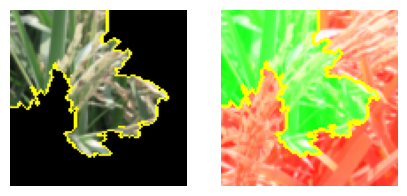

In [38]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (312).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 71ms/step
Accuracy of this prediction is 0.46277043


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 114ms/step


  1%|          | 10/1000 [00:00<00:17, 58.17it/s]

1/1 [==============================] - 0s 164ms/step


  2%|▏         | 20/1000 [00:00<00:22, 43.13it/s]

1/1 [==============================] - 0s 122ms/step


  3%|▎         | 30/1000 [00:00<00:23, 42.01it/s]

1/1 [==============================] - 0s 92ms/step


  4%|▍         | 40/1000 [00:00<00:21, 44.02it/s]

1/1 [==============================] - 0s 136ms/step


  5%|▌         | 50/1000 [00:01<00:21, 44.47it/s]

1/1 [==============================] - 0s 152ms/step


  6%|▌         | 60/1000 [00:01<00:22, 41.05it/s]

1/1 [==============================] - 0s 142ms/step


  7%|▋         | 70/1000 [00:01<00:23, 39.83it/s]

1/1 [==============================] - 0s 149ms/step


  8%|▊         | 80/1000 [00:01<00:22, 41.59it/s]

1/1 [==============================] - 0s 127ms/step


  9%|▉         | 90/1000 [00:02<00:21, 42.91it/s]

1/1 [==============================] - 0s 109ms/step


 10%|█         | 100/1000 [00:02<00:20, 44.33it/s]

1/1 [==============================] - 0s 101ms/step


 11%|█         | 110/1000 [00:02<00:19, 46.60it/s]

1/1 [==============================] - 0s 110ms/step


 12%|█▏        | 120/1000 [00:02<00:18, 48.00it/s]

1/1 [==============================] - 0s 94ms/step


 13%|█▎        | 130/1000 [00:02<00:18, 47.45it/s]

1/1 [==============================] - 0s 101ms/step


 14%|█▍        | 140/1000 [00:03<00:16, 51.24it/s]

1/1 [==============================] - 0s 120ms/step


 15%|█▌        | 150/1000 [00:03<00:17, 48.92it/s]

1/1 [==============================] - 0s 93ms/step


 16%|█▌        | 160/1000 [00:03<00:16, 49.97it/s]

1/1 [==============================] - 0s 105ms/step


 17%|█▋        | 170/1000 [00:03<00:15, 53.29it/s]

1/1 [==============================] - 0s 100ms/step


 18%|█▊        | 180/1000 [00:03<00:15, 51.35it/s]

1/1 [==============================] - 0s 100ms/step


 19%|█▉        | 190/1000 [00:04<00:15, 52.17it/s]

1/1 [==============================] - 0s 134ms/step


 20%|██        | 200/1000 [00:04<00:15, 50.39it/s]

1/1 [==============================] - 0s 124ms/step


 21%|██        | 210/1000 [00:04<00:15, 50.10it/s]

1/1 [==============================] - 0s 92ms/step


 22%|██▏       | 220/1000 [00:04<00:15, 51.25it/s]

1/1 [==============================] - 0s 117ms/step


 23%|██▎       | 230/1000 [00:04<00:15, 50.84it/s]

1/1 [==============================] - 0s 121ms/step


 24%|██▍       | 240/1000 [00:05<00:15, 50.56it/s]

1/1 [==============================] - 0s 97ms/step


 25%|██▌       | 250/1000 [00:05<00:14, 50.39it/s]

1/1 [==============================] - 0s 110ms/step


 26%|██▌       | 260/1000 [00:05<00:14, 50.75it/s]

1/1 [==============================] - 0s 140ms/step


 27%|██▋       | 270/1000 [00:05<00:15, 46.75it/s]

1/1 [==============================] - 0s 116ms/step


 28%|██▊       | 280/1000 [00:05<00:15, 45.09it/s]

1/1 [==============================] - 0s 166ms/step


 29%|██▉       | 290/1000 [00:06<00:17, 41.61it/s]

1/1 [==============================] - 0s 155ms/step


 30%|███       | 300/1000 [00:06<00:16, 42.11it/s]

1/1 [==============================] - 0s 127ms/step


 31%|███       | 310/1000 [00:06<00:16, 42.50it/s]

1/1 [==============================] - 0s 157ms/step


 32%|███▏      | 320/1000 [00:06<00:17, 39.40it/s]

1/1 [==============================] - 0s 169ms/step


 33%|███▎      | 330/1000 [00:07<00:17, 37.78it/s]

1/1 [==============================] - 0s 167ms/step


 34%|███▍      | 340/1000 [00:07<00:17, 38.22it/s]

1/1 [==============================] - 0s 162ms/step


 35%|███▌      | 350/1000 [00:07<00:17, 37.87it/s]

1/1 [==============================] - 0s 166ms/step


 36%|███▌      | 360/1000 [00:08<00:17, 37.62it/s]

1/1 [==============================] - 0s 161ms/step


 37%|███▋      | 370/1000 [00:08<00:16, 38.58it/s]

1/1 [==============================] - 0s 127ms/step


 38%|███▊      | 380/1000 [00:08<00:14, 42.11it/s]

1/1 [==============================] - 0s 159ms/step


 39%|███▉      | 390/1000 [00:08<00:15, 39.68it/s]

1/1 [==============================] - 0s 136ms/step


 40%|████      | 400/1000 [00:09<00:14, 40.59it/s]

1/1 [==============================] - 0s 173ms/step


 41%|████      | 410/1000 [00:09<00:15, 38.84it/s]

1/1 [==============================] - 0s 111ms/step


 42%|████▏     | 420/1000 [00:09<00:13, 42.76it/s]

1/1 [==============================] - 0s 120ms/step


 43%|████▎     | 430/1000 [00:09<00:14, 39.92it/s]

1/1 [==============================] - 0s 162ms/step


 44%|████▍     | 440/1000 [00:09<00:13, 40.49it/s]

1/1 [==============================] - 0s 223ms/step


 45%|████▌     | 450/1000 [00:10<00:17, 32.32it/s]

1/1 [==============================] - 0s 106ms/step


 46%|████▌     | 460/1000 [00:10<00:14, 37.18it/s]

1/1 [==============================] - 0s 117ms/step


 47%|████▋     | 470/1000 [00:10<00:13, 40.66it/s]

1/1 [==============================] - 0s 115ms/step


 48%|████▊     | 480/1000 [00:10<00:11, 45.08it/s]

1/1 [==============================] - 0s 104ms/step


 49%|████▉     | 490/1000 [00:11<00:11, 45.44it/s]

1/1 [==============================] - 0s 100ms/step


 50%|█████     | 500/1000 [00:11<00:10, 48.96it/s]

1/1 [==============================] - 0s 116ms/step


 51%|█████     | 510/1000 [00:11<00:09, 50.40it/s]

1/1 [==============================] - 0s 102ms/step


 52%|█████▏    | 520/1000 [00:11<00:09, 51.56it/s]

1/1 [==============================] - 0s 100ms/step


 53%|█████▎    | 530/1000 [00:11<00:08, 53.95it/s]

1/1 [==============================] - 0s 100ms/step


 54%|█████▍    | 540/1000 [00:12<00:08, 54.17it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████▌    | 550/1000 [00:12<00:08, 55.88it/s]

1/1 [==============================] - 0s 100ms/step


 56%|█████▌    | 560/1000 [00:12<00:07, 58.61it/s]

1/1 [==============================] - 0s 100ms/step


 57%|█████▋    | 570/1000 [00:12<00:07, 59.02it/s]

1/1 [==============================] - 0s 221ms/step


 58%|█████▊    | 580/1000 [00:12<00:08, 46.79it/s]

1/1 [==============================] - 0s 242ms/step


 59%|█████▉    | 590/1000 [00:13<00:11, 35.27it/s]

1/1 [==============================] - 0s 243ms/step


 60%|██████    | 600/1000 [00:13<00:12, 30.78it/s]

1/1 [==============================] - 0s 236ms/step


 61%|██████    | 610/1000 [00:14<00:14, 27.56it/s]

1/1 [==============================] - 0s 223ms/step


 62%|██████▏   | 620/1000 [00:14<00:14, 26.43it/s]

1/1 [==============================] - 0s 217ms/step


 63%|██████▎   | 630/1000 [00:15<00:14, 25.31it/s]

1/1 [==============================] - 0s 255ms/step


 64%|██████▍   | 640/1000 [00:15<00:14, 24.12it/s]

1/1 [==============================] - 0s 234ms/step


 65%|██████▌   | 650/1000 [00:15<00:14, 23.90it/s]

1/1 [==============================] - 0s 253ms/step


 66%|██████▌   | 660/1000 [00:16<00:14, 23.46it/s]

1/1 [==============================] - 0s 235ms/step


 67%|██████▋   | 670/1000 [00:16<00:13, 23.72it/s]

1/1 [==============================] - 0s 240ms/step


 68%|██████▊   | 680/1000 [00:17<00:13, 23.58it/s]

1/1 [==============================] - 0s 221ms/step


 69%|██████▉   | 690/1000 [00:17<00:13, 23.79it/s]

1/1 [==============================] - 0s 215ms/step


 70%|███████   | 700/1000 [00:18<00:12, 24.08it/s]

1/1 [==============================] - 0s 243ms/step


 71%|███████   | 710/1000 [00:18<00:12, 23.43it/s]

1/1 [==============================] - 0s 254ms/step


 72%|███████▏  | 720/1000 [00:18<00:12, 23.09it/s]

1/1 [==============================] - 0s 252ms/step


 73%|███████▎  | 730/1000 [00:19<00:12, 22.19it/s]

1/1 [==============================] - 0s 247ms/step


 74%|███████▍  | 740/1000 [00:19<00:11, 21.99it/s]

1/1 [==============================] - 0s 240ms/step


 75%|███████▌  | 750/1000 [00:20<00:11, 22.02it/s]

1/1 [==============================] - 0s 220ms/step


 76%|███████▌  | 760/1000 [00:20<00:10, 22.22it/s]

1/1 [==============================] - 0s 236ms/step


 77%|███████▋  | 770/1000 [00:21<00:10, 22.32it/s]

1/1 [==============================] - 0s 220ms/step


 78%|███████▊  | 780/1000 [00:21<00:09, 22.51it/s]

1/1 [==============================] - 0s 231ms/step


 79%|███████▉  | 790/1000 [00:22<00:09, 22.50it/s]

1/1 [==============================] - 0s 107ms/step


 80%|████████  | 800/1000 [00:22<00:07, 25.72it/s]

1/1 [==============================] - 0s 113ms/step


 81%|████████  | 810/1000 [00:22<00:06, 30.49it/s]

1/1 [==============================] - 0s 104ms/step


 82%|████████▏ | 820/1000 [00:22<00:05, 34.53it/s]

1/1 [==============================] - 0s 92ms/step


 83%|████████▎ | 830/1000 [00:22<00:04, 40.32it/s]

1/1 [==============================] - 0s 112ms/step


 84%|████████▍ | 840/1000 [00:23<00:03, 43.30it/s]

1/1 [==============================] - 0s 129ms/step


 85%|████████▌ | 850/1000 [00:23<00:03, 46.22it/s]

1/1 [==============================] - 0s 145ms/step


 86%|████████▌ | 860/1000 [00:23<00:02, 47.21it/s]

1/1 [==============================] - 0s 132ms/step


 87%|████████▋ | 870/1000 [00:23<00:02, 48.19it/s]

1/1 [==============================] - 0s 160ms/step


 88%|████████▊ | 880/1000 [00:23<00:02, 43.37it/s]

1/1 [==============================] - 0s 126ms/step


 89%|████████▉ | 890/1000 [00:24<00:02, 42.29it/s]

1/1 [==============================] - 0s 104ms/step


 90%|█████████ | 900/1000 [00:24<00:02, 45.45it/s]

1/1 [==============================] - 0s 123ms/step


 91%|█████████ | 910/1000 [00:24<00:02, 44.61it/s]

1/1 [==============================] - 0s 140ms/step


 92%|█████████▏| 920/1000 [00:24<00:01, 43.02it/s]

1/1 [==============================] - 0s 133ms/step


 93%|█████████▎| 930/1000 [00:25<00:01, 42.62it/s]

1/1 [==============================] - 0s 107ms/step


 94%|█████████▍| 940/1000 [00:25<00:01, 43.98it/s]

1/1 [==============================] - 0s 90ms/step


 95%|█████████▌| 950/1000 [00:25<00:01, 47.99it/s]

1/1 [==============================] - 0s 117ms/step


 96%|█████████▌| 960/1000 [00:25<00:00, 49.60it/s]

1/1 [==============================] - 0s 100ms/step


 97%|█████████▋| 970/1000 [00:25<00:00, 49.01it/s]

1/1 [==============================] - 0s 81ms/step


 98%|█████████▊| 980/1000 [00:26<00:00, 50.78it/s]

1/1 [==============================] - 0s 93ms/step


 99%|█████████▉| 990/1000 [00:26<00:00, 53.61it/s]

1/1 [==============================] - 0s 130ms/step


100%|██████████| 1000/1000 [00:26<00:00, 37.83it/s]


(-0.5, 99.5, 99.5, -0.5)

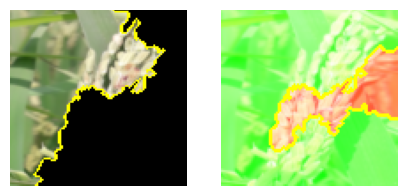

In [39]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (270).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 70ms/step
Accuracy of this prediction is 0.46277624


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 118ms/step


  1%|          | 10/1000 [00:00<00:23, 41.99it/s]

1/1 [==============================] - 0s 151ms/step


  2%|▏         | 20/1000 [00:00<00:24, 40.34it/s]

1/1 [==============================] - 0s 153ms/step


  3%|▎         | 30/1000 [00:00<00:25, 37.77it/s]

1/1 [==============================] - 0s 125ms/step


  4%|▍         | 40/1000 [00:01<00:24, 39.62it/s]

1/1 [==============================] - 0s 135ms/step


  5%|▌         | 50/1000 [00:01<00:24, 38.12it/s]

1/1 [==============================] - 0s 97ms/step


  6%|▌         | 60/1000 [00:01<00:22, 41.54it/s]

1/1 [==============================] - 0s 134ms/step


  7%|▋         | 70/1000 [00:01<00:21, 42.98it/s]

1/1 [==============================] - 0s 120ms/step


  8%|▊         | 80/1000 [00:01<00:21, 43.66it/s]

1/1 [==============================] - 0s 136ms/step


  9%|▉         | 90/1000 [00:02<00:21, 42.11it/s]

1/1 [==============================] - 0s 132ms/step


 10%|█         | 100/1000 [00:02<00:20, 43.87it/s]

1/1 [==============================] - 0s 123ms/step


 11%|█         | 110/1000 [00:02<00:20, 42.57it/s]

1/1 [==============================] - 0s 167ms/step


 12%|█▏        | 120/1000 [00:02<00:21, 40.25it/s]

1/1 [==============================] - 0s 148ms/step


 13%|█▎        | 130/1000 [00:03<00:22, 38.96it/s]

1/1 [==============================] - 0s 144ms/step


 14%|█▍        | 140/1000 [00:03<00:20, 41.20it/s]

1/1 [==============================] - 0s 150ms/step


 15%|█▌        | 150/1000 [00:03<00:22, 38.45it/s]

1/1 [==============================] - 0s 135ms/step


 16%|█▌        | 160/1000 [00:03<00:21, 38.73it/s]

1/1 [==============================] - 0s 119ms/step


 17%|█▋        | 170/1000 [00:04<00:20, 40.99it/s]

1/1 [==============================] - 0s 95ms/step


 18%|█▊        | 180/1000 [00:04<00:18, 44.86it/s]

1/1 [==============================] - 0s 124ms/step


 19%|█▉        | 190/1000 [00:04<00:17, 45.31it/s]

1/1 [==============================] - 0s 135ms/step


 20%|██        | 200/1000 [00:04<00:17, 44.47it/s]

1/1 [==============================] - 0s 137ms/step


 21%|██        | 210/1000 [00:05<00:18, 42.98it/s]

1/1 [==============================] - 0s 152ms/step


 22%|██▏       | 220/1000 [00:05<00:19, 40.65it/s]

1/1 [==============================] - 0s 147ms/step


 23%|██▎       | 230/1000 [00:05<00:19, 39.73it/s]

1/1 [==============================] - 0s 148ms/step


 24%|██▍       | 240/1000 [00:05<00:19, 38.92it/s]

1/1 [==============================] - 0s 143ms/step


 25%|██▌       | 250/1000 [00:06<00:19, 38.68it/s]

1/1 [==============================] - 0s 115ms/step


 26%|██▌       | 260/1000 [00:06<00:17, 41.67it/s]

1/1 [==============================] - 0s 152ms/step


 27%|██▋       | 270/1000 [00:06<00:18, 39.77it/s]

1/1 [==============================] - 0s 122ms/step


 28%|██▊       | 280/1000 [00:06<00:17, 40.22it/s]

1/1 [==============================] - 0s 84ms/step


 29%|██▉       | 290/1000 [00:07<00:15, 44.58it/s]

1/1 [==============================] - 0s 168ms/step


 30%|███       | 300/1000 [00:07<00:16, 41.36it/s]

1/1 [==============================] - 0s 101ms/step


 31%|███       | 310/1000 [00:07<00:16, 41.80it/s]

1/1 [==============================] - 0s 133ms/step


 32%|███▏      | 320/1000 [00:07<00:15, 42.60it/s]

1/1 [==============================] - 0s 118ms/step


 33%|███▎      | 330/1000 [00:07<00:15, 43.97it/s]

1/1 [==============================] - 0s 109ms/step


 34%|███▍      | 340/1000 [00:08<00:14, 47.07it/s]

1/1 [==============================] - 0s 101ms/step


 35%|███▌      | 350/1000 [00:08<00:13, 49.95it/s]

1/1 [==============================] - 0s 117ms/step


 36%|███▌      | 360/1000 [00:08<00:12, 51.30it/s]

1/1 [==============================] - 0s 124ms/step


 37%|███▋      | 370/1000 [00:08<00:13, 47.20it/s]

1/1 [==============================] - 0s 117ms/step


 38%|███▊      | 380/1000 [00:08<00:12, 49.26it/s]

1/1 [==============================] - 0s 111ms/step


 39%|███▉      | 390/1000 [00:09<00:12, 48.29it/s]

1/1 [==============================] - 0s 120ms/step


 40%|████      | 400/1000 [00:09<00:12, 47.66it/s]

1/1 [==============================] - 0s 110ms/step


 41%|████      | 410/1000 [00:09<00:12, 47.18it/s]

1/1 [==============================] - 0s 83ms/step


 42%|████▏     | 420/1000 [00:09<00:11, 50.46it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████▎     | 430/1000 [00:09<00:10, 54.41it/s]

1/1 [==============================] - 0s 108ms/step


 44%|████▍     | 440/1000 [00:10<00:10, 55.94it/s]

1/1 [==============================] - 0s 100ms/step


 45%|████▌     | 450/1000 [00:10<00:10, 54.04it/s]

1/1 [==============================] - 0s 92ms/step


 46%|████▌     | 460/1000 [00:10<00:10, 53.49it/s]

1/1 [==============================] - 0s 109ms/step


 47%|████▋     | 470/1000 [00:10<00:10, 51.69it/s]

1/1 [==============================] - 0s 143ms/step


 48%|████▊     | 480/1000 [00:10<00:10, 48.66it/s]

1/1 [==============================] - 0s 100ms/step


 49%|████▉     | 490/1000 [00:11<00:10, 49.07it/s]

1/1 [==============================] - 0s 134ms/step


 50%|█████     | 500/1000 [00:11<00:10, 45.97it/s]

1/1 [==============================] - 0s 100ms/step


 51%|█████     | 510/1000 [00:11<00:10, 48.23it/s]

1/1 [==============================] - 0s 100ms/step


 52%|█████▏    | 520/1000 [00:11<00:09, 49.41it/s]

1/1 [==============================] - 0s 100ms/step


 53%|█████▎    | 530/1000 [00:11<00:09, 51.49it/s]

1/1 [==============================] - 0s 99ms/step


 54%|█████▍    | 540/1000 [00:12<00:08, 53.74it/s]

1/1 [==============================] - 0s 134ms/step


 55%|█████▌    | 550/1000 [00:12<00:09, 48.70it/s]

1/1 [==============================] - 0s 100ms/step


 56%|█████▌    | 560/1000 [00:12<00:09, 47.97it/s]

1/1 [==============================] - 0s 100ms/step


 57%|█████▋    | 570/1000 [00:12<00:08, 48.50it/s]

1/1 [==============================] - 0s 96ms/step


 58%|█████▊    | 580/1000 [00:12<00:08, 50.19it/s]

1/1 [==============================] - 0s 117ms/step


 59%|█████▉    | 590/1000 [00:13<00:08, 50.12it/s]

1/1 [==============================] - 0s 116ms/step


 60%|██████    | 600/1000 [00:13<00:08, 47.75it/s]

1/1 [==============================] - 0s 100ms/step


 61%|██████    | 610/1000 [00:13<00:07, 49.57it/s]

1/1 [==============================] - 0s 116ms/step


 62%|██████▏   | 620/1000 [00:13<00:07, 47.95it/s]

1/1 [==============================] - 0s 100ms/step


 63%|██████▎   | 630/1000 [00:13<00:07, 49.13it/s]

1/1 [==============================] - 0s 102ms/step


 64%|██████▍   | 640/1000 [00:14<00:07, 48.90it/s]

1/1 [==============================] - 0s 109ms/step


 65%|██████▌   | 650/1000 [00:14<00:07, 47.35it/s]

1/1 [==============================] - 0s 91ms/step


 66%|██████▌   | 660/1000 [00:14<00:06, 49.30it/s]

1/1 [==============================] - 0s 100ms/step


 67%|██████▋   | 670/1000 [00:14<00:06, 52.10it/s]

1/1 [==============================] - 0s 132ms/step


 68%|██████▊   | 680/1000 [00:14<00:06, 48.90it/s]

1/1 [==============================] - 0s 106ms/step


 69%|██████▉   | 690/1000 [00:15<00:06, 50.99it/s]

1/1 [==============================] - 0s 134ms/step


 70%|███████   | 700/1000 [00:15<00:06, 48.96it/s]

1/1 [==============================] - 0s 100ms/step


 71%|███████   | 710/1000 [00:15<00:05, 50.57it/s]

1/1 [==============================] - 0s 100ms/step


 72%|███████▏  | 720/1000 [00:15<00:05, 53.05it/s]

1/1 [==============================] - 0s 100ms/step


 73%|███████▎  | 730/1000 [00:15<00:05, 53.45it/s]

1/1 [==============================] - 0s 83ms/step


 74%|███████▍  | 740/1000 [00:16<00:04, 53.82it/s]

1/1 [==============================] - 0s 117ms/step


 75%|███████▌  | 750/1000 [00:16<00:04, 51.27it/s]

1/1 [==============================] - 0s 83ms/step


 76%|███████▌  | 760/1000 [00:16<00:04, 52.20it/s]

1/1 [==============================] - 0s 91ms/step


 77%|███████▋  | 770/1000 [00:16<00:04, 52.95it/s]

1/1 [==============================] - 0s 108ms/step


 78%|███████▊  | 780/1000 [00:16<00:04, 51.95it/s]

1/1 [==============================] - 0s 82ms/step


 79%|███████▉  | 790/1000 [00:17<00:03, 54.04it/s]

1/1 [==============================] - 0s 107ms/step


 80%|████████  | 800/1000 [00:17<00:03, 52.94it/s]

1/1 [==============================] - 0s 118ms/step


 81%|████████  | 810/1000 [00:17<00:03, 50.67it/s]

1/1 [==============================] - 0s 100ms/step


 82%|████████▏ | 820/1000 [00:17<00:03, 49.19it/s]

1/1 [==============================] - 0s 100ms/step


 83%|████████▎ | 830/1000 [00:17<00:03, 50.11it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████▍ | 840/1000 [00:18<00:03, 49.47it/s]

1/1 [==============================] - 0s 116ms/step


 85%|████████▌ | 850/1000 [00:18<00:02, 51.84it/s]

1/1 [==============================] - 0s 83ms/step


 86%|████████▌ | 860/1000 [00:18<00:02, 54.40it/s]

1/1 [==============================] - 0s 93ms/step


 87%|████████▋ | 870/1000 [00:18<00:02, 55.84it/s]

1/1 [==============================] - 0s 85ms/step


 88%|████████▊ | 880/1000 [00:18<00:02, 58.85it/s]

1/1 [==============================] - 0s 218ms/step


 89%|████████▉ | 890/1000 [00:19<00:02, 44.02it/s]

1/1 [==============================] - 0s 104ms/step


 90%|█████████ | 900/1000 [00:19<00:02, 47.38it/s]

1/1 [==============================] - 0s 80ms/step


 91%|█████████ | 910/1000 [00:19<00:01, 50.64it/s]

1/1 [==============================] - 0s 83ms/step


 92%|█████████▏| 920/1000 [00:19<00:01, 53.13it/s]

1/1 [==============================] - 0s 91ms/step


 93%|█████████▎| 930/1000 [00:19<00:01, 53.56it/s]

1/1 [==============================] - 0s 108ms/step


 94%|█████████▍| 940/1000 [00:19<00:01, 52.33it/s]

1/1 [==============================] - 0s 87ms/step


 95%|█████████▌| 950/1000 [00:20<00:00, 53.70it/s]

1/1 [==============================] - 0s 134ms/step


 96%|█████████▌| 960/1000 [00:20<00:00, 50.58it/s]

1/1 [==============================] - 0s 134ms/step


 97%|█████████▋| 970/1000 [00:20<00:00, 45.81it/s]

1/1 [==============================] - 0s 136ms/step


 98%|█████████▊| 980/1000 [00:20<00:00, 44.90it/s]

1/1 [==============================] - 0s 116ms/step


 99%|█████████▉| 990/1000 [00:21<00:00, 44.33it/s]

1/1 [==============================] - 0s 150ms/step


100%|██████████| 1000/1000 [00:21<00:00, 46.85it/s]


(-0.5, 99.5, 99.5, -0.5)

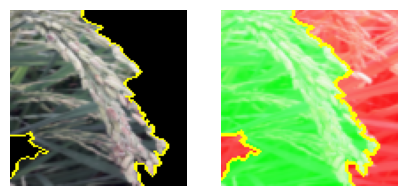

In [40]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (284).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 78ms/step
Accuracy of this prediction is 0.46277928


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 100ms/step


  1%|          | 10/1000 [00:00<00:18, 54.63it/s]

1/1 [==============================] - 0s 84ms/step


  2%|▏         | 20/1000 [00:00<00:16, 60.94it/s]

1/1 [==============================] - 0s 100ms/step


  3%|▎         | 30/1000 [00:00<00:17, 55.41it/s]

1/1 [==============================] - 0s 101ms/step


  4%|▍         | 40/1000 [00:00<00:17, 55.00it/s]

1/1 [==============================] - 0s 84ms/step


  5%|▌         | 50/1000 [00:00<00:17, 54.92it/s]

1/1 [==============================] - 0s 100ms/step


  6%|▌         | 60/1000 [00:01<00:16, 56.56it/s]

1/1 [==============================] - 0s 100ms/step


  7%|▋         | 70/1000 [00:01<00:17, 54.20it/s]

1/1 [==============================] - 0s 121ms/step


  8%|▊         | 80/1000 [00:01<00:17, 51.99it/s]

1/1 [==============================] - 0s 117ms/step


  9%|▉         | 90/1000 [00:01<00:17, 52.12it/s]

1/1 [==============================] - 0s 150ms/step


 10%|█         | 100/1000 [00:01<00:18, 47.66it/s]

1/1 [==============================] - 0s 100ms/step


 11%|█         | 110/1000 [00:02<00:17, 49.58it/s]

1/1 [==============================] - 0s 170ms/step


 12%|█▏        | 120/1000 [00:02<00:20, 43.96it/s]

1/1 [==============================] - 0s 103ms/step


 13%|█▎        | 130/1000 [00:02<00:18, 47.12it/s]

1/1 [==============================] - 0s 120ms/step


 14%|█▍        | 140/1000 [00:02<00:19, 44.55it/s]

1/1 [==============================] - 0s 133ms/step


 15%|█▌        | 150/1000 [00:03<00:19, 43.96it/s]

1/1 [==============================] - 0s 134ms/step


 16%|█▌        | 160/1000 [00:03<00:19, 42.55it/s]

1/1 [==============================] - 0s 163ms/step


 17%|█▋        | 170/1000 [00:03<00:20, 40.18it/s]

1/1 [==============================] - 0s 183ms/step


 18%|█▊        | 180/1000 [00:03<00:21, 38.50it/s]

1/1 [==============================] - 0s 121ms/step


 19%|█▉        | 190/1000 [00:04<00:19, 40.60it/s]

1/1 [==============================] - 0s 172ms/step


 20%|██        | 200/1000 [00:04<00:20, 39.29it/s]

1/1 [==============================] - 0s 110ms/step


 21%|██        | 210/1000 [00:04<00:18, 41.74it/s]

1/1 [==============================] - 0s 164ms/step


 22%|██▏       | 220/1000 [00:04<00:19, 39.76it/s]

1/1 [==============================] - 0s 169ms/step


 23%|██▎       | 230/1000 [00:05<00:20, 37.94it/s]

1/1 [==============================] - 0s 171ms/step


 24%|██▍       | 240/1000 [00:05<00:20, 36.78it/s]

1/1 [==============================] - 0s 95ms/step


 25%|██▌       | 250/1000 [00:05<00:18, 41.50it/s]

1/1 [==============================] - 0s 157ms/step


 26%|██▌       | 260/1000 [00:05<00:18, 40.55it/s]

1/1 [==============================] - 0s 142ms/step


 27%|██▋       | 270/1000 [00:06<00:18, 40.36it/s]

1/1 [==============================] - 0s 103ms/step


 28%|██▊       | 280/1000 [00:06<00:16, 43.42it/s]

1/1 [==============================] - 0s 131ms/step


 29%|██▉       | 290/1000 [00:06<00:16, 42.30it/s]

1/1 [==============================] - 0s 150ms/step


 30%|███       | 300/1000 [00:06<00:17, 39.51it/s]

1/1 [==============================] - 0s 139ms/step


 31%|███       | 310/1000 [00:07<00:17, 39.86it/s]

1/1 [==============================] - 0s 164ms/step


 32%|███▏      | 320/1000 [00:07<00:17, 38.10it/s]

1/1 [==============================] - 0s 156ms/step


 33%|███▎      | 330/1000 [00:07<00:17, 38.67it/s]

1/1 [==============================] - 0s 116ms/step


 34%|███▍      | 340/1000 [00:07<00:16, 40.72it/s]

1/1 [==============================] - 0s 166ms/step


 35%|███▌      | 350/1000 [00:08<00:16, 38.81it/s]

1/1 [==============================] - 0s 156ms/step


 36%|███▌      | 360/1000 [00:08<00:16, 38.69it/s]

1/1 [==============================] - 0s 113ms/step


 37%|███▋      | 370/1000 [00:08<00:14, 42.22it/s]

1/1 [==============================] - 0s 149ms/step


 38%|███▊      | 380/1000 [00:08<00:15, 38.90it/s]

1/1 [==============================] - 0s 156ms/step


 39%|███▉      | 390/1000 [00:09<00:16, 37.58it/s]

1/1 [==============================] - 0s 108ms/step


 40%|████      | 400/1000 [00:09<00:14, 41.68it/s]

1/1 [==============================] - 0s 109ms/step


 41%|████      | 410/1000 [00:09<00:13, 43.08it/s]

1/1 [==============================] - 0s 109ms/step


 42%|████▏     | 420/1000 [00:09<00:12, 46.22it/s]

1/1 [==============================] - 0s 150ms/step


 43%|████▎     | 430/1000 [00:09<00:12, 45.93it/s]

1/1 [==============================] - 0s 134ms/step


 44%|████▍     | 440/1000 [00:10<00:12, 46.35it/s]

1/1 [==============================] - 0s 120ms/step


 45%|████▌     | 450/1000 [00:10<00:11, 48.24it/s]

1/1 [==============================] - 0s 111ms/step


 46%|████▌     | 460/1000 [00:10<00:11, 48.50it/s]

1/1 [==============================] - 0s 170ms/step


 47%|████▋     | 470/1000 [00:10<00:11, 45.55it/s]

1/1 [==============================] - 0s 169ms/step


 48%|████▊     | 480/1000 [00:11<00:12, 41.49it/s]

1/1 [==============================] - 0s 124ms/step


 49%|████▉     | 490/1000 [00:11<00:12, 41.74it/s]

1/1 [==============================] - 0s 133ms/step


 50%|█████     | 500/1000 [00:11<00:12, 41.30it/s]

1/1 [==============================] - 0s 138ms/step


 51%|█████     | 510/1000 [00:11<00:11, 42.25it/s]

1/1 [==============================] - 0s 136ms/step


 52%|█████▏    | 520/1000 [00:12<00:11, 43.27it/s]

1/1 [==============================] - 0s 117ms/step


 53%|█████▎    | 530/1000 [00:12<00:10, 45.06it/s]

1/1 [==============================] - 0s 150ms/step


 54%|█████▍    | 540/1000 [00:12<00:11, 40.92it/s]

1/1 [==============================] - 0s 153ms/step


 55%|█████▌    | 550/1000 [00:12<00:11, 40.86it/s]

1/1 [==============================] - 0s 148ms/step


 56%|█████▌    | 560/1000 [00:13<00:10, 40.54it/s]

1/1 [==============================] - 0s 139ms/step


 57%|█████▋    | 570/1000 [00:13<00:11, 38.91it/s]

1/1 [==============================] - 0s 103ms/step


 58%|█████▊    | 580/1000 [00:13<00:10, 40.11it/s]

1/1 [==============================] - 0s 153ms/step


 59%|█████▉    | 590/1000 [00:13<00:10, 39.91it/s]

1/1 [==============================] - 0s 166ms/step


 60%|██████    | 600/1000 [00:14<00:10, 39.96it/s]

1/1 [==============================] - 0s 167ms/step


 61%|██████    | 610/1000 [00:14<00:09, 39.91it/s]

1/1 [==============================] - 0s 134ms/step


 62%|██████▏   | 620/1000 [00:14<00:09, 41.31it/s]

1/1 [==============================] - 0s 134ms/step


 63%|██████▎   | 630/1000 [00:14<00:08, 43.91it/s]

1/1 [==============================] - 0s 165ms/step


 64%|██████▍   | 640/1000 [00:14<00:08, 40.30it/s]

1/1 [==============================] - 0s 169ms/step


 65%|██████▌   | 650/1000 [00:15<00:08, 39.29it/s]

1/1 [==============================] - 0s 144ms/step


 66%|██████▌   | 660/1000 [00:15<00:09, 37.76it/s]

1/1 [==============================] - 0s 132ms/step


 67%|██████▋   | 670/1000 [00:15<00:08, 37.90it/s]

1/1 [==============================] - 0s 122ms/step


 68%|██████▊   | 680/1000 [00:16<00:08, 39.93it/s]

1/1 [==============================] - 0s 133ms/step


 69%|██████▉   | 690/1000 [00:16<00:07, 41.75it/s]

1/1 [==============================] - 0s 131ms/step


 70%|███████   | 700/1000 [00:16<00:07, 40.74it/s]

1/1 [==============================] - 0s 119ms/step


 71%|███████   | 710/1000 [00:16<00:06, 42.89it/s]

1/1 [==============================] - 0s 119ms/step


 72%|███████▏  | 720/1000 [00:16<00:06, 43.12it/s]

1/1 [==============================] - 0s 152ms/step


 73%|███████▎  | 730/1000 [00:17<00:06, 41.04it/s]

1/1 [==============================] - 0s 163ms/step


 74%|███████▍  | 740/1000 [00:17<00:06, 39.72it/s]

1/1 [==============================] - 0s 117ms/step


 75%|███████▌  | 750/1000 [00:17<00:05, 42.93it/s]

1/1 [==============================] - 0s 121ms/step


 76%|███████▌  | 760/1000 [00:17<00:05, 44.31it/s]

1/1 [==============================] - 0s 99ms/step


 77%|███████▋  | 770/1000 [00:18<00:04, 48.48it/s]

1/1 [==============================] - 0s 263ms/step


 78%|███████▊  | 780/1000 [00:18<00:06, 36.66it/s]

1/1 [==============================] - 0s 120ms/step


 79%|███████▉  | 790/1000 [00:18<00:05, 40.65it/s]

1/1 [==============================] - 0s 125ms/step


 80%|████████  | 800/1000 [00:18<00:04, 43.91it/s]

1/1 [==============================] - 0s 124ms/step


 81%|████████  | 810/1000 [00:19<00:04, 43.62it/s]

1/1 [==============================] - 0s 88ms/step


 82%|████████▏ | 820/1000 [00:19<00:03, 45.43it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████▎ | 830/1000 [00:19<00:03, 47.74it/s]

1/1 [==============================] - 0s 101ms/step


 84%|████████▍ | 840/1000 [00:19<00:03, 48.29it/s]

1/1 [==============================] - 0s 100ms/step


 85%|████████▌ | 850/1000 [00:19<00:03, 48.74it/s]

1/1 [==============================] - 0s 132ms/step


 86%|████████▌ | 860/1000 [00:20<00:03, 46.01it/s]

1/1 [==============================] - 0s 132ms/step


 87%|████████▋ | 870/1000 [00:20<00:02, 44.02it/s]

1/1 [==============================] - 0s 121ms/step


 88%|████████▊ | 880/1000 [00:20<00:02, 45.60it/s]

1/1 [==============================] - 0s 133ms/step


 89%|████████▉ | 890/1000 [00:20<00:02, 44.91it/s]

1/1 [==============================] - 0s 141ms/step


 90%|█████████ | 900/1000 [00:21<00:02, 44.44it/s]

1/1 [==============================] - 0s 205ms/step


 91%|█████████ | 910/1000 [00:21<00:02, 35.73it/s]

1/1 [==============================] - 0s 174ms/step


 92%|█████████▏| 920/1000 [00:21<00:02, 37.10it/s]

1/1 [==============================] - 0s 88ms/step


 93%|█████████▎| 930/1000 [00:21<00:01, 40.76it/s]

1/1 [==============================] - 0s 106ms/step


 94%|█████████▍| 940/1000 [00:22<00:01, 44.20it/s]

1/1 [==============================] - 0s 127ms/step


 95%|█████████▌| 950/1000 [00:22<00:01, 45.78it/s]

1/1 [==============================] - 0s 106ms/step


 96%|█████████▌| 960/1000 [00:22<00:00, 47.80it/s]

1/1 [==============================] - 0s 100ms/step


 97%|█████████▋| 970/1000 [00:22<00:00, 49.51it/s]

1/1 [==============================] - 0s 97ms/step


 98%|█████████▊| 980/1000 [00:22<00:00, 53.91it/s]

1/1 [==============================] - 0s 95ms/step


 99%|█████████▉| 990/1000 [00:22<00:00, 55.43it/s]

1/1 [==============================] - 0s 100ms/step


100%|██████████| 1000/1000 [00:23<00:00, 43.32it/s]


(-0.5, 99.5, 99.5, -0.5)

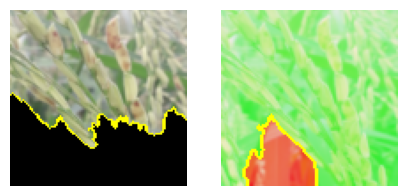

In [41]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (297).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 100ms/step
Accuracy of this prediction is 0.4627677


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 119ms/step


  1%|          | 10/1000 [00:00<00:21, 46.37it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▏         | 20/1000 [00:00<00:18, 53.30it/s]

1/1 [==============================] - 0s 146ms/step


  3%|▎         | 30/1000 [00:00<00:20, 47.16it/s]

1/1 [==============================] - 0s 90ms/step


  4%|▍         | 40/1000 [00:00<00:18, 53.09it/s]

1/1 [==============================] - 0s 148ms/step


  5%|▌         | 50/1000 [00:01<00:19, 48.27it/s]

1/1 [==============================] - 0s 160ms/step


  6%|▌         | 60/1000 [00:01<00:21, 44.42it/s]

1/1 [==============================] - 0s 150ms/step


  7%|▋         | 70/1000 [00:01<00:22, 41.93it/s]

1/1 [==============================] - 0s 124ms/step


  8%|▊         | 80/1000 [00:01<00:21, 42.16it/s]

1/1 [==============================] - 0s 100ms/step


  9%|▉         | 90/1000 [00:01<00:20, 44.29it/s]

1/1 [==============================] - 0s 120ms/step


 10%|█         | 100/1000 [00:02<00:19, 45.31it/s]

1/1 [==============================] - 0s 110ms/step


 11%|█         | 110/1000 [00:02<00:19, 46.65it/s]

1/1 [==============================] - 0s 165ms/step


 12%|█▏        | 120/1000 [00:02<00:20, 42.68it/s]

1/1 [==============================] - 0s 100ms/step


 13%|█▎        | 130/1000 [00:02<00:19, 44.51it/s]

1/1 [==============================] - 0s 136ms/step


 14%|█▍        | 140/1000 [00:03<00:20, 42.39it/s]

1/1 [==============================] - 0s 124ms/step


 15%|█▌        | 150/1000 [00:03<00:21, 39.99it/s]

1/1 [==============================] - 0s 150ms/step


 16%|█▌        | 160/1000 [00:03<00:20, 41.67it/s]

1/1 [==============================] - 0s 136ms/step


 17%|█▋        | 170/1000 [00:03<00:20, 40.89it/s]

1/1 [==============================] - 0s 135ms/step


 18%|█▊        | 180/1000 [00:04<00:20, 39.52it/s]

1/1 [==============================] - 0s 117ms/step


 19%|█▉        | 190/1000 [00:04<00:19, 41.69it/s]

1/1 [==============================] - 0s 102ms/step


 20%|██        | 200/1000 [00:04<00:17, 46.04it/s]

1/1 [==============================] - 0s 144ms/step


 21%|██        | 210/1000 [00:04<00:17, 44.16it/s]

1/1 [==============================] - 0s 159ms/step


 22%|██▏       | 220/1000 [00:05<00:18, 42.57it/s]

1/1 [==============================] - 0s 130ms/step


 23%|██▎       | 230/1000 [00:05<00:17, 44.77it/s]

1/1 [==============================] - 0s 126ms/step


 24%|██▍       | 240/1000 [00:05<00:17, 42.84it/s]

1/1 [==============================] - 0s 133ms/step


 25%|██▌       | 250/1000 [00:05<00:17, 42.06it/s]

1/1 [==============================] - 0s 145ms/step


 26%|██▌       | 260/1000 [00:05<00:17, 41.30it/s]

1/1 [==============================] - 0s 113ms/step


 27%|██▋       | 270/1000 [00:06<00:16, 44.02it/s]

1/1 [==============================] - 0s 174ms/step


 28%|██▊       | 280/1000 [00:06<00:17, 40.99it/s]

1/1 [==============================] - 0s 151ms/step


 29%|██▉       | 290/1000 [00:06<00:17, 40.69it/s]

1/1 [==============================] - 0s 133ms/step


 30%|███       | 300/1000 [00:06<00:17, 40.21it/s]

1/1 [==============================] - 0s 172ms/step


 31%|███       | 310/1000 [00:07<00:17, 38.89it/s]

1/1 [==============================] - 0s 116ms/step


 32%|███▏      | 320/1000 [00:07<00:16, 41.23it/s]

1/1 [==============================] - 0s 109ms/step


 33%|███▎      | 330/1000 [00:07<00:15, 43.03it/s]

1/1 [==============================] - 0s 117ms/step


 34%|███▍      | 340/1000 [00:07<00:15, 42.89it/s]

1/1 [==============================] - 0s 202ms/step


 35%|███▌      | 350/1000 [00:08<00:17, 36.59it/s]

1/1 [==============================] - 0s 110ms/step


 36%|███▌      | 360/1000 [00:08<00:15, 40.63it/s]

1/1 [==============================] - 0s 139ms/step


 37%|███▋      | 370/1000 [00:08<00:14, 42.20it/s]

1/1 [==============================] - 0s 100ms/step


 38%|███▊      | 380/1000 [00:08<00:13, 44.81it/s]

1/1 [==============================] - 0s 138ms/step


 39%|███▉      | 390/1000 [00:09<00:14, 42.91it/s]

1/1 [==============================] - 0s 156ms/step


 40%|████      | 400/1000 [00:09<00:14, 40.97it/s]

1/1 [==============================] - 0s 157ms/step


 41%|████      | 410/1000 [00:09<00:14, 40.37it/s]

1/1 [==============================] - 0s 151ms/step


 42%|████▏     | 420/1000 [00:09<00:14, 38.92it/s]

1/1 [==============================] - 0s 134ms/step


 43%|████▎     | 430/1000 [00:10<00:14, 40.13it/s]

1/1 [==============================] - 0s 131ms/step


 44%|████▍     | 440/1000 [00:10<00:13, 40.75it/s]

1/1 [==============================] - 0s 139ms/step


 45%|████▌     | 450/1000 [00:10<00:13, 41.51it/s]

1/1 [==============================] - 0s 171ms/step


 46%|████▌     | 460/1000 [00:10<00:13, 40.01it/s]

1/1 [==============================] - 0s 107ms/step


 47%|████▋     | 470/1000 [00:11<00:12, 42.23it/s]

1/1 [==============================] - 0s 156ms/step


 48%|████▊     | 480/1000 [00:11<00:12, 40.49it/s]

1/1 [==============================] - 0s 164ms/step


 49%|████▉     | 490/1000 [00:11<00:13, 39.01it/s]

1/1 [==============================] - 0s 159ms/step


 50%|█████     | 500/1000 [00:11<00:13, 38.32it/s]

1/1 [==============================] - 0s 135ms/step


 51%|█████     | 510/1000 [00:12<00:12, 40.19it/s]

1/1 [==============================] - 0s 134ms/step


 52%|█████▏    | 520/1000 [00:12<00:12, 39.43it/s]

1/1 [==============================] - 0s 126ms/step


 53%|█████▎    | 530/1000 [00:12<00:11, 40.83it/s]

1/1 [==============================] - 0s 165ms/step


 54%|█████▍    | 540/1000 [00:12<00:11, 39.08it/s]

1/1 [==============================] - 0s 129ms/step


 55%|█████▌    | 550/1000 [00:13<00:11, 39.66it/s]

1/1 [==============================] - 0s 147ms/step


 56%|█████▌    | 560/1000 [00:13<00:11, 39.53it/s]

1/1 [==============================] - 0s 147ms/step


 57%|█████▋    | 570/1000 [00:13<00:10, 39.75it/s]

1/1 [==============================] - 0s 156ms/step


 58%|█████▊    | 580/1000 [00:13<00:10, 38.31it/s]

1/1 [==============================] - 0s 136ms/step


 59%|█████▉    | 590/1000 [00:14<00:10, 39.69it/s]

1/1 [==============================] - 0s 113ms/step


 60%|██████    | 600/1000 [00:14<00:10, 39.77it/s]

1/1 [==============================] - 0s 101ms/step


 61%|██████    | 610/1000 [00:14<00:09, 42.38it/s]

1/1 [==============================] - 0s 118ms/step


 62%|██████▏   | 620/1000 [00:14<00:09, 41.55it/s]

1/1 [==============================] - 0s 135ms/step


 63%|██████▎   | 630/1000 [00:15<00:09, 40.34it/s]

1/1 [==============================] - 0s 121ms/step


 64%|██████▍   | 640/1000 [00:15<00:08, 40.53it/s]

1/1 [==============================] - 0s 108ms/step


 65%|██████▌   | 650/1000 [00:15<00:08, 41.80it/s]

1/1 [==============================] - 0s 150ms/step


 66%|██████▌   | 660/1000 [00:15<00:08, 41.20it/s]

1/1 [==============================] - 0s 100ms/step


 67%|██████▋   | 670/1000 [00:16<00:07, 42.45it/s]

1/1 [==============================] - 0s 151ms/step


 68%|██████▊   | 680/1000 [00:16<00:07, 42.33it/s]

1/1 [==============================] - 0s 138ms/step


 69%|██████▉   | 690/1000 [00:16<00:07, 40.90it/s]

1/1 [==============================] - 0s 128ms/step


 70%|███████   | 700/1000 [00:16<00:06, 43.24it/s]

1/1 [==============================] - 0s 142ms/step


 71%|███████   | 710/1000 [00:16<00:06, 43.39it/s]

1/1 [==============================] - 0s 119ms/step


 72%|███████▏  | 720/1000 [00:17<00:06, 44.92it/s]

1/1 [==============================] - 0s 145ms/step


 73%|███████▎  | 730/1000 [00:17<00:06, 44.27it/s]

1/1 [==============================] - 0s 121ms/step


 74%|███████▍  | 740/1000 [00:17<00:05, 45.89it/s]

1/1 [==============================] - 0s 167ms/step


 75%|███████▌  | 750/1000 [00:17<00:05, 44.91it/s]

1/1 [==============================] - 0s 105ms/step


 76%|███████▌  | 760/1000 [00:18<00:05, 45.93it/s]

1/1 [==============================] - 0s 164ms/step


 77%|███████▋  | 770/1000 [00:18<00:05, 43.08it/s]

1/1 [==============================] - 0s 122ms/step


 78%|███████▊  | 780/1000 [00:18<00:05, 42.67it/s]

1/1 [==============================] - 0s 157ms/step


 79%|███████▉  | 790/1000 [00:18<00:05, 41.34it/s]

1/1 [==============================] - 0s 149ms/step


 80%|████████  | 800/1000 [00:19<00:04, 40.35it/s]

1/1 [==============================] - 0s 148ms/step


 81%|████████  | 810/1000 [00:19<00:04, 41.24it/s]

1/1 [==============================] - 0s 140ms/step


 82%|████████▏ | 820/1000 [00:19<00:04, 40.87it/s]

1/1 [==============================] - 0s 130ms/step


 83%|████████▎ | 830/1000 [00:19<00:04, 41.74it/s]

1/1 [==============================] - 0s 138ms/step


 84%|████████▍ | 840/1000 [00:20<00:03, 40.31it/s]

1/1 [==============================] - 0s 147ms/step


 85%|████████▌ | 850/1000 [00:20<00:03, 40.74it/s]

1/1 [==============================] - 0s 154ms/step


 86%|████████▌ | 860/1000 [00:20<00:03, 40.46it/s]

1/1 [==============================] - 0s 135ms/step


 87%|████████▋ | 870/1000 [00:20<00:03, 41.72it/s]

1/1 [==============================] - 0s 423ms/step


 88%|████████▊ | 880/1000 [00:21<00:03, 30.90it/s]

1/1 [==============================] - 0s 133ms/step


 89%|████████▉ | 890/1000 [00:21<00:03, 34.27it/s]

1/1 [==============================] - 0s 113ms/step


 90%|█████████ | 900/1000 [00:21<00:02, 37.88it/s]

1/1 [==============================] - 0s 134ms/step


 91%|█████████ | 910/1000 [00:21<00:02, 40.41it/s]

1/1 [==============================] - 0s 118ms/step


 92%|█████████▏| 920/1000 [00:22<00:01, 42.14it/s]

1/1 [==============================] - 0s 135ms/step


 93%|█████████▎| 930/1000 [00:22<00:01, 41.47it/s]

1/1 [==============================] - 0s 149ms/step


 94%|█████████▍| 940/1000 [00:22<00:01, 41.00it/s]

1/1 [==============================] - 0s 117ms/step


 95%|█████████▌| 950/1000 [00:22<00:01, 41.53it/s]

1/1 [==============================] - 0s 141ms/step


 96%|█████████▌| 960/1000 [00:23<00:01, 39.76it/s]

1/1 [==============================] - 0s 151ms/step


 97%|█████████▋| 970/1000 [00:23<00:00, 38.79it/s]

1/1 [==============================] - 0s 139ms/step


 98%|█████████▊| 980/1000 [00:23<00:00, 39.59it/s]

1/1 [==============================] - 0s 145ms/step


 99%|█████████▉| 990/1000 [00:23<00:00, 40.80it/s]

1/1 [==============================] - 0s 107ms/step


100%|██████████| 1000/1000 [00:24<00:00, 41.50it/s]


(-0.5, 99.5, 99.5, -0.5)

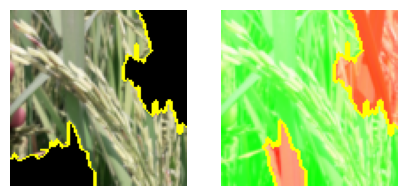

In [42]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (271).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 65ms/step
Accuracy of this prediction is 0.46276617


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 100ms/step


  1%|          | 10/1000 [00:00<00:18, 54.38it/s]

1/1 [==============================] - 0s 100ms/step


  2%|▏         | 20/1000 [00:00<00:19, 51.53it/s]

1/1 [==============================] - 0s 100ms/step


  3%|▎         | 30/1000 [00:00<00:18, 52.79it/s]

1/1 [==============================] - 0s 113ms/step


  4%|▍         | 40/1000 [00:00<00:18, 52.23it/s]

1/1 [==============================] - 0s 106ms/step


  5%|▌         | 50/1000 [00:00<00:17, 53.43it/s]

1/1 [==============================] - 0s 151ms/step


  6%|▌         | 60/1000 [00:01<00:19, 48.59it/s]

1/1 [==============================] - 0s 108ms/step


  7%|▋         | 70/1000 [00:01<00:19, 47.83it/s]

1/1 [==============================] - 0s 85ms/step


  8%|▊         | 80/1000 [00:01<00:18, 50.12it/s]

1/1 [==============================] - 0s 106ms/step


  9%|▉         | 90/1000 [00:02<00:29, 31.09it/s]

1/1 [==============================] - 0s 98ms/step


 10%|█         | 100/1000 [00:02<00:24, 36.05it/s]

1/1 [==============================] - 0s 100ms/step


 11%|█         | 110/1000 [00:02<00:22, 40.15it/s]

1/1 [==============================] - 0s 120ms/step


 12%|█▏        | 120/1000 [00:02<00:19, 44.51it/s]

1/1 [==============================] - 0s 103ms/step


 13%|█▎        | 130/1000 [00:02<00:18, 48.10it/s]

1/1 [==============================] - 0s 101ms/step


 14%|█▍        | 140/1000 [00:03<00:16, 51.49it/s]

1/1 [==============================] - 0s 100ms/step


 15%|█▌        | 150/1000 [00:03<00:15, 53.60it/s]

1/1 [==============================] - 0s 162ms/step


 16%|█▌        | 160/1000 [00:03<00:16, 49.44it/s]

1/1 [==============================] - 0s 235ms/step


 17%|█▋        | 170/1000 [00:03<00:22, 36.48it/s]

1/1 [==============================] - 0s 251ms/step


 18%|█▊        | 180/1000 [00:04<00:26, 30.98it/s]

1/1 [==============================] - 0s 221ms/step


 19%|█▉        | 190/1000 [00:04<00:28, 28.44it/s]

1/1 [==============================] - 0s 232ms/step


 20%|██        | 200/1000 [00:05<00:30, 26.52it/s]

1/1 [==============================] - 0s 224ms/step


 21%|██        | 210/1000 [00:05<00:31, 25.15it/s]

1/1 [==============================] - 0s 252ms/step


 22%|██▏       | 220/1000 [00:06<00:33, 23.62it/s]

1/1 [==============================] - 0s 250ms/step


 23%|██▎       | 230/1000 [00:06<00:33, 23.12it/s]

1/1 [==============================] - 0s 229ms/step


 24%|██▍       | 240/1000 [00:07<00:33, 22.68it/s]

1/1 [==============================] - 0s 269ms/step


 25%|██▌       | 250/1000 [00:07<00:33, 22.49it/s]

1/1 [==============================] - 0s 234ms/step


 26%|██▌       | 260/1000 [00:07<00:33, 22.15it/s]

1/1 [==============================] - 0s 252ms/step


 27%|██▋       | 270/1000 [00:08<00:32, 22.30it/s]

1/1 [==============================] - 0s 245ms/step


 28%|██▊       | 280/1000 [00:08<00:32, 22.32it/s]

1/1 [==============================] - 0s 117ms/step


 29%|██▉       | 290/1000 [00:09<00:28, 25.16it/s]

1/1 [==============================] - 0s 121ms/step


 30%|███       | 300/1000 [00:09<00:24, 29.14it/s]

1/1 [==============================] - 0s 98ms/step


 31%|███       | 310/1000 [00:09<00:20, 34.13it/s]

1/1 [==============================] - 0s 117ms/step


 32%|███▏      | 320/1000 [00:09<00:18, 37.73it/s]

1/1 [==============================] - 0s 154ms/step


 33%|███▎      | 330/1000 [00:09<00:17, 39.34it/s]

1/1 [==============================] - 0s 137ms/step


 34%|███▍      | 340/1000 [00:10<00:16, 41.15it/s]

1/1 [==============================] - 0s 120ms/step


 35%|███▌      | 350/1000 [00:10<00:14, 43.97it/s]

1/1 [==============================] - 0s 146ms/step


 36%|███▌      | 360/1000 [00:10<00:14, 44.12it/s]

1/1 [==============================] - 0s 129ms/step


 37%|███▋      | 370/1000 [00:10<00:14, 44.72it/s]

1/1 [==============================] - 0s 151ms/step


 38%|███▊      | 380/1000 [00:10<00:13, 44.82it/s]

1/1 [==============================] - 0s 134ms/step


 39%|███▉      | 390/1000 [00:11<00:13, 45.87it/s]

1/1 [==============================] - 0s 140ms/step


 40%|████      | 400/1000 [00:11<00:13, 44.72it/s]

1/1 [==============================] - 0s 151ms/step


 41%|████      | 410/1000 [00:11<00:13, 43.26it/s]

1/1 [==============================] - 0s 120ms/step


 42%|████▏     | 420/1000 [00:11<00:13, 42.66it/s]

1/1 [==============================] - 0s 130ms/step


 43%|████▎     | 430/1000 [00:12<00:13, 40.85it/s]

1/1 [==============================] - 0s 118ms/step


 44%|████▍     | 440/1000 [00:12<00:13, 42.72it/s]

1/1 [==============================] - 0s 157ms/step


 45%|████▌     | 450/1000 [00:12<00:13, 40.41it/s]

1/1 [==============================] - 0s 100ms/step


 46%|████▌     | 460/1000 [00:12<00:12, 44.25it/s]

1/1 [==============================] - 0s 150ms/step


 47%|████▋     | 470/1000 [00:13<00:12, 42.88it/s]

1/1 [==============================] - 0s 100ms/step


 48%|████▊     | 480/1000 [00:13<00:11, 43.85it/s]

1/1 [==============================] - 0s 117ms/step


 49%|████▉     | 490/1000 [00:13<00:11, 43.50it/s]

1/1 [==============================] - 0s 169ms/step


 50%|█████     | 500/1000 [00:13<00:12, 39.62it/s]

1/1 [==============================] - 0s 168ms/step


 51%|█████     | 510/1000 [00:14<00:12, 37.72it/s]

1/1 [==============================] - 0s 166ms/step


 52%|█████▏    | 520/1000 [00:14<00:12, 37.65it/s]

1/1 [==============================] - 0s 151ms/step


 53%|█████▎    | 530/1000 [00:14<00:12, 36.91it/s]

1/1 [==============================] - 0s 122ms/step


 54%|█████▍    | 540/1000 [00:14<00:12, 37.73it/s]

1/1 [==============================] - 0s 139ms/step


 55%|█████▌    | 550/1000 [00:15<00:11, 38.41it/s]

1/1 [==============================] - 0s 178ms/step


 56%|█████▌    | 560/1000 [00:15<00:11, 37.18it/s]

1/1 [==============================] - 0s 166ms/step


 57%|█████▋    | 570/1000 [00:15<00:11, 36.86it/s]

1/1 [==============================] - 0s 122ms/step


 58%|█████▊    | 580/1000 [00:15<00:10, 40.04it/s]

1/1 [==============================] - 0s 158ms/step


 59%|█████▉    | 590/1000 [00:16<00:10, 40.81it/s]

1/1 [==============================] - 0s 151ms/step


 60%|██████    | 600/1000 [00:16<00:10, 38.94it/s]

1/1 [==============================] - 0s 152ms/step


 61%|██████    | 610/1000 [00:16<00:10, 37.82it/s]

1/1 [==============================] - 0s 117ms/step


 62%|██████▏   | 620/1000 [00:17<00:09, 39.73it/s]

1/1 [==============================] - 0s 135ms/step


 63%|██████▎   | 630/1000 [00:17<00:08, 41.45it/s]

1/1 [==============================] - 0s 152ms/step


 64%|██████▍   | 640/1000 [00:17<00:08, 41.90it/s]

1/1 [==============================] - 0s 144ms/step


 65%|██████▌   | 650/1000 [00:17<00:08, 42.36it/s]

1/1 [==============================] - 0s 166ms/step


 66%|██████▌   | 660/1000 [00:17<00:08, 39.58it/s]

1/1 [==============================] - 0s 146ms/step


 67%|██████▋   | 670/1000 [00:18<00:08, 40.50it/s]

1/1 [==============================] - 0s 154ms/step


 68%|██████▊   | 680/1000 [00:18<00:08, 39.44it/s]

1/1 [==============================] - 0s 157ms/step


 69%|██████▉   | 690/1000 [00:18<00:08, 38.33it/s]

1/1 [==============================] - 0s 161ms/step


 70%|███████   | 700/1000 [00:19<00:08, 37.48it/s]

1/1 [==============================] - 0s 128ms/step


 71%|███████   | 710/1000 [00:19<00:07, 39.15it/s]

1/1 [==============================] - 0s 166ms/step


 72%|███████▏  | 720/1000 [00:19<00:07, 38.63it/s]

1/1 [==============================] - 0s 127ms/step


 73%|███████▎  | 730/1000 [00:19<00:06, 39.77it/s]

1/1 [==============================] - 0s 141ms/step


 74%|███████▍  | 740/1000 [00:20<00:06, 39.43it/s]

1/1 [==============================] - 0s 130ms/step


 75%|███████▌  | 750/1000 [00:20<00:06, 40.05it/s]

1/1 [==============================] - 0s 133ms/step


 76%|███████▌  | 760/1000 [00:20<00:06, 39.27it/s]

1/1 [==============================] - 0s 120ms/step


 77%|███████▋  | 770/1000 [00:20<00:05, 39.35it/s]

1/1 [==============================] - 0s 162ms/step


 78%|███████▊  | 780/1000 [00:21<00:05, 38.69it/s]

1/1 [==============================] - 0s 94ms/step


 79%|███████▉  | 790/1000 [00:21<00:04, 42.74it/s]

1/1 [==============================] - 0s 132ms/step


 80%|████████  | 800/1000 [00:21<00:04, 42.52it/s]

1/1 [==============================] - 0s 164ms/step


 81%|████████  | 810/1000 [00:21<00:04, 40.48it/s]

1/1 [==============================] - 0s 149ms/step


 82%|████████▏ | 820/1000 [00:21<00:04, 40.20it/s]

1/1 [==============================] - 0s 155ms/step


 83%|████████▎ | 830/1000 [00:22<00:04, 41.02it/s]

1/1 [==============================] - 0s 309ms/step


 84%|████████▍ | 840/1000 [00:22<00:05, 31.94it/s]

1/1 [==============================] - 0s 112ms/step


 85%|████████▌ | 850/1000 [00:22<00:04, 36.55it/s]

1/1 [==============================] - 0s 121ms/step


 86%|████████▌ | 860/1000 [00:23<00:03, 40.26it/s]

1/1 [==============================] - 0s 151ms/step


 87%|████████▋ | 870/1000 [00:23<00:03, 40.51it/s]

1/1 [==============================] - 0s 146ms/step


 88%|████████▊ | 880/1000 [00:23<00:03, 39.52it/s]

1/1 [==============================] - 0s 157ms/step


 89%|████████▉ | 890/1000 [00:23<00:02, 39.71it/s]

1/1 [==============================] - 0s 150ms/step


 90%|█████████ | 900/1000 [00:24<00:02, 40.36it/s]

1/1 [==============================] - 0s 145ms/step


 91%|█████████ | 910/1000 [00:24<00:02, 40.28it/s]

1/1 [==============================] - 0s 152ms/step


 92%|█████████▏| 920/1000 [00:24<00:01, 40.42it/s]

1/1 [==============================] - 0s 166ms/step


 93%|█████████▎| 930/1000 [00:24<00:01, 40.20it/s]

1/1 [==============================] - 0s 109ms/step


 94%|█████████▍| 940/1000 [00:25<00:01, 42.82it/s]

1/1 [==============================] - 0s 160ms/step


 95%|█████████▌| 950/1000 [00:25<00:01, 42.74it/s]

1/1 [==============================] - 0s 120ms/step


 96%|█████████▌| 960/1000 [00:25<00:00, 43.09it/s]

1/1 [==============================] - 0s 168ms/step


 97%|█████████▋| 970/1000 [00:25<00:00, 42.70it/s]

1/1 [==============================] - 0s 163ms/step


 98%|█████████▊| 980/1000 [00:26<00:00, 39.17it/s]

1/1 [==============================] - 0s 151ms/step


 99%|█████████▉| 990/1000 [00:26<00:00, 40.33it/s]

1/1 [==============================] - 0s 168ms/step


100%|██████████| 1000/1000 [00:26<00:00, 37.73it/s]


(-0.5, 99.5, 99.5, -0.5)

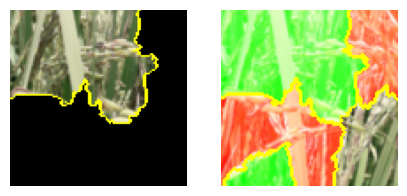

In [43]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (252).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 181ms/step
Accuracy of this prediction is 0.46274337


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 252ms/step


  1%|          | 10/1000 [00:00<00:46, 21.07it/s]

1/1 [==============================] - 0s 233ms/step


  2%|▏         | 20/1000 [00:00<00:44, 22.02it/s]

1/1 [==============================] - 0s 248ms/step


  3%|▎         | 30/1000 [00:01<00:44, 22.00it/s]

1/1 [==============================] - 0s 245ms/step


  4%|▍         | 40/1000 [00:01<00:44, 21.77it/s]

1/1 [==============================] - 0s 246ms/step


  5%|▌         | 50/1000 [00:02<00:43, 21.83it/s]

1/1 [==============================] - 0s 238ms/step


  6%|▌         | 60/1000 [00:02<00:43, 21.71it/s]

1/1 [==============================] - 0s 246ms/step


  7%|▋         | 70/1000 [00:03<00:42, 21.80it/s]

1/1 [==============================] - 0s 118ms/step


  8%|▊         | 80/1000 [00:03<00:36, 25.20it/s]

1/1 [==============================] - 0s 116ms/step


  9%|▉         | 90/1000 [00:03<00:30, 29.48it/s]

1/1 [==============================] - 0s 98ms/step


 10%|█         | 100/1000 [00:03<00:26, 34.34it/s]

1/1 [==============================] - 0s 108ms/step


 11%|█         | 110/1000 [00:04<00:23, 38.68it/s]

1/1 [==============================] - 0s 85ms/step


 12%|█▏        | 120/1000 [00:04<00:20, 43.39it/s]

1/1 [==============================] - 0s 136ms/step


 13%|█▎        | 130/1000 [00:04<00:19, 44.04it/s]

1/1 [==============================] - 0s 117ms/step


 14%|█▍        | 140/1000 [00:04<00:18, 45.56it/s]

1/1 [==============================] - 0s 118ms/step


 15%|█▌        | 150/1000 [00:04<00:19, 44.03it/s]

1/1 [==============================] - 0s 136ms/step


 16%|█▌        | 160/1000 [00:05<00:19, 42.53it/s]

1/1 [==============================] - 0s 103ms/step


 17%|█▋        | 170/1000 [00:05<00:18, 45.08it/s]

1/1 [==============================] - 0s 159ms/step


 18%|█▊        | 180/1000 [00:05<00:19, 41.01it/s]

1/1 [==============================] - 0s 155ms/step


 19%|█▉        | 190/1000 [00:05<00:20, 39.01it/s]

1/1 [==============================] - 0s 156ms/step


 20%|██        | 200/1000 [00:06<00:21, 37.12it/s]

1/1 [==============================] - 0s 142ms/step


 21%|██        | 210/1000 [00:06<00:20, 37.93it/s]

1/1 [==============================] - 0s 164ms/step


 22%|██▏       | 220/1000 [00:06<00:20, 37.24it/s]

1/1 [==============================] - 0s 150ms/step


 23%|██▎       | 230/1000 [00:07<00:20, 36.77it/s]

1/1 [==============================] - 0s 114ms/step


 24%|██▍       | 240/1000 [00:07<00:19, 38.52it/s]

1/1 [==============================] - 0s 113ms/step


 25%|██▌       | 250/1000 [00:07<00:18, 41.09it/s]

1/1 [==============================] - 0s 138ms/step


 26%|██▌       | 260/1000 [00:07<00:17, 41.23it/s]

1/1 [==============================] - 0s 133ms/step


 27%|██▋       | 270/1000 [00:07<00:17, 40.64it/s]

1/1 [==============================] - 0s 117ms/step


 28%|██▊       | 280/1000 [00:08<00:16, 42.84it/s]

1/1 [==============================] - 0s 156ms/step


 29%|██▉       | 290/1000 [00:08<00:16, 42.85it/s]

1/1 [==============================] - 0s 145ms/step


 30%|███       | 300/1000 [00:08<00:16, 41.41it/s]

1/1 [==============================] - 0s 105ms/step


 31%|███       | 310/1000 [00:08<00:15, 44.22it/s]

1/1 [==============================] - 0s 160ms/step


 32%|███▏      | 320/1000 [00:09<00:15, 42.88it/s]

1/1 [==============================] - 0s 146ms/step


 33%|███▎      | 330/1000 [00:09<00:15, 42.17it/s]

1/1 [==============================] - 0s 125ms/step


 34%|███▍      | 340/1000 [00:09<00:15, 41.81it/s]

1/1 [==============================] - 0s 146ms/step


 35%|███▌      | 350/1000 [00:09<00:15, 40.67it/s]

1/1 [==============================] - 0s 129ms/step


 36%|███▌      | 360/1000 [00:10<00:15, 40.52it/s]

1/1 [==============================] - 0s 147ms/step


 37%|███▋      | 370/1000 [00:10<00:15, 39.81it/s]

1/1 [==============================] - 0s 142ms/step


 38%|███▊      | 380/1000 [00:10<00:15, 39.13it/s]

1/1 [==============================] - 0s 135ms/step


 39%|███▉      | 390/1000 [00:10<00:15, 39.27it/s]

1/1 [==============================] - 0s 132ms/step


 40%|████      | 400/1000 [00:11<00:14, 40.82it/s]

1/1 [==============================] - 0s 133ms/step


 41%|████      | 410/1000 [00:11<00:13, 42.70it/s]

1/1 [==============================] - 0s 101ms/step


 42%|████▏     | 420/1000 [00:11<00:13, 43.68it/s]

1/1 [==============================] - 0s 127ms/step


 43%|████▎     | 430/1000 [00:11<00:13, 43.44it/s]

1/1 [==============================] - 0s 167ms/step


 44%|████▍     | 440/1000 [00:11<00:12, 44.20it/s]

1/1 [==============================] - 0s 139ms/step


 45%|████▌     | 450/1000 [00:12<00:13, 41.93it/s]

1/1 [==============================] - 0s 101ms/step


 46%|████▌     | 460/1000 [00:12<00:12, 43.15it/s]

1/1 [==============================] - 0s 102ms/step


 47%|████▋     | 470/1000 [00:12<00:11, 47.00it/s]

1/1 [==============================] - 0s 109ms/step


 48%|████▊     | 480/1000 [00:12<00:11, 46.85it/s]

1/1 [==============================] - 0s 165ms/step


 49%|████▉     | 490/1000 [00:13<00:12, 42.26it/s]

1/1 [==============================] - 0s 184ms/step


 50%|█████     | 500/1000 [00:13<00:12, 41.08it/s]

1/1 [==============================] - 0s 150ms/step


 51%|█████     | 510/1000 [00:13<00:12, 39.94it/s]

1/1 [==============================] - 0s 126ms/step


 52%|█████▏    | 520/1000 [00:13<00:11, 41.62it/s]

1/1 [==============================] - 0s 153ms/step


 53%|█████▎    | 530/1000 [00:14<00:11, 40.68it/s]

1/1 [==============================] - 0s 153ms/step


 54%|█████▍    | 540/1000 [00:14<00:11, 41.61it/s]

1/1 [==============================] - 0s 168ms/step


 55%|█████▌    | 550/1000 [00:14<00:11, 38.81it/s]

1/1 [==============================] - 0s 108ms/step


 56%|█████▌    | 560/1000 [00:14<00:10, 40.79it/s]

1/1 [==============================] - 0s 117ms/step


 57%|█████▋    | 570/1000 [00:15<00:10, 41.08it/s]

1/1 [==============================] - 0s 176ms/step


 58%|█████▊    | 580/1000 [00:15<00:10, 39.48it/s]

1/1 [==============================] - 0s 101ms/step


 59%|█████▉    | 590/1000 [00:15<00:09, 42.12it/s]

1/1 [==============================] - 0s 83ms/step


 60%|██████    | 600/1000 [00:15<00:09, 44.23it/s]

1/1 [==============================] - 0s 100ms/step


 61%|██████    | 610/1000 [00:15<00:08, 45.82it/s]

1/1 [==============================] - 0s 246ms/step


 62%|██████▏   | 620/1000 [00:16<00:10, 37.99it/s]

1/1 [==============================] - 0s 107ms/step


 63%|██████▎   | 630/1000 [00:16<00:08, 42.42it/s]

1/1 [==============================] - 0s 162ms/step


 64%|██████▍   | 640/1000 [00:16<00:08, 42.00it/s]

1/1 [==============================] - 0s 164ms/step


 65%|██████▌   | 650/1000 [00:17<00:08, 39.73it/s]

1/1 [==============================] - 0s 124ms/step


 66%|██████▌   | 660/1000 [00:17<00:08, 40.44it/s]

1/1 [==============================] - 0s 100ms/step


 67%|██████▋   | 670/1000 [00:17<00:07, 44.06it/s]

1/1 [==============================] - 0s 86ms/step


 68%|██████▊   | 680/1000 [00:17<00:06, 47.78it/s]

1/1 [==============================] - 0s 116ms/step


 69%|██████▉   | 690/1000 [00:17<00:06, 47.39it/s]

1/1 [==============================] - 0s 117ms/step


 70%|███████   | 700/1000 [00:18<00:06, 46.54it/s]

1/1 [==============================] - 0s 134ms/step


 71%|███████   | 710/1000 [00:18<00:06, 46.56it/s]

1/1 [==============================] - 0s 101ms/step


 72%|███████▏  | 720/1000 [00:18<00:06, 45.68it/s]

1/1 [==============================] - 0s 117ms/step


 73%|███████▎  | 730/1000 [00:18<00:06, 44.77it/s]

1/1 [==============================] - 0s 110ms/step


 74%|███████▍  | 740/1000 [00:18<00:05, 45.19it/s]

1/1 [==============================] - 0s 128ms/step


 75%|███████▌  | 750/1000 [00:19<00:05, 42.64it/s]

1/1 [==============================] - 0s 133ms/step


 76%|███████▌  | 760/1000 [00:19<00:05, 41.78it/s]

1/1 [==============================] - 0s 100ms/step


 77%|███████▋  | 770/1000 [00:19<00:05, 43.59it/s]

1/1 [==============================] - 0s 150ms/step


 78%|███████▊  | 780/1000 [00:19<00:05, 42.78it/s]

1/1 [==============================] - 0s 137ms/step


 79%|███████▉  | 790/1000 [00:20<00:04, 42.25it/s]

1/1 [==============================] - 0s 164ms/step


 80%|████████  | 800/1000 [00:20<00:04, 40.95it/s]

1/1 [==============================] - 0s 171ms/step


 81%|████████  | 810/1000 [00:20<00:04, 39.22it/s]

1/1 [==============================] - 0s 158ms/step


 82%|████████▏ | 820/1000 [00:21<00:04, 37.08it/s]

1/1 [==============================] - 0s 158ms/step


 83%|████████▎ | 830/1000 [00:21<00:04, 36.62it/s]

1/1 [==============================] - 0s 150ms/step


 84%|████████▍ | 840/1000 [00:21<00:04, 36.37it/s]

1/1 [==============================] - 0s 141ms/step


 85%|████████▌ | 850/1000 [00:21<00:04, 37.36it/s]

1/1 [==============================] - 0s 214ms/step


 86%|████████▌ | 860/1000 [00:22<00:04, 34.89it/s]

1/1 [==============================] - 0s 103ms/step


 87%|████████▋ | 870/1000 [00:22<00:03, 32.70it/s]

1/1 [==============================] - 0s 151ms/step


 88%|████████▊ | 880/1000 [00:22<00:03, 34.95it/s]

1/1 [==============================] - 0s 134ms/step


 89%|████████▉ | 890/1000 [00:22<00:02, 37.86it/s]

1/1 [==============================] - 0s 133ms/step


 90%|█████████ | 900/1000 [00:23<00:02, 38.37it/s]

1/1 [==============================] - 0s 125ms/step


 91%|█████████ | 910/1000 [00:23<00:02, 40.68it/s]

1/1 [==============================] - 0s 167ms/step


 92%|█████████▏| 920/1000 [00:23<00:02, 39.42it/s]

1/1 [==============================] - 0s 137ms/step


 93%|█████████▎| 930/1000 [00:23<00:01, 40.14it/s]

1/1 [==============================] - 0s 128ms/step


 94%|█████████▍| 940/1000 [00:24<00:01, 41.32it/s]

1/1 [==============================] - 0s 139ms/step


 95%|█████████▌| 950/1000 [00:24<00:01, 39.85it/s]

1/1 [==============================] - 0s 137ms/step


 96%|█████████▌| 960/1000 [00:24<00:00, 41.10it/s]

1/1 [==============================] - 0s 168ms/step


 97%|█████████▋| 970/1000 [00:24<00:00, 39.13it/s]

1/1 [==============================] - 0s 142ms/step


 98%|█████████▊| 980/1000 [00:25<00:00, 38.42it/s]

1/1 [==============================] - 0s 157ms/step


 99%|█████████▉| 990/1000 [00:25<00:00, 39.92it/s]

1/1 [==============================] - 0s 166ms/step


100%|██████████| 1000/1000 [00:25<00:00, 38.89it/s]


(-0.5, 99.5, 99.5, -0.5)

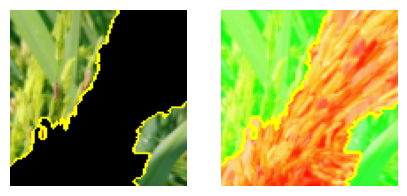

In [44]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (393).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 327ms/step


  1%|          | 10/1000 [00:00<01:05, 15.21it/s]

1/1 [==============================] - 0s 158ms/step


  2%|▏         | 20/1000 [00:00<00:43, 22.60it/s]

1/1 [==============================] - 0s 173ms/step


  3%|▎         | 30/1000 [00:01<00:36, 26.62it/s]

1/1 [==============================] - 0s 166ms/step


  4%|▍         | 40/1000 [00:01<00:31, 30.48it/s]

1/1 [==============================] - 0s 164ms/step


  5%|▌         | 50/1000 [00:01<00:29, 32.51it/s]

1/1 [==============================] - 0s 160ms/step


  6%|▌         | 60/1000 [00:02<00:27, 34.77it/s]

1/1 [==============================] - 0s 139ms/step


  7%|▋         | 70/1000 [00:02<00:25, 36.77it/s]

1/1 [==============================] - 0s 150ms/step


  8%|▊         | 80/1000 [00:02<00:24, 38.13it/s]

1/1 [==============================] - 0s 111ms/step


  9%|▉         | 90/1000 [00:02<00:21, 43.01it/s]

1/1 [==============================] - 0s 131ms/step


 10%|█         | 100/1000 [00:02<00:20, 43.85it/s]

1/1 [==============================] - 0s 109ms/step


 11%|█         | 110/1000 [00:03<00:18, 46.93it/s]

1/1 [==============================] - 0s 110ms/step


 12%|█▏        | 120/1000 [00:03<00:17, 49.52it/s]

1/1 [==============================] - 0s 94ms/step


 13%|█▎        | 130/1000 [00:03<00:16, 51.40it/s]

1/1 [==============================] - 0s 154ms/step


 14%|█▍        | 140/1000 [00:03<00:18, 47.18it/s]

1/1 [==============================] - 0s 125ms/step


 15%|█▌        | 150/1000 [00:03<00:19, 43.95it/s]

1/1 [==============================] - 0s 107ms/step


 16%|█▌        | 160/1000 [00:04<00:18, 46.52it/s]

1/1 [==============================] - 0s 106ms/step


 17%|█▋        | 170/1000 [00:04<00:17, 46.45it/s]

1/1 [==============================] - 0s 152ms/step


 18%|█▊        | 180/1000 [00:04<00:18, 44.10it/s]

1/1 [==============================] - 0s 116ms/step


 19%|█▉        | 190/1000 [00:04<00:19, 42.41it/s]

1/1 [==============================] - 0s 143ms/step


 20%|██        | 200/1000 [00:05<00:18, 42.53it/s]

1/1 [==============================] - 0s 108ms/step


 21%|██        | 210/1000 [00:05<00:19, 41.50it/s]

1/1 [==============================] - 0s 110ms/step


 22%|██▏       | 220/1000 [00:05<00:18, 43.07it/s]

1/1 [==============================] - 0s 101ms/step


 23%|██▎       | 230/1000 [00:05<00:16, 45.92it/s]

1/1 [==============================] - 0s 108ms/step


 24%|██▍       | 240/1000 [00:05<00:16, 45.74it/s]

1/1 [==============================] - 0s 115ms/step


 25%|██▌       | 250/1000 [00:06<00:16, 45.35it/s]

1/1 [==============================] - 0s 113ms/step


 26%|██▌       | 260/1000 [00:06<00:15, 47.08it/s]

1/1 [==============================] - 0s 126ms/step


 27%|██▋       | 270/1000 [00:06<00:16, 45.62it/s]

1/1 [==============================] - 0s 163ms/step


 28%|██▊       | 280/1000 [00:06<00:16, 43.84it/s]

1/1 [==============================] - 0s 134ms/step


 29%|██▉       | 290/1000 [00:07<00:16, 43.91it/s]

1/1 [==============================] - 0s 122ms/step


 30%|███       | 300/1000 [00:07<00:15, 43.80it/s]

1/1 [==============================] - 0s 126ms/step


 31%|███       | 310/1000 [00:07<00:14, 46.14it/s]

1/1 [==============================] - 0s 117ms/step


 32%|███▏      | 320/1000 [00:07<00:14, 46.33it/s]

1/1 [==============================] - 0s 107ms/step


 33%|███▎      | 330/1000 [00:07<00:14, 45.16it/s]

1/1 [==============================] - 0s 151ms/step


 34%|███▍      | 340/1000 [00:08<00:14, 44.07it/s]

1/1 [==============================] - 0s 115ms/step


 35%|███▌      | 350/1000 [00:08<00:14, 45.36it/s]

1/1 [==============================] - 0s 144ms/step


 36%|███▌      | 360/1000 [00:08<00:14, 44.33it/s]

1/1 [==============================] - 0s 159ms/step


 37%|███▋      | 370/1000 [00:08<00:15, 40.39it/s]

1/1 [==============================] - 0s 100ms/step


 38%|███▊      | 380/1000 [00:09<00:14, 43.30it/s]

1/1 [==============================] - 0s 92ms/step


 39%|███▉      | 390/1000 [00:09<00:13, 44.63it/s]

1/1 [==============================] - 0s 107ms/step


 40%|████      | 400/1000 [00:09<00:12, 47.54it/s]

1/1 [==============================] - 0s 141ms/step


 41%|████      | 410/1000 [00:09<00:13, 44.47it/s]

1/1 [==============================] - 0s 111ms/step


 42%|████▏     | 420/1000 [00:09<00:12, 47.31it/s]

1/1 [==============================] - 0s 109ms/step


 43%|████▎     | 430/1000 [00:10<00:12, 46.83it/s]

1/1 [==============================] - 0s 131ms/step


 44%|████▍     | 440/1000 [00:10<00:11, 47.37it/s]

1/1 [==============================] - 0s 126ms/step


 45%|████▌     | 450/1000 [00:10<00:11, 48.03it/s]

1/1 [==============================] - 0s 132ms/step


 46%|████▌     | 460/1000 [00:10<00:11, 47.60it/s]

1/1 [==============================] - 0s 133ms/step


 47%|████▋     | 470/1000 [00:11<00:11, 46.85it/s]

1/1 [==============================] - 0s 140ms/step


 48%|████▊     | 480/1000 [00:11<00:11, 43.68it/s]

1/1 [==============================] - 0s 133ms/step


 49%|████▉     | 490/1000 [00:11<00:11, 44.53it/s]

1/1 [==============================] - 0s 190ms/step


 50%|█████     | 500/1000 [00:11<00:12, 38.60it/s]

1/1 [==============================] - 0s 96ms/step


 51%|█████     | 510/1000 [00:12<00:11, 42.32it/s]

1/1 [==============================] - 0s 133ms/step


 52%|█████▏    | 520/1000 [00:12<00:11, 42.35it/s]

1/1 [==============================] - 0s 123ms/step


 53%|█████▎    | 530/1000 [00:12<00:10, 43.72it/s]

1/1 [==============================] - 0s 141ms/step


 54%|█████▍    | 540/1000 [00:12<00:10, 43.08it/s]

1/1 [==============================] - 0s 125ms/step


 55%|█████▌    | 550/1000 [00:12<00:10, 44.41it/s]

1/1 [==============================] - 0s 111ms/step


 56%|█████▌    | 560/1000 [00:13<00:09, 45.82it/s]

1/1 [==============================] - 0s 129ms/step


 57%|█████▋    | 570/1000 [00:13<00:09, 45.18it/s]

1/1 [==============================] - 0s 142ms/step


 58%|█████▊    | 580/1000 [00:13<00:09, 44.58it/s]

1/1 [==============================] - 0s 138ms/step


 59%|█████▉    | 590/1000 [00:13<00:09, 44.56it/s]

1/1 [==============================] - 0s 139ms/step


 60%|██████    | 600/1000 [00:14<00:09, 43.89it/s]

1/1 [==============================] - 0s 112ms/step


 61%|██████    | 610/1000 [00:14<00:08, 45.86it/s]

1/1 [==============================] - 0s 123ms/step


 62%|██████▏   | 620/1000 [00:14<00:07, 47.85it/s]

1/1 [==============================] - 0s 158ms/step


 63%|██████▎   | 630/1000 [00:14<00:08, 44.01it/s]

1/1 [==============================] - 0s 146ms/step


 64%|██████▍   | 640/1000 [00:14<00:08, 42.57it/s]

1/1 [==============================] - 0s 185ms/step


 65%|██████▌   | 650/1000 [00:15<00:08, 40.04it/s]

1/1 [==============================] - 0s 182ms/step


 66%|██████▌   | 660/1000 [00:15<00:08, 40.10it/s]

1/1 [==============================] - 0s 134ms/step


 67%|██████▋   | 670/1000 [00:15<00:07, 42.47it/s]

1/1 [==============================] - 0s 105ms/step


 68%|██████▊   | 680/1000 [00:15<00:07, 44.48it/s]

1/1 [==============================] - 0s 166ms/step


 69%|██████▉   | 690/1000 [00:16<00:07, 41.42it/s]

1/1 [==============================] - 0s 116ms/step


 70%|███████   | 700/1000 [00:16<00:06, 44.88it/s]

1/1 [==============================] - 0s 161ms/step


 71%|███████   | 710/1000 [00:16<00:06, 43.25it/s]

1/1 [==============================] - 0s 133ms/step


 72%|███████▏  | 720/1000 [00:16<00:06, 41.03it/s]

1/1 [==============================] - 0s 133ms/step


 73%|███████▎  | 730/1000 [00:17<00:06, 40.79it/s]

1/1 [==============================] - 0s 105ms/step


 74%|███████▍  | 740/1000 [00:17<00:05, 44.09it/s]

1/1 [==============================] - 0s 158ms/step


 75%|███████▌  | 750/1000 [00:17<00:05, 42.15it/s]

1/1 [==============================] - 0s 142ms/step


 76%|███████▌  | 760/1000 [00:17<00:05, 42.04it/s]

1/1 [==============================] - 0s 152ms/step


 77%|███████▋  | 770/1000 [00:18<00:05, 39.88it/s]

1/1 [==============================] - 0s 149ms/step


 78%|███████▊  | 780/1000 [00:18<00:05, 38.14it/s]

1/1 [==============================] - 1s 521ms/step


 79%|███████▉  | 790/1000 [00:19<00:09, 23.04it/s]

1/1 [==============================] - 0s 266ms/step


 80%|████████  | 800/1000 [00:19<00:09, 21.28it/s]

1/1 [==============================] - 0s 254ms/step


 81%|████████  | 810/1000 [00:20<00:09, 21.03it/s]

1/1 [==============================] - 0s 232ms/step


 82%|████████▏ | 820/1000 [00:20<00:08, 20.99it/s]

1/1 [==============================] - 0s 233ms/step


 83%|████████▎ | 830/1000 [00:21<00:07, 21.36it/s]

1/1 [==============================] - 0s 225ms/step


 84%|████████▍ | 840/1000 [00:21<00:07, 21.84it/s]

1/1 [==============================] - 0s 249ms/step


 85%|████████▌ | 850/1000 [00:22<00:06, 22.03it/s]

1/1 [==============================] - 0s 223ms/step


 86%|████████▌ | 860/1000 [00:22<00:06, 22.49it/s]

1/1 [==============================] - 0s 239ms/step


 87%|████████▋ | 870/1000 [00:22<00:05, 22.41it/s]

1/1 [==============================] - 0s 228ms/step


 88%|████████▊ | 880/1000 [00:23<00:05, 22.35it/s]

1/1 [==============================] - 0s 243ms/step


 89%|████████▉ | 890/1000 [00:23<00:05, 21.82it/s]

1/1 [==============================] - 0s 230ms/step


 90%|█████████ | 900/1000 [00:24<00:04, 21.90it/s]

1/1 [==============================] - 0s 223ms/step


 91%|█████████ | 910/1000 [00:24<00:04, 22.01it/s]

1/1 [==============================] - 0s 244ms/step


 92%|█████████▏| 920/1000 [00:25<00:03, 22.10it/s]

1/1 [==============================] - 0s 249ms/step


 93%|█████████▎| 930/1000 [00:25<00:03, 21.56it/s]

1/1 [==============================] - 0s 213ms/step


 94%|█████████▍| 940/1000 [00:26<00:02, 22.11it/s]

1/1 [==============================] - 0s 235ms/step


 95%|█████████▌| 950/1000 [00:26<00:02, 21.89it/s]

1/1 [==============================] - 0s 224ms/step


 96%|█████████▌| 960/1000 [00:27<00:01, 22.02it/s]

1/1 [==============================] - 0s 276ms/step


 97%|█████████▋| 970/1000 [00:27<00:01, 20.28it/s]

1/1 [==============================] - 0s 239ms/step


 98%|█████████▊| 980/1000 [00:28<00:00, 20.79it/s]

1/1 [==============================] - 0s 239ms/step


 99%|█████████▉| 990/1000 [00:28<00:00, 21.46it/s]

1/1 [==============================] - 0s 229ms/step


100%|██████████| 1000/1000 [00:28<00:00, 34.56it/s]


(-0.5, 99.5, 99.5, -0.5)

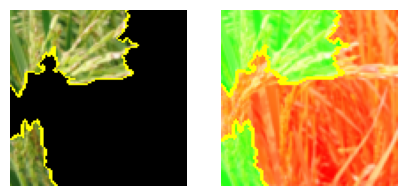

In [46]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (428).jpg'
images = read_and_transform_img(url)


from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'),model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


In [30]:
model = Inception(
    optimizer='rmsprop',neurons=128,batch_size=16,epochs=5,activation='sigmoid',patience=10
)

Epoch 1/5
43/43 [==============================] - 11s 114ms/step - loss: 0.7148 - accuracy: 0.4978
Epoch 2/5
43/43 [==============================] - 5s 115ms/step - loss: 0.7018 - accuracy: 0.4816
Epoch 3/5
43/43 [==============================] - 9s 216ms/step - loss: 0.6988 - accuracy: 0.4919
Epoch 4/5
43/43 [==============================] - 5s 114ms/step - loss: 0.6982 - accuracy: 0.4963
Epoch 5/5
43/43 [==============================] - 4s 95ms/step - loss: 0.6960 - accuracy: 0.4963
